In [1]:
%env CONDA_PREFIX

'C:\\Users\\ai47\\anaconda3\\envs\\tensorflow'

In [2]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [3]:
import warnings
warnings.filterwarnings('ignore')

# XOR 문제

In [2]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(9)

In [5]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([[0],[1],[1],[0]])
# XOR solving

In [6]:
model = Sequential()
model.add(Dense(units=2, activation='sigmoid', input_dim=2)) #은닉층
model.add(Dense(units=1, activation='sigmoid'))

In [7]:
model.compile(loss='mean_squared_error', optimizer='sgd') #optimizer 학습규칙
model.fit(X, y, epochs=30000, verbose=0) #verbose 학습할때마다 lose값 알려주는데 그print를 쓰지 마셈

In [8]:
print(model.predict(X))

[[0.36608863]
 [0.58283776]
 [0.54268384]
 [0.56545985]]


In [9]:
model.fit(X, y, epochs=100000, verbose=0) #verbose 학습할때마다 lose값 알려주는데 그거 쓰지 마셈
print(model.predict(X))

KeyboardInterrupt: 

In [ ]:
print(model.summary())

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_shape.png', show_shapes=True)

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_shape.png')

In [ ]:
model.weights

- http://playground.tensorflow.org/

# 1. 폐암환자 생존율 예측

In [ ]:
np.random.seed(9)

In [ ]:
data_set = np.loadtxt("d:/Ai/ThoracicSurgery.csv", delimiter=',')
X = data_set[:, 0:17]
Y = data_set[:, [17]]
print(X.shape, Y.shape)

In [ ]:
model = Sequential()
model.add(Dense(units=30,input_dim=17, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy', optimizer = 'adam',metrics=['accuracy'])
model.fit(X, Y, epochs=30, batch_size=10, verbose=1)

In [ ]:
model.evaluate(X, Y)

In [ ]:
print('Accuracy: ', model.evaluate(X, Y)[1])

In [ ]:
test_data = np.array([[172,2,2.88,2.2,0,0,0,0,0,0,12,1,0,0,1,0,62]])

In [ ]:
print('result:', model.predict(test_data))

In [ ]:
print('result: %.2f'% model.predict(test_data))

In [ ]:
test_data = np.array([[150,2,2.88,2.2,0,0,0,0,0,0,12,1,0,0,1,0,59]])
print('result: %.2f'% model.predict(test_data))

# 2. 피마 인디언 당뇨병 예측

In [ ]:
import pandas as pd
df = pd.read_csv('d:/Ai/pima-indians-diabetes.csv', 
                names=['pregnant', 'plasma', 'pressure', 'thickness', 
                       'insulin', 'BMI', 'pedigree', 'age', 'class' ])

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df[df['class']== 1].describe()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
plt.subplots(3,3, figsize=(10,10) )
for idx, col in enumerate(df.columns[:-1]):
    ax = plt.subplot(3,3, idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df[df['class']==0][col], hist=False, axlabel=False,
               kde_kws={'linestyle':'-', 'color':'black', 'label':'No Diabetes'})
    sns.distplot(df[df['class']==1][col], hist=False, axlabel=False,
               kde_kws={'linestyle':'--', 'color':'black', 'label':'Diabetes'})
    ax.set_title(col)
plt.subplot(3,3,9).set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap( df.corr(), linewidths=0.1, linecolor='white',
            cmap=plt.cm.gist_heat, annot=True)
plt.show()

In [ ]:
plt.subplots(3,3, figsize=(10,10) )
for idx, col in enumerate(df.columns[:-1]):
    ax = plt.subplot(3,3, idx+1)
    ax.yaxis.set_ticklabels([])
    sns.boxplot(x='class',y=col, data=df)
    ax.set_title(col)
plt.subplot(3,3,9).set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

In [ ]:
df.shape

In [ ]:
X = df.values[:, :-1]
Y = df.values[:,[-1]]
X.shape, Y.shape

In [ ]:
import tensorflow as tf

In [ ]:
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

model = Sequential()
model.add(Dense(units=16,input_dim=8, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'adam',metrics=['accuracy']) #metrics?
model.fit(X, Y, epochs=2000, batch_size=12, verbose=0)

print("Accuracy:", model.evaluate(X,Y)[1])

In [ ]:
Y_pred = model.predict(X)
Y_pred = (Y_pred >= 0.5).astype(int)

In [ ]:
Y_pred = model.predict(X)
Y_pred

In [ ]:
print((Y_pred==Y.astype(int)).reshape(-1,).astype(int))

In [ ]:
np.nonzero((Y_pred==Y.astype(int)).reshape(-1,).astype(int))

In [ ]:
np.nonzero((Y_pred==Y.astype(int)).reshape(-1,).astype(int))[0]

In [ ]:
np.where( (Y_pred==Y.astype(int)).reshape(-1,).astype(int)==0)[0]

In [ ]:
inc_idx = np.where( (Y_pred==Y.astype(int)).reshape(-1,).astype(int)==0)[0]
inc_idx.shape

In [ ]:
df.iloc[inc_idx]

In [ ]:
wrong_df = df.iloc[inc_idx]
wrong_df[wrong_df['class']==1].describe()

In [ ]:
wrong_df[wrong_df['class']==0].describe()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y, Y_pred))

In [ ]:
sns.heatmap(confusion_matrix(Y, Y-pred), linewidths=0.1, linecolor='white',annot=True,fmt='d')
plt.show()

## 혼동행렬
- https://towardsdatascience.com/decoding-the-confusion-matrix-bb4801decbb

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 3. Iris 품종 분류

In [159]:
df = pd.read_csv('d:/Ai/iris.csv', names=['sepal_length', 'sepal_width', 
                                          'petal_length', 'petal_width', 
                                          'species'])

In [160]:
df

sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

In [22]:
import matplotlib.pyplot as plt

In [162]:
sns.pairplot(df, heu=)

SyntaxError: invalid syntax (2033838819.py, line 1)

In [163]:
g = df.groupby(['species'], as_index=False)
for key, d in g:
    print('key',key)
    print(d)

key Iris-setosa
    sepal_length  sepal_width  petal_length  petal_width      species
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13  

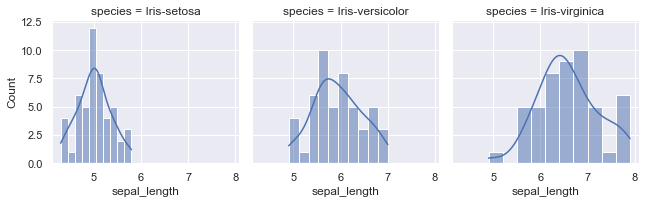

In [164]:
g = sns.FacetGrid(df,col='species')
g.map_dataframe(sns.histplot, kde=True, x='sepal_length',bins=10)
plt.show()

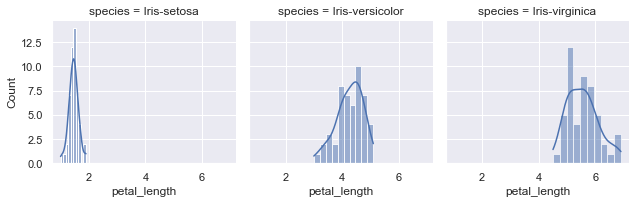

In [165]:
g = sns.FacetGrid(df,col='species')
g.map_dataframe(sns.histplot, kde=True, x='petal_length',bins=10)
plt.show()

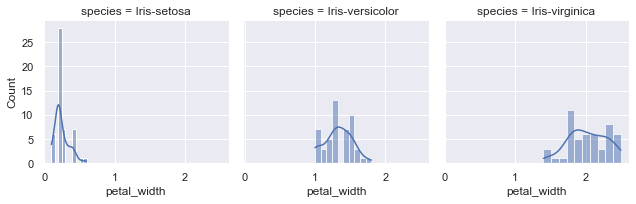

In [166]:
g = sns.FacetGrid(df,col='species')
g.map_dataframe(sns.histplot, kde=True, x='petal_width',bins=10)
plt.show()

In [167]:
X = df.to_numpy()[:, :-1].astype(float)
Y_str = df.to_numpy()[:,-1]
Y_str.shape

(150,)

In [168]:
from sklearn.preprocessing import LabelEncoder

e = LabelEncoder()
e.fit(Y_str)
Y_num = e.transform(Y_str)
Y_num.shape


(150,)

In [169]:
Y_num

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [172]:
from tensorflow.keras.utils import to_categorical

Y = to_categorical(Y_num, num_classes=3) #다중 분류모델에서는 반드시 실행
Y.shape

(150, 3)

In [175]:
%%time
model = Sequential()
model.add( Dense(units=16, input_dim=4, activation='relu'))
model.add( Dense(units=8, activation='relu'))
model.add( Dense(units=3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X,Y,epochs=500, batch_size=32,verbose=0)
print('Accuracy:', model.evaluate(X,Y)[1])

5/5 [==============================] - 0s 0s/step - loss: 0.0954 - accuracy: 0.9800
Accuracy: 0.9800000190734863
CPU times: total: 2.97 s
Wall time: 2.32 s


# 4. 광물 예측

## 데이터 확인

In [120]:
df = pd.read_csv('d:/Ai/sonar.csv', header= None  )
df.isnull()
df

0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      51      52      53      54      55      56      57  \
0    0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1    0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2    0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3    0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4    0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
203  0.2684  ...  0.0116  0.0098  0.0199  0.0033  0.0101  0.0065  0.0115   
204  0.2154  ...  0.0061  0.0093  0.0135  0.0063  0.0063  0.0034  0.0032   
205  0.2529  ...  0.0160  0.0029  0.0051  0.0062  0.0089  0.0140  0.0138   
206  0.2354  ...  0.0086  0.0046  0.0126  0.0036  0.0035  0.0034  0.0079   
207  0.2354  ...  0.0146  0.0129  0.0047  0.0039  0.0061  0.0040  0.0036   

         58      59  60  
0    0.0090  0.0032   R  
1    0.0052  0.0044   R  
2    0.0095  0.0078   R  
3    0.0040  0.0117   R  
4    0.0107  0.0094   R  
..      ...     ...  ..  
203  0.0193  0.0157   M  
204  0.0062  0.0067   M  
205  0.0077  0.0031   M  
206  0.0036  0.0048   M  
207  0.0061  0.0115   M  

[208 rows x 61 columns]

In [20]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

[142, 149, 22, 72, 197, 91, 121, 104, 3, 158, 88, 200, 127, 14, 204]


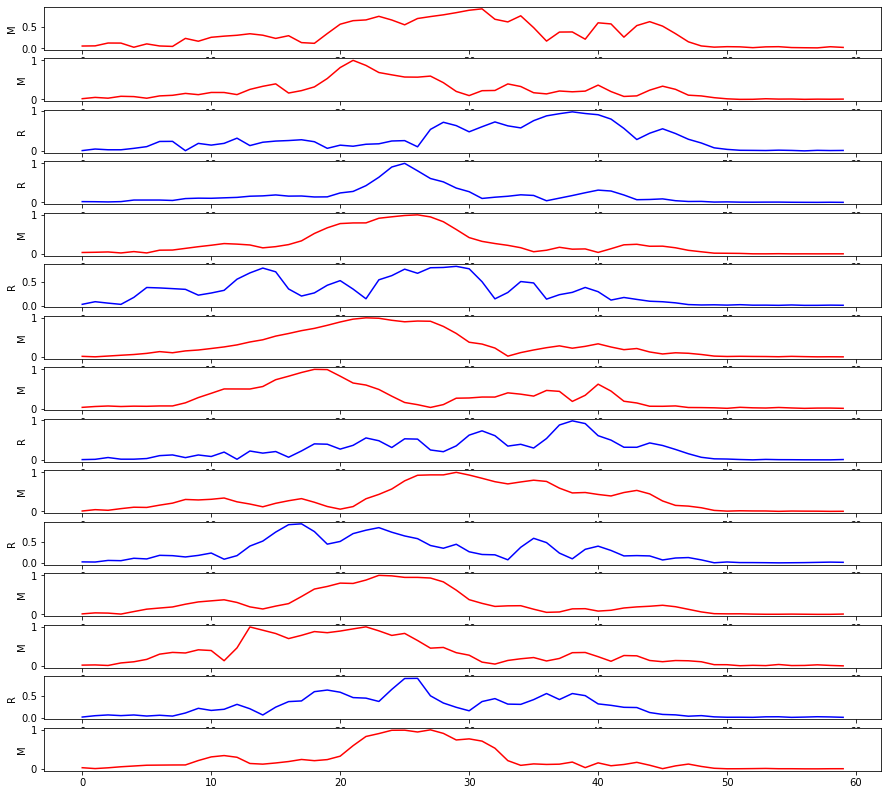

In [24]:
import random
samples= 15
d = random.sample(range(len(df)),samples)
print(d)

def set_color(x):
     return 'r' if x=='M' else 'b'

plt.figure(figsize=(15,samples))
for i in range(samples):
    plt.subplot(samples+1,1,i+1)
    plt.plot(df.to_numpy()[d[i],:-1],set_color(df.to_numpy()[d[i],-1]))
    plt.ylabel(df.to_numpy()[d[i],-1])
    
plt.show()

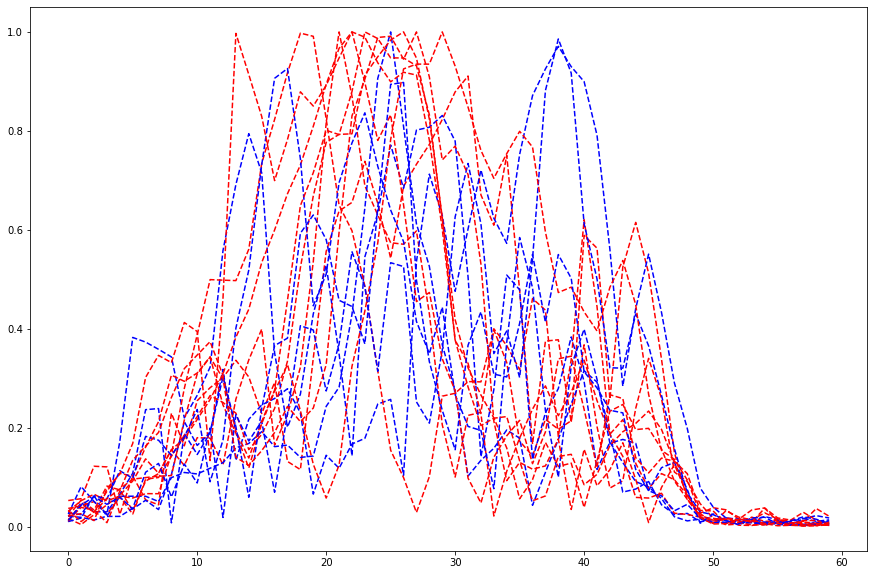

In [26]:
plt.figure(figsize=(15,10)) #어지럽다
for i in range(samples):
     plt.plot(df.to_numpy()[d[i],:-1],set_color(df.to_numpy()[d[i],-1])+'--')
plt.show()

In [28]:
X = df.to_numpy()[:, :-1].astype(float)
Y_str = df.to_numpy()[:,-1]

In [29]:
from sklearn.preprocessing import LabelEncoder
e = LabelEncoder()
e.fit(Y_str)
Y = e.transform(Y_str)

In [30]:
Y = Y.reshape(-1,1)
Y.shape

(208, 1)

In [36]:
seed = 0 #
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

model = Sequential()
model.add( Dense(units=24, input_dim=60, activation='relu'))
model.add( Dense(units=10, activation='relu'))
model.add( Dense(units=1, activation='sigmoid'))

In [39]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
hist = model.fit(X, Y, epochs=2000, batch_size=32)
print('Accuracy: %.4f'% (model.evaluate(X,Y)[1]))

Epoch 1/2000
7/7 [==============================] - 0s 1ms/step - loss: 4.9540e-06 - accuracy: 1.0000
Epoch 2/2000
7/7 [==============================] - 0s 0s/step - loss: 4.9758e-06 - accuracy: 1.0000
Epoch 3/2000
7/7 [==============================] - 0s 2ms/step - loss: 4.0200e-06 - accuracy: 1.0000
Epoch 4/2000
7/7 [==============================] - 0s 711us/step - loss: 4.9405e-06 - accuracy: 1.0000
Epoch 5/2000
7/7 [==============================] - 0s 0s/step - loss: 5.3425e-06 - accuracy: 1.0000
Epoch 6/2000
7/7 [==============================] - 0s 710us/step - loss: 3.7660e-06 - accuracy: 1.0000
Epoch 7/2000
7/7 [==============================] - 0s 857us/step - loss: 3.4472e-06 - accuracy: 1.0000
Epoch 8/2000
7/7 [==============================] - 0s 1ms/step - loss: 3.1096e-06 - accuracy: 1.0000
Epoch 9/2000
7/7 [==============================] - 0s 714us/step - loss: 3.0789e-06 - accuracy: 1.0000
Epoch 10/2000
7/7 [==============================] - 0s 715us/step - loss: 3

7/7 [==============================] - 0s 714us/step - loss: 6.1203e-07 - accuracy: 1.0000
Epoch 78/2000
7/7 [==============================] - 0s 714us/step - loss: 6.4103e-07 - accuracy: 1.0000
Epoch 79/2000
7/7 [==============================] - 0s 714us/step - loss: 5.8120e-07 - accuracy: 1.0000
Epoch 80/2000
7/7 [==============================] - 0s 1ms/step - loss: 5.9531e-07 - accuracy: 1.0000
Epoch 81/2000
7/7 [==============================] - 0s 714us/step - loss: 5.6441e-07 - accuracy: 1.0000
Epoch 82/2000
7/7 [==============================] - 0s 1ms/step - loss: 5.5040e-07 - accuracy: 1.0000
Epoch 83/2000
7/7 [==============================] - 0s 714us/step - loss: 5.8303e-07 - accuracy: 1.0000
Epoch 84/2000
7/7 [==============================] - 0s 857us/step - loss: 5.2888e-07 - accuracy: 1.0000
Epoch 85/2000
7/7 [==============================] - 0s 570us/step - loss: 5.4536e-07 - accuracy: 1.0000
Epoch 86/2000
7/7 [==============================] - 0s 1ms/step - loss: 

7/7 [==============================] - 0s 572us/step - loss: 1.1462e-07 - accuracy: 1.0000
Epoch 232/2000
7/7 [==============================] - 0s 571us/step - loss: 1.1429e-07 - accuracy: 1.0000
Epoch 233/2000
7/7 [==============================] - 0s 714us/step - loss: 1.1314e-07 - accuracy: 1.0000
Epoch 234/2000
7/7 [==============================] - 0s 571us/step - loss: 1.1171e-07 - accuracy: 1.0000
Epoch 235/2000
7/7 [==============================] - 0s 572us/step - loss: 1.1110e-07 - accuracy: 1.0000
Epoch 236/2000
7/7 [==============================] - 0s 714us/step - loss: 1.1028e-07 - accuracy: 1.0000
Epoch 237/2000
7/7 [==============================] - 0s 715us/step - loss: 1.1016e-07 - accuracy: 1.0000
Epoch 238/2000
7/7 [==============================] - 0s 717us/step - loss: 1.0863e-07 - accuracy: 1.0000
Epoch 239/2000
7/7 [==============================] - 0s 714us/step - loss: 1.0720e-07 - accuracy: 1.0000
Epoch 240/2000
7/7 [==============================] - 0s 572u

7/7 [==============================] - 0s 714us/step - loss: 4.4512e-08 - accuracy: 1.0000
Epoch 386/2000
7/7 [==============================] - 0s 857us/step - loss: 4.3742e-08 - accuracy: 1.0000
Epoch 387/2000
7/7 [==============================] - 0s 714us/step - loss: 4.3559e-08 - accuracy: 1.0000
Epoch 388/2000
7/7 [==============================] - 0s 714us/step - loss: 4.3678e-08 - accuracy: 1.0000
Epoch 389/2000
7/7 [==============================] - 0s 571us/step - loss: 4.3309e-08 - accuracy: 1.0000
Epoch 390/2000
7/7 [==============================] - 0s 857us/step - loss: 4.3210e-08 - accuracy: 1.0000
Epoch 391/2000
7/7 [==============================] - 0s 714us/step - loss: 4.3109e-08 - accuracy: 1.0000
Epoch 392/2000
7/7 [==============================] - 0s 857us/step - loss: 4.2095e-08 - accuracy: 1.0000
Epoch 393/2000
7/7 [==============================] - 0s 714us/step - loss: 4.2478e-08 - accuracy: 1.0000
Epoch 394/2000
7/7 [==============================] - 0s 857u

7/7 [==============================] - 0s 857us/step - loss: 2.1659e-08 - accuracy: 1.0000
Epoch 540/2000
7/7 [==============================] - 0s 714us/step - loss: 2.1443e-08 - accuracy: 1.0000
Epoch 541/2000
7/7 [==============================] - 0s 857us/step - loss: 2.1323e-08 - accuracy: 1.0000
Epoch 542/2000
7/7 [==============================] - 0s 857us/step - loss: 2.1440e-08 - accuracy: 1.0000
Epoch 543/2000
7/7 [==============================] - 0s 857us/step - loss: 2.1541e-08 - accuracy: 1.0000
Epoch 544/2000
7/7 [==============================] - 0s 715us/step - loss: 2.1284e-08 - accuracy: 1.0000
Epoch 545/2000
7/7 [==============================] - 0s 714us/step - loss: 2.1061e-08 - accuracy: 1.0000
Epoch 546/2000
7/7 [==============================] - 0s 714us/step - loss: 2.0912e-08 - accuracy: 1.0000
Epoch 547/2000
7/7 [==============================] - 0s 573us/step - loss: 2.0930e-08 - accuracy: 1.0000
Epoch 548/2000
7/7 [==============================] - 0s 714u

Epoch 616/2000
7/7 [==============================] - 0s 572us/step - loss: 1.6044e-08 - accuracy: 1.0000
Epoch 617/2000
7/7 [==============================] - 0s 857us/step - loss: 1.6035e-08 - accuracy: 1.0000
Epoch 618/2000
7/7 [==============================] - 0s 714us/step - loss: 1.5995e-08 - accuracy: 1.0000
Epoch 619/2000
7/7 [==============================] - 0s 857us/step - loss: 1.6194e-08 - accuracy: 1.0000
Epoch 620/2000
7/7 [==============================] - 0s 572us/step - loss: 1.5630e-08 - accuracy: 1.0000
Epoch 621/2000
7/7 [==============================] - 0s 572us/step - loss: 1.5993e-08 - accuracy: 1.0000
Epoch 622/2000
7/7 [==============================] - 0s 571us/step - loss: 1.5750e-08 - accuracy: 1.0000
Epoch 623/2000
7/7 [==============================] - 0s 713us/step - loss: 1.5694e-08 - accuracy: 1.0000
Epoch 624/2000
7/7 [==============================] - 0s 714us/step - loss: 1.5648e-08 - accuracy: 1.0000
Epoch 625/2000
7/7 [==========================

7/7 [==============================] - 0s 1ms/step - loss: 1.0172e-08 - accuracy: 1.0000
Epoch 771/2000
7/7 [==============================] - 0s 858us/step - loss: 9.9315e-09 - accuracy: 1.0000
Epoch 772/2000
7/7 [==============================] - 0s 857us/step - loss: 9.9306e-09 - accuracy: 1.0000
Epoch 773/2000
7/7 [==============================] - 0s 1ms/step - loss: 9.9648e-09 - accuracy: 1.0000
Epoch 774/2000
7/7 [==============================] - 0s 714us/step - loss: 9.8426e-09 - accuracy: 1.0000
Epoch 775/2000
7/7 [==============================] - 0s 857us/step - loss: 1.0190e-08 - accuracy: 1.0000
Epoch 776/2000
7/7 [==============================] - 0s 714us/step - loss: 9.8557e-09 - accuracy: 1.0000
Epoch 777/2000
7/7 [==============================] - 0s 1000us/step - loss: 9.9676e-09 - accuracy: 1.0000
Epoch 778/2000
7/7 [==============================] - 0s 714us/step - loss: 9.8407e-09 - accuracy: 1.0000
Epoch 779/2000
7/7 [==============================] - 0s 1000us/

7/7 [==============================] - 0s 1ms/step - loss: 7.1484e-09 - accuracy: 1.0000
Epoch 925/2000
7/7 [==============================] - 0s 858us/step - loss: 6.9311e-09 - accuracy: 1.0000
Epoch 926/2000
7/7 [==============================] - 0s 1000us/step - loss: 7.1051e-09 - accuracy: 1.0000
Epoch 927/2000
7/7 [==============================] - 0s 1ms/step - loss: 7.1019e-09 - accuracy: 1.0000
Epoch 928/2000
7/7 [==============================] - 0s 715us/step - loss: 6.9047e-09 - accuracy: 1.0000
Epoch 929/2000
7/7 [==============================] - 0s 714us/step - loss: 7.0315e-09 - accuracy: 1.0000
Epoch 930/2000
7/7 [==============================] - 0s 714us/step - loss: 7.0856e-09 - accuracy: 1.0000
Epoch 931/2000
7/7 [==============================] - 0s 714us/step - loss: 7.0240e-09 - accuracy: 1.0000
Epoch 932/2000
7/7 [==============================] - 0s 857us/step - loss: 7.0530e-09 - accuracy: 1.0000
Epoch 933/2000
7/7 [==============================] - 0s 571us/s

Epoch 1078/2000
7/7 [==============================] - 0s 713us/step - loss: 5.6678e-09 - accuracy: 1.0000
Epoch 1079/2000
7/7 [==============================] - 0s 714us/step - loss: 5.2852e-09 - accuracy: 1.0000
Epoch 1080/2000
7/7 [==============================] - 0s 857us/step - loss: 5.7990e-09 - accuracy: 1.0000
Epoch 1081/2000
7/7 [==============================] - 0s 716us/step - loss: 5.2687e-09 - accuracy: 1.0000
Epoch 1082/2000
7/7 [==============================] - 0s 857us/step - loss: 5.2869e-09 - accuracy: 1.0000
Epoch 1083/2000
7/7 [==============================] - 0s 653us/step - loss: 5.5899e-09 - accuracy: 1.0000
Epoch 1084/2000
7/7 [==============================] - 0s 713us/step - loss: 5.2391e-09 - accuracy: 1.0000
Epoch 1085/2000
7/7 [==============================] - 0s 869us/step - loss: 5.6940e-09 - accuracy: 1.0000
Epoch 1086/2000
7/7 [==============================] - 0s 1ms/step - loss: 5.2902e-09 - accuracy: 1.0000
Epoch 1087/2000
7/7 [==================

7/7 [==============================] - 0s 714us/step - loss: 4.6851e-09 - accuracy: 1.0000
Epoch 1231/2000
7/7 [==============================] - 0s 711us/step - loss: 4.8176e-09 - accuracy: 1.0000
Epoch 1232/2000
7/7 [==============================] - 0s 940us/step - loss: 4.7389e-09 - accuracy: 1.0000
Epoch 1233/2000
7/7 [==============================] - 0s 929us/step - loss: 4.8050e-09 - accuracy: 1.0000
Epoch 1234/2000
7/7 [==============================] - 0s 857us/step - loss: 4.9751e-09 - accuracy: 1.0000
Epoch 1235/2000
7/7 [==============================] - 0s 856us/step - loss: 4.9287e-09 - accuracy: 1.0000
Epoch 1236/2000
7/7 [==============================] - 0s 1ms/step - loss: 4.9174e-09 - accuracy: 1.0000
Epoch 1237/2000
7/7 [==============================] - 0s 857us/step - loss: 4.9178e-09 - accuracy: 1.0000
Epoch 1238/2000
7/7 [==============================] - 0s 857us/step - loss: 4.8842e-09 - accuracy: 1.0000
Epoch 1239/2000
7/7 [==============================] - 

7/7 [==============================] - 0s 714us/step - loss: 4.5481e-09 - accuracy: 1.0000
Epoch 1383/2000
7/7 [==============================] - 0s 714us/step - loss: 3.9628e-09 - accuracy: 1.0000
Epoch 1384/2000
7/7 [==============================] - 0s 717us/step - loss: 4.1055e-09 - accuracy: 1.0000
Epoch 1385/2000
7/7 [==============================] - 0s 713us/step - loss: 4.4105e-09 - accuracy: 1.0000
Epoch 1386/2000
7/7 [==============================] - 0s 862us/step - loss: 4.4514e-09 - accuracy: 1.0000
Epoch 1387/2000
7/7 [==============================] - 0s 571us/step - loss: 4.4714e-09 - accuracy: 1.0000
Epoch 1388/2000
7/7 [==============================] - 0s 856us/step - loss: 3.9710e-09 - accuracy: 1.0000
Epoch 1389/2000
7/7 [==============================] - 0s 713us/step - loss: 4.4744e-09 - accuracy: 1.0000
Epoch 1390/2000
7/7 [==============================] - 0s 1ms/step - loss: 4.4592e-09 - accuracy: 1.0000
Epoch 1391/2000
7/7 [==============================] - 

7/7 [==============================] - 0s 1ms/step - loss: 3.7388e-09 - accuracy: 1.0000
Epoch 1535/2000
7/7 [==============================] - 0s 857us/step - loss: 4.0672e-09 - accuracy: 1.0000
Epoch 1536/2000
7/7 [==============================] - 0s 1ms/step - loss: 4.0722e-09 - accuracy: 1.0000
Epoch 1537/2000
7/7 [==============================] - 0s 857us/step - loss: 4.2831e-09 - accuracy: 1.0000
Epoch 1538/2000
7/7 [==============================] - 0s 1000us/step - loss: 3.8149e-09 - accuracy: 1.0000
Epoch 1539/2000
7/7 [==============================] - 0s 1ms/step - loss: 4.3522e-09 - accuracy: 1.0000
Epoch 1540/2000
7/7 [==============================] - 0s 714us/step - loss: 3.7620e-09 - accuracy: 1.0000
Epoch 1541/2000
7/7 [==============================] - 0s 1ms/step - loss: 3.8134e-09 - accuracy: 1.0000
Epoch 1542/2000
7/7 [==============================] - 0s 853us/step - loss: 3.8521e-09 - accuracy: 1.0000
Epoch 1543/2000
7/7 [==============================] - 0s 10

7/7 [==============================] - 0s 2ms/step - loss: 3.8256e-09 - accuracy: 1.0000
Epoch 1687/2000
7/7 [==============================] - 0s 714us/step - loss: 4.3448e-09 - accuracy: 1.0000
Epoch 1688/2000
7/7 [==============================] - 0s 999us/step - loss: 3.4976e-09 - accuracy: 1.0000
Epoch 1689/2000
7/7 [==============================] - 0s 1ms/step - loss: 3.7550e-09 - accuracy: 1.0000
Epoch 1690/2000
7/7 [==============================] - 0s 914us/step - loss: 4.3074e-09 - accuracy: 1.0000
Epoch 1691/2000
7/7 [==============================] - 0s 857us/step - loss: 2.8635e-09 - accuracy: 1.0000
Epoch 1692/2000
7/7 [==============================] - 0s 857us/step - loss: 2.8438e-09 - accuracy: 1.0000
Epoch 1693/2000
7/7 [==============================] - 0s 906us/step - loss: 3.8698e-09 - accuracy: 1.0000
Epoch 1694/2000
7/7 [==============================] - 0s 1ms/step - loss: 4.2327e-09 - accuracy: 1.0000
Epoch 1695/2000
7/7 [==============================] - 0s 7

7/7 [==============================] - 0s 1ms/step - loss: 4.0988e-09 - accuracy: 1.0000
Epoch 1839/2000
7/7 [==============================] - 0s 714us/step - loss: 4.1068e-09 - accuracy: 1.0000
Epoch 1840/2000
7/7 [==============================] - 0s 1ms/step - loss: 4.1879e-09 - accuracy: 1.0000
Epoch 1841/2000
7/7 [==============================] - 0s 714us/step - loss: 3.7431e-09 - accuracy: 1.0000
Epoch 1842/2000
7/7 [==============================] - 0s 1000us/step - loss: 3.9241e-09 - accuracy: 1.0000
Epoch 1843/2000
7/7 [==============================] - 0s 858us/step - loss: 3.7165e-09 - accuracy: 1.0000
Epoch 1844/2000
7/7 [==============================] - 0s 803us/step - loss: 3.9099e-09 - accuracy: 1.0000
Epoch 1845/2000
7/7 [==============================] - 0s 857us/step - loss: 3.6442e-09 - accuracy: 1.0000
Epoch 1846/2000
7/7 [==============================] - 0s 714us/step - loss: 3.9795e-09 - accuracy: 1.0000
Epoch 1847/2000
7/7 [==============================] - 0

7/7 [==============================] - 0s 861us/step - loss: 3.1555e-09 - accuracy: 1.0000
Epoch 1991/2000
7/7 [==============================] - 0s 711us/step - loss: 2.8331e-09 - accuracy: 1.0000
Epoch 1992/2000
7/7 [==============================] - 0s 1ms/step - loss: 3.2501e-09 - accuracy: 1.0000
Epoch 1993/2000
7/7 [==============================] - 0s 714us/step - loss: 3.8435e-09 - accuracy: 1.0000
Epoch 1994/2000
7/7 [==============================] - 0s 860us/step - loss: 3.1057e-09 - accuracy: 1.0000
Epoch 1995/2000
7/7 [==============================] - 0s 714us/step - loss: 3.2751e-09 - accuracy: 1.0000
Epoch 1996/2000
7/7 [==============================] - 0s 1000us/step - loss: 3.5406e-09 - accuracy: 1.0000
Epoch 1997/2000
7/7 [==============================] - 0s 713us/step - loss: 3.1453e-09 - accuracy: 1.0000
Epoch 1998/2000
7/7 [==============================] - 0s 714us/step - loss: 3.5029e-09 - accuracy: 1.0000
Epoch 1999/2000
7/7 [==============================] -

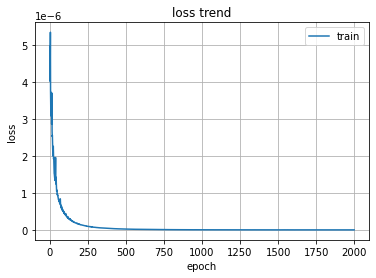

In [41]:
plt.plot(hist.history['loss'], label='train')

plt.title('loss trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

In [45]:
model = Sequential()
model.add( Dense(units=1, input_dim=60, activation='sigmoid'))

Epoch 1/2000
1/7 [===>..........................] - ETA: 0s - loss: 0.7266 - accuracy: 0.4688

ValueError: Data cardinality is ambiguous:
  x sizes: 145
  y sizes: 63
Please provide data which shares the same first dimension.

## 4.1 전체 자료 학습

In [ ]:
print('Test accuracy: %.4f' % 

In [ ]:
print('Training accuracy: %.4f' % )
print('Test accuracy: %.4f' % )

## 4.2 학습 셋 및 테스트셋 분리 (과적합 확인)

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,
                                                test_size=0.3,
                                                random_state=0)


In [77]:
y_test.shape

(63, 1)

In [117]:
%whos

Variable           Type               Data/Info
-----------------------------------------------
Dense              type               <class 'tensorflow.python<...>keras.layers.core.Dense'>
LabelEncoder       type               <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
Sequential         type               <class 'tensorflow.python<...>e.sequential.Sequential'>
StratifiedKFold    ABCMeta            <class 'sklearn.model_sel<...>._split.StratifiedKFold'>
X                  ndarray            208x60: 12480 elems, type `float64`, 99840 bytes
Y                  ndarray            208x1: 208 elems, type `int32`, 832 bytes
Y_str              ndarray            208: 208 elems, type `object`, 1664 bytes
accuracy_list      list               n=12
d                  list               n=15
df                 DataFrame                   0       1       <...>\n[208 rows x 61 columns]
e                  LabelEncoder       LabelEncoder()
hist               History            <tensorflo

In [78]:
model = Sequential()
model.add( Dense(units=24, input_dim=60, activation='relu'))
model.add( Dense(units=10, activation='relu'))
model.add( Dense(units=1, activation='sigmoid'))

In [79]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=500, batch_size=32, validation_data=(x_test, y_test))
print('Accuracy: %.4f'% (model.evaluate(X,Y)[1]))

Epoch 1/500
5/5 [==============================] - 0s 22ms/step - loss: 0.6895 - accuracy: 0.5379 - val_loss: 0.6868 - val_accuracy: 0.5397
Epoch 2/500
5/5 [==============================] - 0s 4ms/step - loss: 0.6822 - accuracy: 0.5310 - val_loss: 0.6833 - val_accuracy: 0.5397
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.5448 - val_loss: 0.6795 - val_accuracy: 0.5556
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 0.6716 - accuracy: 0.5862 - val_loss: 0.6759 - val_accuracy: 0.5714
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.6345 - val_loss: 0.6719 - val_accuracy: 0.5714
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 0.6632 - accuracy: 0.6069 - val_loss: 0.6685 - val_accuracy: 0.5556
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 0.6574 - accuracy: 0.6345 - val_loss: 0.6656 - val_accuracy: 0.6190
Epoch 8/500
5/5 [=========

5/5 [==============================] - 0s 3ms/step - loss: 0.2296 - accuracy: 0.9103 - val_loss: 0.4549 - val_accuracy: 0.8254
Epoch 117/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2342 - accuracy: 0.8897 - val_loss: 0.4666 - val_accuracy: 0.8095
Epoch 118/500
5/5 [==============================] - 0s 5ms/step - loss: 0.2257 - accuracy: 0.9034 - val_loss: 0.4588 - val_accuracy: 0.8095
Epoch 119/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2302 - accuracy: 0.9034 - val_loss: 0.4601 - val_accuracy: 0.8095
Epoch 120/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2251 - accuracy: 0.9241 - val_loss: 0.4586 - val_accuracy: 0.8254
Epoch 121/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2229 - accuracy: 0.8966 - val_loss: 0.4660 - val_accuracy: 0.8095
Epoch 122/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2186 - accuracy: 0.9034 - val_loss: 0.4614 - val_accuracy: 0.8095
Epoch 123/500
5/5 [========

Epoch 232/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0783 - accuracy: 0.9931 - val_loss: 0.6757 - val_accuracy: 0.8254
Epoch 233/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0835 - accuracy: 0.9862 - val_loss: 0.6773 - val_accuracy: 0.8254
Epoch 234/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0766 - accuracy: 0.9931 - val_loss: 0.6515 - val_accuracy: 0.8095
Epoch 235/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0791 - accuracy: 0.9862 - val_loss: 0.6590 - val_accuracy: 0.8095
Epoch 236/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0782 - accuracy: 0.9931 - val_loss: 0.6855 - val_accuracy: 0.8254
Epoch 237/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0764 - accuracy: 0.9931 - val_loss: 0.6640 - val_accuracy: 0.8095
Epoch 238/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0775 - accuracy: 0.9862 - val_loss: 0.6626 - val_accuracy: 0.8095
Epoch 239/500

Epoch 347/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 1.0000 - val_loss: 0.8672 - val_accuracy: 0.8095
Epoch 348/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 1.0000 - val_loss: 0.8587 - val_accuracy: 0.8095
Epoch 349/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 1.0000 - val_loss: 0.8704 - val_accuracy: 0.8095
Epoch 350/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 1.0000 - val_loss: 0.8712 - val_accuracy: 0.8095
Epoch 351/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 0.8681 - val_accuracy: 0.8095
Epoch 352/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0247 - accuracy: 1.0000 - val_loss: 0.8774 - val_accuracy: 0.8095
Epoch 353/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 1.0000 - val_loss: 0.8867 - val_accuracy: 0.8095
Epoch 354/500

Epoch 405/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.9580 - val_accuracy: 0.8095
Epoch 406/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.9645 - val_accuracy: 0.8095
Epoch 407/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.9513 - val_accuracy: 0.8095
Epoch 408/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.9592 - val_accuracy: 0.8095
Epoch 409/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 0.9574 - val_accuracy: 0.8095
Epoch 410/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.9748 - val_accuracy: 0.8095
Epoch 411/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 0.9743 - val_accuracy: 0.8095
Epoch 412/500

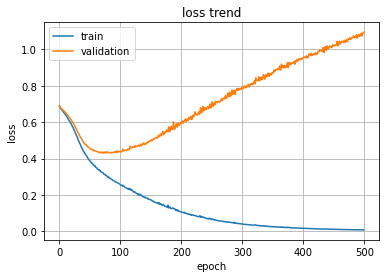

In [80]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('loss trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

In [65]:
model.evaluate(x_test, y_test)[1]

2/2 [==============================] - 0s 1ms/step - loss: 1.9828 - accuracy: 0.7937


0.7936508059501648

In [66]:
model.save('d:/Ai/sonar_model.h5')

In [67]:
%whos

Variable           Type            Data/Info
--------------------------------------------
Dense              type            <class 'tensorflow.python<...>keras.layers.core.Dense'>
LabelEncoder       type            <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
Sequential         type            <class 'tensorflow.python<...>e.sequential.Sequential'>
X                  ndarray         208x60: 12480 elems, type `float64`, 99840 bytes
Y                  ndarray         208x1: 208 elems, type `int32`, 832 bytes
Y_str              ndarray         208: 208 elems, type `object`, 1664 bytes
d                  list            n=15
df                 DataFrame                0       1       <...>\n[208 rows x 61 columns]
e                  LabelEncoder    LabelEncoder()
hist               History         <tensorflow.python.keras.<...>ct at 0x000001CE0A1F35B0>
i                  int             14
keras              module          <module 'tensorflow.keras<...>low\\keras\\__init__.py'

In [68]:
del model

In [69]:
%whos

Variable           Type            Data/Info
--------------------------------------------
Dense              type            <class 'tensorflow.python<...>keras.layers.core.Dense'>
LabelEncoder       type            <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
Sequential         type            <class 'tensorflow.python<...>e.sequential.Sequential'>
X                  ndarray         208x60: 12480 elems, type `float64`, 99840 bytes
Y                  ndarray         208x1: 208 elems, type `int32`, 832 bytes
Y_str              ndarray         208: 208 elems, type `object`, 1664 bytes
d                  list            n=15
df                 DataFrame                0       1       <...>\n[208 rows x 61 columns]
e                  LabelEncoder    LabelEncoder()
hist               History         <tensorflow.python.keras.<...>ct at 0x000001CE0A1F35B0>
i                  int             14
keras              module          <module 'tensorflow.keras<...>low\\keras\\__init__.py'

In [ ]:
#제품에 하단의 정보가 들어감

In [70]:
from tensorflow.keras.models import load_model
opt_model = load_model('d:/Ai/sonar_model.h5')

print('Training accuracy: %.4f' % (opt_model.evaluate(x_train, y_train)[1]))
print('Test accuracy: %.4f' % (opt_model.evaluate(x_test, y_test)[1]))

5/5 [==============================] - 0s 1ms/step - loss: 2.2971e-05 - accuracy: 1.0000
Training accuracy: 1.0000
2/2 [==============================] - 0s 991us/step - loss: 1.9828 - accuracy: 0.7937
Test accuracy: 0.7937


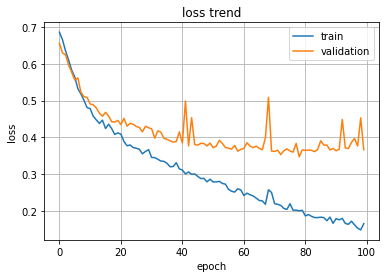

In [97]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('loss trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

## 4.3 교차 검증

In [144]:
from sklearn.model_selection import StratifiedKFold

seed = 0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True,
                      random_state=seed)

In [145]:
accuracy_list = []


x_train.shape, x_test.shape

((188, 60), (20, 60))

In [146]:
for train_index, test_index in skf.split(X, Y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    model = Sequential()
    model.add(Dense(units=24, input_dim=60, activation='relu'))
    model.add(Dense(units=10, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
    hist = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))
    accuracy_list.append(model.evaluate(x_test,y_test)[1])

Epoch 1/100
6/6 [==============================] - 0s 18ms/step - loss: 0.6846 - accuracy: 0.5134 - val_loss: 0.7233 - val_accuracy: 0.2857
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6723 - accuracy: 0.5936 - val_loss: 0.7178 - val_accuracy: 0.4762
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.6203 - val_loss: 0.7112 - val_accuracy: 0.4762
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6478 - accuracy: 0.6578 - val_loss: 0.7043 - val_accuracy: 0.5714
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6377 - accuracy: 0.6791 - val_loss: 0.7000 - val_accuracy: 0.5238
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6293 - accuracy: 0.6684 - val_loss: 0.6961 - val_accuracy: 0.5238
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6213 - accuracy: 0.6845 - val_loss: 0.6944 - val_accuracy: 0.5238
Epoch 8/100
6/6 [=========

Epoch 59/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3254 - accuracy: 0.8396 - val_loss: 0.9324 - val_accuracy: 0.6667
Epoch 60/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3240 - accuracy: 0.8556 - val_loss: 0.9104 - val_accuracy: 0.7143
Epoch 61/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3252 - accuracy: 0.8342 - val_loss: 0.9563 - val_accuracy: 0.6667
Epoch 62/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3178 - accuracy: 0.8449 - val_loss: 0.9217 - val_accuracy: 0.7143
Epoch 63/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3171 - accuracy: 0.8717 - val_loss: 0.9220 - val_accuracy: 0.7143
Epoch 64/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3133 - accuracy: 0.8503 - val_loss: 0.9558 - val_accuracy: 0.6667
Epoch 65/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3118 - accuracy: 0.8610 - val_loss: 0.9476 - val_accuracy: 0.7143
Epoch 66/100
6/6 [==

6/6 [==============================] - 0s 3ms/step - loss: 0.6103 - accuracy: 0.7059 - val_loss: 0.6071 - val_accuracy: 0.7619
Epoch 17/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6030 - accuracy: 0.7219 - val_loss: 0.5991 - val_accuracy: 0.6667
Epoch 18/100
6/6 [==============================] - 0s 3ms/step - loss: 0.5958 - accuracy: 0.7112 - val_loss: 0.5899 - val_accuracy: 0.6667
Epoch 19/100
6/6 [==============================] - 0s 3ms/step - loss: 0.5877 - accuracy: 0.7059 - val_loss: 0.5821 - val_accuracy: 0.6667
Epoch 20/100
6/6 [==============================] - 0s 3ms/step - loss: 0.5811 - accuracy: 0.7059 - val_loss: 0.5737 - val_accuracy: 0.7619
Epoch 21/100
6/6 [==============================] - 0s 3ms/step - loss: 0.5729 - accuracy: 0.7540 - val_loss: 0.5656 - val_accuracy: 0.7619
Epoch 22/100
6/6 [==============================] - 0s 3ms/step - loss: 0.5644 - accuracy: 0.7219 - val_loss: 0.5581 - val_accuracy: 0.7619
Epoch 23/100
6/6 [===============

Epoch 74/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3490 - accuracy: 0.8556 - val_loss: 0.3639 - val_accuracy: 0.9048
Epoch 75/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3492 - accuracy: 0.8503 - val_loss: 0.3765 - val_accuracy: 0.8571
Epoch 76/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3434 - accuracy: 0.8556 - val_loss: 0.3601 - val_accuracy: 0.9048
Epoch 77/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3404 - accuracy: 0.8556 - val_loss: 0.3624 - val_accuracy: 0.9048
Epoch 78/100
6/6 [==============================] - ETA: 0s - loss: 0.4662 - accuracy: 0.84 - 0s 3ms/step - loss: 0.3382 - accuracy: 0.8663 - val_loss: 0.3605 - val_accuracy: 0.9048
Epoch 79/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.8556 - val_loss: 0.3645 - val_accuracy: 0.9048
Epoch 80/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3353 - accuracy: 0.8503 - val_loss: 0.3550 -

6/6 [==============================] - 0s 3ms/step - loss: 0.2839 - accuracy: 0.8984 - val_loss: 0.2944 - val_accuracy: 0.8095
Epoch 90/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2825 - accuracy: 0.9037 - val_loss: 0.3013 - val_accuracy: 0.8095
Epoch 91/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2820 - accuracy: 0.9144 - val_loss: 0.2885 - val_accuracy: 0.8095
Epoch 92/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2752 - accuracy: 0.9091 - val_loss: 0.3196 - val_accuracy: 0.8095
Epoch 93/100
6/6 [==============================] - ETA: 0s - loss: 0.2851 - accuracy: 0.90 - 0s 3ms/step - loss: 0.2735 - accuracy: 0.9037 - val_loss: 0.3023 - val_accuracy: 0.8095
Epoch 94/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2702 - accuracy: 0.8984 - val_loss: 0.3094 - val_accuracy: 0.8095
Epoch 95/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2667 - accuracy: 0.9037 - val_loss: 0.3024 - val_accuracy

6/6 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.5241 - val_loss: 0.6934 - val_accuracy: 0.3810
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6838 - accuracy: 0.5668 - val_loss: 0.6876 - val_accuracy: 0.5238
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6782 - accuracy: 0.6203 - val_loss: 0.6826 - val_accuracy: 0.5238
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6716 - accuracy: 0.5989 - val_loss: 0.6783 - val_accuracy: 0.4762
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6662 - accuracy: 0.5989 - val_loss: 0.6727 - val_accuracy: 0.4762
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6598 - accuracy: 0.5882 - val_loss: 0.6653 - val_accuracy: 0.4762
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6522 - accuracy: 0.6043 - val_loss: 0.6593 - val_accuracy: 0.5238
Epoch 10/100
6/6 [=====================

Epoch 19/100
6/6 [==============================] - 0s 3ms/step - loss: 0.5349 - accuracy: 0.8182 - val_loss: 0.6011 - val_accuracy: 0.7143
Epoch 20/100
6/6 [==============================] - 0s 3ms/step - loss: 0.5235 - accuracy: 0.8235 - val_loss: 0.6021 - val_accuracy: 0.7143
Epoch 21/100
6/6 [==============================] - 0s 4ms/step - loss: 0.5099 - accuracy: 0.8182 - val_loss: 0.5869 - val_accuracy: 0.7143
Epoch 22/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4987 - accuracy: 0.7968 - val_loss: 0.5835 - val_accuracy: 0.7143
Epoch 23/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4873 - accuracy: 0.8021 - val_loss: 0.5824 - val_accuracy: 0.7143
Epoch 24/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4778 - accuracy: 0.8128 - val_loss: 0.5885 - val_accuracy: 0.7143
Epoch 25/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4708 - accuracy: 0.8075 - val_loss: 0.5742 - val_accuracy: 0.6667
Epoch 26/100
6/6 [==

Epoch 77/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2713 - accuracy: 0.8877 - val_loss: 0.4826 - val_accuracy: 0.8095
Epoch 78/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2679 - accuracy: 0.9091 - val_loss: 0.4892 - val_accuracy: 0.7619
Epoch 79/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2673 - accuracy: 0.9091 - val_loss: 0.4795 - val_accuracy: 0.8095
Epoch 80/100
6/6 [==============================] - 0s 4ms/step - loss: 0.2656 - accuracy: 0.8984 - val_loss: 0.4750 - val_accuracy: 0.8095
Epoch 81/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2602 - accuracy: 0.9144 - val_loss: 0.4892 - val_accuracy: 0.7619
Epoch 82/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2594 - accuracy: 0.9144 - val_loss: 0.4786 - val_accuracy: 0.7619
Epoch 83/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2582 - accuracy: 0.9144 - val_loss: 0.4766 - val_accuracy: 0.8095
Epoch 84/100
6/6 [==

Epoch 35/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4286 - accuracy: 0.8235 - val_loss: 0.4789 - val_accuracy: 0.6667
Epoch 36/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4220 - accuracy: 0.8396 - val_loss: 0.4751 - val_accuracy: 0.7143
Epoch 37/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4166 - accuracy: 0.8396 - val_loss: 0.4691 - val_accuracy: 0.7143
Epoch 38/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4070 - accuracy: 0.8396 - val_loss: 0.4630 - val_accuracy: 0.7143
Epoch 39/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4019 - accuracy: 0.8396 - val_loss: 0.4593 - val_accuracy: 0.7143
Epoch 40/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4027 - accuracy: 0.8342 - val_loss: 0.4554 - val_accuracy: 0.7619
Epoch 41/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 0.8556 - val_loss: 0.4512 - val_accuracy: 0.7143
Epoch 42/100
6/6 [==

Epoch 51/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3511 - accuracy: 0.8663 - val_loss: 0.4632 - val_accuracy: 0.7619
Epoch 52/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3530 - accuracy: 0.8717 - val_loss: 0.4636 - val_accuracy: 0.8095
Epoch 53/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3511 - accuracy: 0.8770 - val_loss: 0.4598 - val_accuracy: 0.7619
Epoch 54/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3459 - accuracy: 0.8449 - val_loss: 0.4567 - val_accuracy: 0.7619
Epoch 55/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3411 - accuracy: 0.8770 - val_loss: 0.4632 - val_accuracy: 0.8095
Epoch 56/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3384 - accuracy: 0.8717 - val_loss: 0.4587 - val_accuracy: 0.7619
Epoch 57/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3444 - accuracy: 0.8449 - val_loss: 0.4600 - val_accuracy: 0.7619
Epoch 58/100
6/6 [==

6/6 [==============================] - 0s 3ms/step - loss: 0.3653 - accuracy: 0.8723 - val_loss: 0.4161 - val_accuracy: 0.8500
Epoch 67/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3622 - accuracy: 0.8723 - val_loss: 0.4074 - val_accuracy: 0.9000
Epoch 68/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3610 - accuracy: 0.8670 - val_loss: 0.4064 - val_accuracy: 0.8500
Epoch 69/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3643 - accuracy: 0.8670 - val_loss: 0.4083 - val_accuracy: 0.8500
Epoch 70/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3533 - accuracy: 0.8670 - val_loss: 0.3935 - val_accuracy: 0.9000
Epoch 71/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3601 - accuracy: 0.8457 - val_loss: 0.4008 - val_accuracy: 0.8500
Epoch 72/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3511 - accuracy: 0.8670 - val_loss: 0.3913 - val_accuracy: 0.9000
Epoch 73/100
6/6 [===============

6/6 [==============================] - 0s 2ms/step - loss: 0.5856 - accuracy: 0.7128 - val_loss: 0.6306 - val_accuracy: 0.5500
Epoch 25/100
6/6 [==============================] - 0s 2ms/step - loss: 0.5774 - accuracy: 0.7181 - val_loss: 0.6255 - val_accuracy: 0.5000
Epoch 26/100
6/6 [==============================] - 0s 3ms/step - loss: 0.5693 - accuracy: 0.7234 - val_loss: 0.6185 - val_accuracy: 0.5000
Epoch 27/100
6/6 [==============================] - 0s 3ms/step - loss: 0.5621 - accuracy: 0.7287 - val_loss: 0.6099 - val_accuracy: 0.5000
Epoch 28/100
6/6 [==============================] - 0s 3ms/step - loss: 0.5526 - accuracy: 0.7606 - val_loss: 0.6072 - val_accuracy: 0.5000
Epoch 29/100
6/6 [==============================] - 0s 3ms/step - loss: 0.5451 - accuracy: 0.7872 - val_loss: 0.5986 - val_accuracy: 0.5000
Epoch 30/100
6/6 [==============================] - 0s 3ms/step - loss: 0.5373 - accuracy: 0.7872 - val_loss: 0.5874 - val_accuracy: 0.5000
Epoch 31/100
6/6 [===============

In [147]:
model.summary()

Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_246 (Dense)            (None, 24)                1464      
_________________________________________________________________
dense_247 (Dense)            (None, 10)                250       
_________________________________________________________________
dense_248 (Dense)            (None, 1)                 11        
Total params: 1,725
Trainable params: 1,725
Non-trainable params: 0
_________________________________________________________________


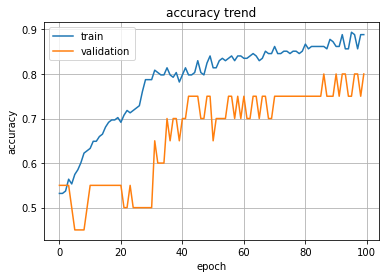

In [148]:
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.title('accuracy trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

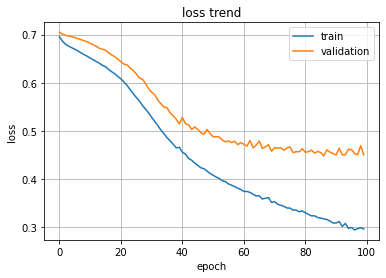

In [149]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('loss trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

In [150]:
print(n_fold,"-fold accuracy: ", accuracy_list)

10 -fold accuracy:  [0.7142857313156128, 0.9523809552192688, 0.8095238208770752, 0.8095238208770752, 0.761904776096344, 0.761904776096344, 0.8571428656578064, 0.761904776096344, 0.8999999761581421, 0.800000011920929]


In [151]:
print("Average accuracy: " , sum(accuracy_list)/n_fold) 

Average accuracy:  0.8128571510314941


# 5. Wine 분류

In [152]:
wine = pd.read_csv('d:/Ai/wine.csv', header=None)
wine

0     1     2    3      4     5      6        7     8     9     10  \
0      7.4  0.70  0.00  1.9  0.076  11.0   34.0  0.99780  3.51  0.56   9.4   
1      7.8  0.88  0.00  2.6  0.098  25.0   67.0  0.99680  3.20  0.68   9.8   
2      7.8  0.76  0.04  2.3  0.092  15.0   54.0  0.99700  3.26  0.65   9.8   
3     11.2  0.28  0.56  1.9  0.075  17.0   60.0  0.99800  3.16  0.58   9.8   
4      7.4  0.70  0.00  1.9  0.076  11.0   34.0  0.99780  3.51  0.56   9.4   
...    ...   ...   ...  ...    ...   ...    ...      ...   ...   ...   ...   
6492   6.2  0.21  0.29  1.6  0.039  24.0   92.0  0.99114  3.27  0.50  11.2   
6493   6.6  0.32  0.36  8.0  0.047  57.0  168.0  0.99490  3.15  0.46   9.6   
6494   6.5  0.24  0.19  1.2  0.041  30.0  111.0  0.99254  2.99  0.46   9.4   
6495   5.5  0.29  0.30  1.1  0.022  20.0  110.0  0.98869  3.34  0.38  12.8   
6496   6.0  0.21  0.38  0.8  0.020  22.0   98.0  0.98941  3.26  0.32  11.8   

      11  12  
0      5   1  
1      5   1  
2      5   1  
3      6   1  
4      5   1  
...   ..  ..  
6492   6   0  
6493   5   0  
6494   6   0  
6495   7   0  
6496   6   0  

[6497 rows x 13 columns]

In [155]:
wine[11].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: 11, dtype: int64

In [169]:
df = wine.sample(frac=1) #.sample(frac=1) 셔플하는 기능 frac = 0 ~ 100%
df.head()

0     1     2     3      4     5      6        7     8     9     10  \
1070  9.3  0.33  0.45   1.5  0.057  19.0   37.0  0.99498  3.18  0.89  11.1   
3233  8.3  0.25  0.49  16.8  0.048  50.0  228.0  1.00010  3.03  0.52   9.2   
4827  6.8  0.27  0.42   7.3  0.054  58.0  200.0  0.99556  3.12  0.49   9.4   
1836  6.8  0.52  0.32  13.2  0.044  54.0  221.0  0.99720  3.27  0.50   9.6   
5099  6.0  0.28  0.27  15.5  0.036  31.0  134.0  0.99408  3.19  0.44  13.0   

      11  12  
1070   7   1  
3233   6   0  
4827   6   0  
1836   6   0  
5099   7   0

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 1070 to 314
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [173]:
x = df.to_numpy()[:,:-1]
y = df.to_numpy()[:,[-1]]
x.shape, y.shape

((6497, 12), (6497, 1))

## 5.1 수행 1

In [175]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

seed=0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

In [184]:
model = Sequential()
model.add(Dense(units=30, input_dim=12, activation='relu'))
model.add(Dense(units=12, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
     optimizer='adam',
     metrics=['accuracy'])


In [188]:
MODEL_DIR = 'd:/Ai/WineModel'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelfile = MODEL_DIR+'{epoch:02d}-{val_loss:.4f}.h5'
checkpointer = ModelCheckpoint(filepath=modelfile,
                              monitor='val_loss',verbose=1,
                              save_best_only=True)


hist = model.fit(x, y, epochs=3500, batch_size=200, validation_split=0.33, callbacks=[checkpointer])


Epoch 1/3500
 1/22 [>.............................] - ETA: 0s - loss: 8.9812 - accuracy: 0.2000
Epoch 00001: val_loss improved from inf to 0.49817, saving model to d:/Ai\WineModel01-0.4982.h5
22/22 [==============================] - 0s 6ms/step - loss: 3.1738 - accuracy: 0.3325 - val_loss: 0.4982 - val_accuracy: 0.7478
Epoch 2/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.5111 - accuracy: 0.7350
Epoch 00002: val_loss improved from 0.49817 to 0.44083, saving model to d:/Ai\WineModel02-0.4408.h5
22/22 [==============================] - 0s 9ms/step - loss: 0.4423 - accuracy: 0.7569 - val_loss: 0.4408 - val_accuracy: 0.7487
Epoch 3/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.3694 - accuracy: 0.8050
Epoch 00003: val_loss improved from 0.44083 to 0.41653, saving model to d:/Ai\WineModel03-0.4165.h5
22/22 [==============================] - 0s 4ms/step - loss: 0.4162 - accuracy: 0.7587 - val_loss: 0.4165 - val_accuracy: 0.7529
Epoch 4/3500
 1/22 [>........

22/22 [==============================] - 0s 3ms/step - loss: 0.1727 - accuracy: 0.9414 - val_loss: 0.1694 - val_accuracy: 0.9422
Epoch 27/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.1766 - accuracy: 0.9350
Epoch 00027: val_loss improved from 0.16936 to 0.16774, saving model to d:/Ai\WineModel27-0.1677.h5
22/22 [==============================] - 0s 2ms/step - loss: 0.1689 - accuracy: 0.9423 - val_loss: 0.1677 - val_accuracy: 0.9417
Epoch 28/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.1157 - accuracy: 0.9700
Epoch 00028: val_loss improved from 0.16774 to 0.16094, saving model to d:/Ai\WineModel28-0.1609.h5
22/22 [==============================] - 0s 2ms/step - loss: 0.1655 - accuracy: 0.9437 - val_loss: 0.1609 - val_accuracy: 0.9431
Epoch 29/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.1500 - accuracy: 0.9500
Epoch 00029: val_loss improved from 0.16094 to 0.15590, saving model to d:/Ai\WineModel29-0.1559.h5
22/22 [===============

22/22 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 0.9704 - val_loss: 0.0786 - val_accuracy: 0.9734
Epoch 53/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.1425 - accuracy: 0.9550
Epoch 00053: val_loss did not improve from 0.07860
22/22 [==============================] - 0s 1ms/step - loss: 0.0893 - accuracy: 0.9731 - val_loss: 0.0843 - val_accuracy: 0.9753
Epoch 54/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0818 - accuracy: 0.9700
Epoch 00054: val_loss did not improve from 0.07860
22/22 [==============================] - 0s 2ms/step - loss: 0.0905 - accuracy: 0.9701 - val_loss: 0.0788 - val_accuracy: 0.9748
Epoch 55/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0735 - accuracy: 0.9800
Epoch 00055: val_loss improved from 0.07860 to 0.07475, saving model to d:/Ai\WineModel55-0.0748.h5
22/22 [==============================] - 0s 2ms/step - loss: 0.0879 - accuracy: 0.9720 - val_loss: 0.0748 - val_accuracy

 1/22 [>.............................] - ETA: 0s - loss: 0.0373 - accuracy: 0.9900
Epoch 00108: val_loss did not improve from 0.05143
22/22 [==============================] - 0s 1ms/step - loss: 0.0612 - accuracy: 0.9823 - val_loss: 0.0516 - val_accuracy: 0.9828
Epoch 109/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0936 - accuracy: 0.9750
Epoch 00109: val_loss improved from 0.05143 to 0.05030, saving model to d:/Ai\WineModel109-0.0503.h5
22/22 [==============================] - 0s 2ms/step - loss: 0.0678 - accuracy: 0.9782 - val_loss: 0.0503 - val_accuracy: 0.9851
Epoch 110/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0836 - accuracy: 0.9750
Epoch 00110: val_loss did not improve from 0.05030
22/22 [==============================] - 0s 1ms/step - loss: 0.0609 - accuracy: 0.9825 - val_loss: 0.0506 - val_accuracy: 0.9865
Epoch 111/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0441 - accuracy: 0.9850
Epoch 00111: val_loss improved fr

Epoch 165/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0285 - accuracy: 0.9800
Epoch 00165: val_loss did not improve from 0.04439
22/22 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9825 - val_loss: 0.0461 - val_accuracy: 0.9897
Epoch 166/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0234 - accuracy: 0.9900
Epoch 00166: val_loss did not improve from 0.04439
22/22 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 0.9814 - val_loss: 0.0495 - val_accuracy: 0.9879
Epoch 167/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0778 - accuracy: 0.9750
Epoch 00167: val_loss did not improve from 0.04439
22/22 [==============================] - 0s 1ms/step - loss: 0.0560 - accuracy: 0.9837 - val_loss: 0.0460 - val_accuracy: 0.9837
Epoch 168/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0417 - accuracy: 0.9850
Epoch 00168: val_loss improved from 0.04439 to 0.04376, saving model

Epoch 194/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0442 - accuracy: 0.9900
Epoch 00194: val_loss did not improve from 0.04240
22/22 [==============================] - 0s 2ms/step - loss: 0.0555 - accuracy: 0.9839 - val_loss: 0.0433 - val_accuracy: 0.9897
Epoch 195/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0934 - accuracy: 0.9850
Epoch 00195: val_loss did not improve from 0.04240
22/22 [==============================] - 0s 2ms/step - loss: 0.0540 - accuracy: 0.9853 - val_loss: 0.0445 - val_accuracy: 0.9893
Epoch 196/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0665 - accuracy: 0.9800
Epoch 00196: val_loss did not improve from 0.04240
22/22 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.9825 - val_loss: 0.0440 - val_accuracy: 0.9874
Epoch 197/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0616 - accuracy: 0.9800
Epoch 00197: val_loss did not improve from 0.04240
22/22 [==========

Epoch 252/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0246 - accuracy: 0.9900
Epoch 00252: val_loss did not improve from 0.04152
22/22 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9832 - val_loss: 0.0437 - val_accuracy: 0.9888
Epoch 253/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0373 - accuracy: 0.9850
Epoch 00253: val_loss did not improve from 0.04152
22/22 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9832 - val_loss: 0.0438 - val_accuracy: 0.9883
Epoch 254/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0628 - accuracy: 0.9850
Epoch 00254: val_loss did not improve from 0.04152
22/22 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 0.9848 - val_loss: 0.0430 - val_accuracy: 0.9902
Epoch 255/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.1035 - accuracy: 0.9700
Epoch 00255: val_loss did not improve from 0.04152
22/22 [==========

Epoch 281/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0271 - accuracy: 0.9900
Epoch 00281: val_loss improved from 0.04011 to 0.04001, saving model to d:/Ai\WineModel281-0.0400.h5
22/22 [==============================] - 0s 2ms/step - loss: 0.0489 - accuracy: 0.9855 - val_loss: 0.0400 - val_accuracy: 0.9911
Epoch 282/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0464 - accuracy: 0.9700
Epoch 00282: val_loss did not improve from 0.04001
22/22 [==============================] - 0s 1ms/step - loss: 0.0504 - accuracy: 0.9848 - val_loss: 0.0430 - val_accuracy: 0.9897
Epoch 283/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0720 - accuracy: 0.9700
Epoch 00283: val_loss did not improve from 0.04001
22/22 [==============================] - 0s 2ms/step - loss: 0.0523 - accuracy: 0.9858 - val_loss: 0.0453 - val_accuracy: 0.9869
Epoch 284/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0800 - accuracy: 0.9850
Epoch 00284: val_l

 1/22 [>.............................] - ETA: 0s - loss: 0.0296 - accuracy: 0.9900
Epoch 00339: val_loss did not improve from 0.03967
22/22 [==============================] - 0s 2ms/step - loss: 0.0465 - accuracy: 0.9874 - val_loss: 0.0516 - val_accuracy: 0.9860
Epoch 340/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0696 - accuracy: 0.9850
Epoch 00340: val_loss did not improve from 0.03967
22/22 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9851 - val_loss: 0.0437 - val_accuracy: 0.9869
Epoch 341/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0643 - accuracy: 0.9850
Epoch 00341: val_loss did not improve from 0.03967
22/22 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9869 - val_loss: 0.0489 - val_accuracy: 0.9860
Epoch 342/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0937 - accuracy: 0.9750
Epoch 00342: val_loss did not improve from 0.03967
22/22 [=========================

 1/22 [>.............................] - ETA: 0s - loss: 0.0503 - accuracy: 0.9900
Epoch 00397: val_loss did not improve from 0.03767
22/22 [==============================] - 0s 1ms/step - loss: 0.0447 - accuracy: 0.9851 - val_loss: 0.0393 - val_accuracy: 0.9897
Epoch 398/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0547 - accuracy: 0.9700
Epoch 00398: val_loss did not improve from 0.03767
22/22 [==============================] - 0s 2ms/step - loss: 0.0445 - accuracy: 0.9874 - val_loss: 0.0392 - val_accuracy: 0.9911
Epoch 399/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0656 - accuracy: 0.9850
Epoch 00399: val_loss did not improve from 0.03767
22/22 [==============================] - 0s 2ms/step - loss: 0.0466 - accuracy: 0.9858 - val_loss: 0.0396 - val_accuracy: 0.9893
Epoch 400/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0527 - accuracy: 0.9900
Epoch 00400: val_loss did not improve from 0.03767
22/22 [=========================

22/22 [==============================] - 0s 1ms/step - loss: 0.0463 - accuracy: 0.9867 - val_loss: 0.0410 - val_accuracy: 0.9874
Epoch 427/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0656 - accuracy: 0.9850
Epoch 00427: val_loss did not improve from 0.03767
22/22 [==============================] - 0s 2ms/step - loss: 0.0489 - accuracy: 0.9851 - val_loss: 0.0404 - val_accuracy: 0.9874
Epoch 428/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0528 - accuracy: 0.9800
Epoch 00428: val_loss did not improve from 0.03767
22/22 [==============================] - 0s 2ms/step - loss: 0.0448 - accuracy: 0.9858 - val_loss: 0.0390 - val_accuracy: 0.9911
Epoch 429/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0626 - accuracy: 0.9850
Epoch 00429: val_loss did not improve from 0.03767
22/22 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9862 - val_loss: 0.0449 - val_accuracy: 0.9846
Epoch 430/3500
 1/22 [>..............

Epoch 456/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0122 - accuracy: 1.0000
Epoch 00456: val_loss did not improve from 0.03742
22/22 [==============================] - 0s 2ms/step - loss: 0.0456 - accuracy: 0.9867 - val_loss: 0.0520 - val_accuracy: 0.9874
Epoch 457/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0562 - accuracy: 0.9800
Epoch 00457: val_loss did not improve from 0.03742
22/22 [==============================] - 0s 2ms/step - loss: 0.0453 - accuracy: 0.9864 - val_loss: 0.0376 - val_accuracy: 0.9907
Epoch 458/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0599 - accuracy: 0.9900
Epoch 00458: val_loss did not improve from 0.03742
22/22 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9864 - val_loss: 0.0379 - val_accuracy: 0.9907
Epoch 459/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0277 - accuracy: 0.9800
Epoch 00459: val_loss did not improve from 0.03742
22/22 [==========

 1/22 [>.............................] - ETA: 0s - loss: 0.0091 - accuracy: 1.0000
Epoch 00514: val_loss did not improve from 0.03618
22/22 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9848 - val_loss: 0.0427 - val_accuracy: 0.9897
Epoch 515/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0236 - accuracy: 1.0000
Epoch 00515: val_loss did not improve from 0.03618
22/22 [==============================] - 0s 2ms/step - loss: 0.0464 - accuracy: 0.9862 - val_loss: 0.0372 - val_accuracy: 0.9911
Epoch 516/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0317 - accuracy: 0.9900
Epoch 00516: val_loss did not improve from 0.03618
22/22 [==============================] - 0s 2ms/step - loss: 0.0448 - accuracy: 0.9871 - val_loss: 0.0365 - val_accuracy: 0.9911
Epoch 517/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0114 - accuracy: 1.0000
Epoch 00517: val_loss did not improve from 0.03618
22/22 [=========================

 1/22 [>.............................] - ETA: 0s - loss: 0.0479 - accuracy: 0.9900
Epoch 00572: val_loss did not improve from 0.03476
22/22 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9876 - val_loss: 0.0362 - val_accuracy: 0.9916
Epoch 573/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0177 - accuracy: 0.9950
Epoch 00573: val_loss did not improve from 0.03476
22/22 [==============================] - 0s 2ms/step - loss: 0.0429 - accuracy: 0.9851 - val_loss: 0.0415 - val_accuracy: 0.9907
Epoch 574/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0245 - accuracy: 0.9900
Epoch 00574: val_loss did not improve from 0.03476
22/22 [==============================] - 0s 2ms/step - loss: 0.0445 - accuracy: 0.9871 - val_loss: 0.0373 - val_accuracy: 0.9893
Epoch 575/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0760 - accuracy: 0.9700
Epoch 00575: val_loss did not improve from 0.03476
22/22 [=========================

Epoch 601/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0367 - accuracy: 0.9900
Epoch 00601: val_loss did not improve from 0.03404
22/22 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9871 - val_loss: 0.0347 - val_accuracy: 0.9921
Epoch 602/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0263 - accuracy: 0.9850
Epoch 00602: val_loss did not improve from 0.03404
22/22 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9864 - val_loss: 0.0482 - val_accuracy: 0.9865
Epoch 603/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0311 - accuracy: 0.9900
Epoch 00603: val_loss did not improve from 0.03404
22/22 [==============================] - 0s 2ms/step - loss: 0.0445 - accuracy: 0.9851 - val_loss: 0.0364 - val_accuracy: 0.9916
Epoch 604/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0626 - accuracy: 0.9800
Epoch 00604: val_loss did not improve from 0.03404
22/22 [==========

 1/22 [>.............................] - ETA: 0s - loss: 0.0456 - accuracy: 0.9850
Epoch 00659: val_loss did not improve from 0.03277
22/22 [==============================] - 0s 1ms/step - loss: 0.0399 - accuracy: 0.9878 - val_loss: 0.0344 - val_accuracy: 0.9916
Epoch 660/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0328 - accuracy: 0.9850
Epoch 00660: val_loss did not improve from 0.03277
22/22 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9848 - val_loss: 0.0501 - val_accuracy: 0.9818
Epoch 661/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0276 - accuracy: 0.9850
Epoch 00661: val_loss did not improve from 0.03277
22/22 [==============================] - 0s 2ms/step - loss: 0.0406 - accuracy: 0.9885 - val_loss: 0.0343 - val_accuracy: 0.9935
Epoch 662/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0513 - accuracy: 0.9850
Epoch 00662: val_loss did not improve from 0.03277
22/22 [=========================

Epoch 718/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0213 - accuracy: 0.9850
Epoch 00718: val_loss did not improve from 0.03242
22/22 [==============================] - 0s 1ms/step - loss: 0.0380 - accuracy: 0.9878 - val_loss: 0.0340 - val_accuracy: 0.9897
Epoch 719/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0430 - accuracy: 0.9950
Epoch 00719: val_loss did not improve from 0.03242
22/22 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 0.9864 - val_loss: 0.0347 - val_accuracy: 0.9907
Epoch 720/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0269 - accuracy: 0.9950
Epoch 00720: val_loss did not improve from 0.03242
22/22 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.9878 - val_loss: 0.0333 - val_accuracy: 0.9930
Epoch 721/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0609 - accuracy: 0.9850
Epoch 00721: val_loss did not improve from 0.03242
22/22 [==========

22/22 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9867 - val_loss: 0.0346 - val_accuracy: 0.9911
Epoch 748/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0425 - accuracy: 0.9850
Epoch 00748: val_loss did not improve from 0.03242
22/22 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9869 - val_loss: 0.0334 - val_accuracy: 0.9916
Epoch 749/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0654 - accuracy: 0.9750
Epoch 00749: val_loss did not improve from 0.03242
22/22 [==============================] - 0s 2ms/step - loss: 0.0369 - accuracy: 0.9885 - val_loss: 0.0329 - val_accuracy: 0.9925
Epoch 750/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0551 - accuracy: 0.9850
Epoch 00750: val_loss did not improve from 0.03242
22/22 [==============================] - 0s 1ms/step - loss: 0.0415 - accuracy: 0.9867 - val_loss: 0.0672 - val_accuracy: 0.9832
Epoch 751/3500
 1/22 [>..............

Epoch 777/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0092 - accuracy: 0.9950
Epoch 00777: val_loss did not improve from 0.03125
22/22 [==============================] - 0s 2ms/step - loss: 0.0355 - accuracy: 0.9885 - val_loss: 0.0332 - val_accuracy: 0.9921
Epoch 778/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0166 - accuracy: 0.9950
Epoch 00778: val_loss did not improve from 0.03125
22/22 [==============================] - 0s 2ms/step - loss: 0.0371 - accuracy: 0.9890 - val_loss: 0.0323 - val_accuracy: 0.9925
Epoch 779/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0321 - accuracy: 0.9850
Epoch 00779: val_loss did not improve from 0.03125
22/22 [==============================] - 0s 1ms/step - loss: 0.0461 - accuracy: 0.9841 - val_loss: 0.0391 - val_accuracy: 0.9883
Epoch 780/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0312 - accuracy: 0.9900
Epoch 00780: val_loss did not improve from 0.03125
22/22 [==========

22/22 [==============================] - 0s 2ms/step - loss: 0.0398 - accuracy: 0.9862 - val_loss: 0.0414 - val_accuracy: 0.9855
Epoch 807/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0573 - accuracy: 0.9850
Epoch 00807: val_loss did not improve from 0.03125
22/22 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 0.9862 - val_loss: 0.0365 - val_accuracy: 0.9879
Epoch 808/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0446 - accuracy: 0.9950
Epoch 00808: val_loss did not improve from 0.03125
22/22 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9867 - val_loss: 0.0347 - val_accuracy: 0.9916
Epoch 809/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0288 - accuracy: 0.9900
Epoch 00809: val_loss did not improve from 0.03125
22/22 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9869 - val_loss: 0.0353 - val_accuracy: 0.9911
Epoch 810/3500
 1/22 [>..............

Epoch 836/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0473 - accuracy: 0.9850
Epoch 00836: val_loss did not improve from 0.03068
22/22 [==============================] - 0s 2ms/step - loss: 0.0368 - accuracy: 0.9897 - val_loss: 0.0320 - val_accuracy: 0.9925
Epoch 837/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0588 - accuracy: 0.9850
Epoch 00837: val_loss did not improve from 0.03068
22/22 [==============================] - 0s 1ms/step - loss: 0.0394 - accuracy: 0.9874 - val_loss: 0.0347 - val_accuracy: 0.9888
Epoch 838/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0621 - accuracy: 0.9800
Epoch 00838: val_loss did not improve from 0.03068
22/22 [==============================] - 0s 2ms/step - loss: 0.0376 - accuracy: 0.9878 - val_loss: 0.0328 - val_accuracy: 0.9935
Epoch 839/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0487 - accuracy: 0.9900
Epoch 00839: val_loss did not improve from 0.03068
22/22 [==========

 1/22 [>.............................] - ETA: 0s - loss: 0.0284 - accuracy: 0.9850
Epoch 00894: val_loss did not improve from 0.03000
22/22 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 0.9885 - val_loss: 0.0334 - val_accuracy: 0.9925
Epoch 895/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0427 - accuracy: 0.9900
Epoch 00895: val_loss did not improve from 0.03000
22/22 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9890 - val_loss: 0.0329 - val_accuracy: 0.9907
Epoch 896/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0548 - accuracy: 0.9800
Epoch 00896: val_loss did not improve from 0.03000
22/22 [==============================] - 0s 2ms/step - loss: 0.0338 - accuracy: 0.9892 - val_loss: 0.0330 - val_accuracy: 0.9935
Epoch 897/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0298 - accuracy: 0.9850
Epoch 00897: val_loss did not improve from 0.03000
22/22 [=========================

Epoch 953/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0588 - accuracy: 0.9850
Epoch 00953: val_loss did not improve from 0.02966
22/22 [==============================] - 0s 1ms/step - loss: 0.0346 - accuracy: 0.9906 - val_loss: 0.0309 - val_accuracy: 0.9921
Epoch 954/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0131 - accuracy: 0.9950
Epoch 00954: val_loss did not improve from 0.02966
22/22 [==============================] - 0s 2ms/step - loss: 0.0340 - accuracy: 0.9899 - val_loss: 0.0311 - val_accuracy: 0.9930
Epoch 955/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0541 - accuracy: 0.9850
Epoch 00955: val_loss did not improve from 0.02966
22/22 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9890 - val_loss: 0.0362 - val_accuracy: 0.9921
Epoch 956/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0367 - accuracy: 0.9800
Epoch 00956: val_loss did not improve from 0.02966
22/22 [==========

Epoch 983/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0481 - accuracy: 0.9850
Epoch 00983: val_loss did not improve from 0.02966
22/22 [==============================] - 0s 1ms/step - loss: 0.0357 - accuracy: 0.9876 - val_loss: 0.0406 - val_accuracy: 0.9902
Epoch 984/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0859 - accuracy: 0.9700
Epoch 00984: val_loss did not improve from 0.02966
22/22 [==============================] - 0s 2ms/step - loss: 0.0332 - accuracy: 0.9908 - val_loss: 0.0319 - val_accuracy: 0.9916
Epoch 985/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0132 - accuracy: 0.9950
Epoch 00985: val_loss did not improve from 0.02966
22/22 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.9892 - val_loss: 0.0318 - val_accuracy: 0.9911
Epoch 986/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0226 - accuracy: 0.9900
Epoch 00986: val_loss did not improve from 0.02966
22/22 [==========

Epoch 1042/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0126 - accuracy: 1.0000
Epoch 01042: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 1ms/step - loss: 0.0335 - accuracy: 0.9890 - val_loss: 0.0317 - val_accuracy: 0.9930
Epoch 1043/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0130 - accuracy: 1.0000
Epoch 01043: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 1ms/step - loss: 0.0332 - accuracy: 0.9897 - val_loss: 0.0363 - val_accuracy: 0.9925
Epoch 1044/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0252 - accuracy: 0.9900
Epoch 01044: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 2ms/step - loss: 0.0357 - accuracy: 0.9878 - val_loss: 0.0307 - val_accuracy: 0.9930
Epoch 1045/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.1216 - accuracy: 0.9700
Epoch 01045: val_loss did not improve from 0.02881
22/22 [======

Epoch 1072/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0382 - accuracy: 0.9900
Epoch 01072: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 1ms/step - loss: 0.0354 - accuracy: 0.9894 - val_loss: 0.0302 - val_accuracy: 0.9921
Epoch 1073/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0490 - accuracy: 0.9900
Epoch 01073: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 1ms/step - loss: 0.0308 - accuracy: 0.9910 - val_loss: 0.0326 - val_accuracy: 0.9935
Epoch 1074/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0623 - accuracy: 0.9850
Epoch 01074: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 2ms/step - loss: 0.0314 - accuracy: 0.9903 - val_loss: 0.0312 - val_accuracy: 0.9921
Epoch 1075/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0453 - accuracy: 0.9850
Epoch 01075: val_loss did not improve from 0.02881
22/22 [======

Epoch 1102/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0191 - accuracy: 0.9950
Epoch 01102: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 2ms/step - loss: 0.0369 - accuracy: 0.9878 - val_loss: 0.0340 - val_accuracy: 0.9925
Epoch 1103/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0320 - accuracy: 0.9950
Epoch 01103: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9903 - val_loss: 0.0499 - val_accuracy: 0.9814
Epoch 1104/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0763 - accuracy: 0.9700
Epoch 01104: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 1ms/step - loss: 0.0368 - accuracy: 0.9881 - val_loss: 0.0333 - val_accuracy: 0.9925
Epoch 1105/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0263 - accuracy: 0.9950
Epoch 01105: val_loss did not improve from 0.02881
22/22 [======

Epoch 1132/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0317 - accuracy: 0.9900
Epoch 01132: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 0.9915 - val_loss: 0.0303 - val_accuracy: 0.9930
Epoch 1133/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0072 - accuracy: 1.0000
Epoch 01133: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 2ms/step - loss: 0.0296 - accuracy: 0.9915 - val_loss: 0.0315 - val_accuracy: 0.9935
Epoch 1134/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0147 - accuracy: 0.9950
Epoch 01134: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9922 - val_loss: 0.0312 - val_accuracy: 0.9916
Epoch 1135/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0581 - accuracy: 0.9800
Epoch 01135: val_loss did not improve from 0.02881
22/22 [======

Epoch 1162/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0269 - accuracy: 0.9950
Epoch 01162: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 2ms/step - loss: 0.0300 - accuracy: 0.9922 - val_loss: 0.0323 - val_accuracy: 0.9925
Epoch 1163/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0436 - accuracy: 0.9900
Epoch 01163: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 1ms/step - loss: 0.0337 - accuracy: 0.9897 - val_loss: 0.0307 - val_accuracy: 0.9930
Epoch 1164/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0124 - accuracy: 0.9950
Epoch 01164: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 1ms/step - loss: 0.0443 - accuracy: 0.9858 - val_loss: 0.0328 - val_accuracy: 0.9921
Epoch 1165/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0626 - accuracy: 0.9850
Epoch 01165: val_loss did not improve from 0.02881
22/22 [======

Epoch 1192/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0802 - accuracy: 0.9750
Epoch 01192: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 2ms/step - loss: 0.0312 - accuracy: 0.9906 - val_loss: 0.0330 - val_accuracy: 0.9907
Epoch 1193/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0094 - accuracy: 0.9950
Epoch 01193: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.9906 - val_loss: 0.0426 - val_accuracy: 0.9883
Epoch 1194/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0853 - accuracy: 0.9700
Epoch 01194: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 0.9913 - val_loss: 0.0351 - val_accuracy: 0.9902
Epoch 1195/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0147 - accuracy: 0.9900
Epoch 01195: val_loss did not improve from 0.02881
22/22 [======

Epoch 1222/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0092 - accuracy: 1.0000
Epoch 01222: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 2ms/step - loss: 0.0297 - accuracy: 0.9903 - val_loss: 0.0332 - val_accuracy: 0.9930
Epoch 1223/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0360 - accuracy: 0.9900
Epoch 01223: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 2ms/step - loss: 0.0294 - accuracy: 0.9917 - val_loss: 0.0326 - val_accuracy: 0.9925
Epoch 1224/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0652 - accuracy: 0.9850
Epoch 01224: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 1ms/step - loss: 0.0291 - accuracy: 0.9915 - val_loss: 0.0322 - val_accuracy: 0.9916
Epoch 1225/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0266 - accuracy: 0.9900
Epoch 01225: val_loss did not improve from 0.02881
22/22 [======

Epoch 1252/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0097 - accuracy: 1.0000
Epoch 01252: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 1ms/step - loss: 0.0380 - accuracy: 0.9881 - val_loss: 0.0394 - val_accuracy: 0.9893
Epoch 1253/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0185 - accuracy: 0.9900
Epoch 01253: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 2ms/step - loss: 0.0311 - accuracy: 0.9908 - val_loss: 0.0315 - val_accuracy: 0.9935
Epoch 1254/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0256 - accuracy: 0.9950
Epoch 01254: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 2ms/step - loss: 0.0311 - accuracy: 0.9913 - val_loss: 0.0376 - val_accuracy: 0.9930
Epoch 1255/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0294 - accuracy: 0.9900
Epoch 01255: val_loss did not improve from 0.02881
22/22 [======

Epoch 1282/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0089 - accuracy: 1.0000
Epoch 01282: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9915 - val_loss: 0.0312 - val_accuracy: 0.9930
Epoch 1283/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0073 - accuracy: 1.0000
Epoch 01283: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.9906 - val_loss: 0.0327 - val_accuracy: 0.9935
Epoch 1284/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0354 - accuracy: 0.9900
Epoch 01284: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9910 - val_loss: 0.0378 - val_accuracy: 0.9888
Epoch 1285/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0157 - accuracy: 0.9950
Epoch 01285: val_loss did not improve from 0.02881
22/22 [======

Epoch 1312/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0184 - accuracy: 0.9900
Epoch 01312: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 2ms/step - loss: 0.0282 - accuracy: 0.9920 - val_loss: 0.0340 - val_accuracy: 0.9925
Epoch 1313/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0175 - accuracy: 0.9950
Epoch 01313: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 2ms/step - loss: 0.0286 - accuracy: 0.9920 - val_loss: 0.0316 - val_accuracy: 0.9921
Epoch 1314/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0067 - accuracy: 0.9950
Epoch 01314: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9915 - val_loss: 0.0324 - val_accuracy: 0.9916
Epoch 1315/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0069 - accuracy: 1.0000
Epoch 01315: val_loss did not improve from 0.02881
22/22 [======

Epoch 1342/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0332 - accuracy: 0.9900
Epoch 01342: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 2ms/step - loss: 0.0285 - accuracy: 0.9920 - val_loss: 0.0365 - val_accuracy: 0.9921
Epoch 1343/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0581 - accuracy: 0.9800
Epoch 01343: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 1ms/step - loss: 0.0315 - accuracy: 0.9894 - val_loss: 0.0316 - val_accuracy: 0.9925
Epoch 1344/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0090 - accuracy: 1.0000
Epoch 01344: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.9903 - val_loss: 0.0419 - val_accuracy: 0.9907
Epoch 1345/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0291 - accuracy: 0.9950
Epoch 01345: val_loss did not improve from 0.02881
22/22 [======

Epoch 1372/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0187 - accuracy: 0.9950
Epoch 01372: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 0.9908 - val_loss: 0.0385 - val_accuracy: 0.9883
Epoch 1373/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0200 - accuracy: 0.9900
Epoch 01373: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 0.9890 - val_loss: 0.0420 - val_accuracy: 0.9883
Epoch 1374/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0168 - accuracy: 0.9900
Epoch 01374: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0327 - val_accuracy: 0.9930
Epoch 1375/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0146 - accuracy: 0.9900
Epoch 01375: val_loss did not improve from 0.02881
22/22 [======

Epoch 1402/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0456 - accuracy: 0.9900
Epoch 01402: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.9910 - val_loss: 0.0391 - val_accuracy: 0.9902
Epoch 1403/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0404 - accuracy: 0.9850
Epoch 01403: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 0.9906 - val_loss: 0.0425 - val_accuracy: 0.9907
Epoch 1404/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0213 - accuracy: 0.9950
Epoch 01404: val_loss did not improve from 0.02881
22/22 [==============================] - 0s 2ms/step - loss: 0.0311 - accuracy: 0.9908 - val_loss: 0.0353 - val_accuracy: 0.9911
Epoch 1405/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0703 - accuracy: 0.9800
Epoch 01405: val_loss did not improve from 0.02881
22/22 [======

22/22 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 0.9913 - val_loss: 0.0285 - val_accuracy: 0.9925
Epoch 1432/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0290 - accuracy: 0.9950
Epoch 01432: val_loss did not improve from 0.02848
22/22 [==============================] - 0s 2ms/step - loss: 0.0273 - accuracy: 0.9922 - val_loss: 0.0293 - val_accuracy: 0.9930
Epoch 1433/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0093 - accuracy: 1.0000
Epoch 01433: val_loss did not improve from 0.02848
22/22 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 0.9908 - val_loss: 0.0323 - val_accuracy: 0.9916
Epoch 1434/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0221 - accuracy: 0.9900
Epoch 01434: val_loss did not improve from 0.02848
22/22 [==============================] - 0s 2ms/step - loss: 0.0283 - accuracy: 0.9915 - val_loss: 0.0296 - val_accuracy: 0.9925
Epoch 1435/3500
 1/22 [>..........

Epoch 1461/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0333 - accuracy: 0.9900
Epoch 01461: val_loss improved from 0.02848 to 0.02819, saving model to d:/Ai\WineModel1461-0.0282.h5
22/22 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 0.9922 - val_loss: 0.0282 - val_accuracy: 0.9939
Epoch 1462/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0571 - accuracy: 0.9800
Epoch 01462: val_loss did not improve from 0.02819
22/22 [==============================] - 0s 2ms/step - loss: 0.0262 - accuracy: 0.9924 - val_loss: 0.0302 - val_accuracy: 0.9925
Epoch 1463/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0214 - accuracy: 0.9850
Epoch 01463: val_loss did not improve from 0.02819
22/22 [==============================] - 0s 1ms/step - loss: 0.0266 - accuracy: 0.9917 - val_loss: 0.0328 - val_accuracy: 0.9916
Epoch 1464/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0236 - accuracy: 0.9900
Epoch 01464: 

Epoch 1520/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0173 - accuracy: 0.9850
Epoch 01520: val_loss did not improve from 0.02819
22/22 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 0.9913 - val_loss: 0.0334 - val_accuracy: 0.9925
Epoch 1521/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0257 - accuracy: 0.9900
Epoch 01521: val_loss did not improve from 0.02819
22/22 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9913 - val_loss: 0.0483 - val_accuracy: 0.9883
Epoch 1522/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0456 - accuracy: 0.9800
Epoch 01522: val_loss did not improve from 0.02819
22/22 [==============================] - 0s 1ms/step - loss: 0.0305 - accuracy: 0.9899 - val_loss: 0.0304 - val_accuracy: 0.9925
Epoch 1523/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0216 - accuracy: 0.9900
Epoch 01523: val_loss did not improve from 0.02819
22/22 [======

Epoch 1550/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0200 - accuracy: 0.9950
Epoch 01550: val_loss did not improve from 0.02819
22/22 [==============================] - 0s 1ms/step - loss: 0.0301 - accuracy: 0.9915 - val_loss: 0.0341 - val_accuracy: 0.9911
Epoch 1551/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0153 - accuracy: 0.9900
Epoch 01551: val_loss did not improve from 0.02819
22/22 [==============================] - 0s 2ms/step - loss: 0.0270 - accuracy: 0.9917 - val_loss: 0.0308 - val_accuracy: 0.9935
Epoch 1552/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0149 - accuracy: 0.9950
Epoch 01552: val_loss did not improve from 0.02819
22/22 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9915 - val_loss: 0.0310 - val_accuracy: 0.9925
Epoch 1553/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0069 - accuracy: 1.0000
Epoch 01553: val_loss did not improve from 0.02819
22/22 [======

22/22 [==============================] - 0s 2ms/step - loss: 0.0282 - accuracy: 0.9920 - val_loss: 0.0327 - val_accuracy: 0.9925
Epoch 1580/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0398 - accuracy: 0.9850
Epoch 01580: val_loss did not improve from 0.02819
22/22 [==============================] - 0s 1ms/step - loss: 0.0286 - accuracy: 0.9908 - val_loss: 0.0313 - val_accuracy: 0.9916
Epoch 1581/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0203 - accuracy: 0.9850
Epoch 01581: val_loss did not improve from 0.02819
22/22 [==============================] - 0s 1ms/step - loss: 0.0282 - accuracy: 0.9929 - val_loss: 0.0342 - val_accuracy: 0.9925
Epoch 1582/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0096 - accuracy: 1.0000
Epoch 01582: val_loss did not improve from 0.02819
22/22 [==============================] - 0s 2ms/step - loss: 0.0275 - accuracy: 0.9908 - val_loss: 0.0332 - val_accuracy: 0.9939
Epoch 1583/3500
 1/22 [>..........

Epoch 1609/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0047 - accuracy: 1.0000
Epoch 01609: val_loss did not improve from 0.02795
22/22 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 0.9933 - val_loss: 0.0304 - val_accuracy: 0.9935
Epoch 1610/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0110 - accuracy: 1.0000
Epoch 01610: val_loss did not improve from 0.02795
22/22 [==============================] - 0s 2ms/step - loss: 0.0259 - accuracy: 0.9943 - val_loss: 0.0294 - val_accuracy: 0.9921
Epoch 1611/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0207 - accuracy: 0.9900
Epoch 01611: val_loss did not improve from 0.02795
22/22 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9917 - val_loss: 0.0362 - val_accuracy: 0.9907
Epoch 1612/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0096 - accuracy: 0.9950
Epoch 01612: val_loss did not improve from 0.02795
22/22 [======

Epoch 1638/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0437 - accuracy: 0.9800
Epoch 01638: val_loss did not improve from 0.02774
22/22 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 0.9929 - val_loss: 0.0305 - val_accuracy: 0.9925
Epoch 1639/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0262 - accuracy: 0.9950
Epoch 01639: val_loss did not improve from 0.02774
22/22 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 0.9920 - val_loss: 0.0284 - val_accuracy: 0.9921
Epoch 1640/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0357 - accuracy: 0.9900
Epoch 01640: val_loss did not improve from 0.02774
22/22 [==============================] - 0s 1ms/step - loss: 0.0256 - accuracy: 0.9924 - val_loss: 0.0284 - val_accuracy: 0.9944
Epoch 1641/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0206 - accuracy: 0.9900
Epoch 01641: val_loss did not improve from 0.02774
22/22 [======

Epoch 1667/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0654 - accuracy: 0.9850
Epoch 01667: val_loss improved from 0.02715 to 0.02711, saving model to d:/Ai\WineModel1667-0.0271.h5
22/22 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 0.9913 - val_loss: 0.0271 - val_accuracy: 0.9939
Epoch 1668/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0037 - accuracy: 1.0000
Epoch 01668: val_loss did not improve from 0.02711
22/22 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 0.9853 - val_loss: 0.0446 - val_accuracy: 0.9883
Epoch 1669/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0372 - accuracy: 0.9800
Epoch 01669: val_loss did not improve from 0.02711
22/22 [==============================] - 0s 1ms/step - loss: 0.0300 - accuracy: 0.9901 - val_loss: 0.0299 - val_accuracy: 0.9925
Epoch 1670/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0048 - accuracy: 1.0000
Epoch 01670: 

Epoch 1696/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0119 - accuracy: 0.9950
Epoch 01696: val_loss did not improve from 0.02637
22/22 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 0.9938 - val_loss: 0.0302 - val_accuracy: 0.9930
Epoch 1697/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0531 - accuracy: 0.9850
Epoch 01697: val_loss did not improve from 0.02637
22/22 [==============================] - 0s 2ms/step - loss: 0.0269 - accuracy: 0.9922 - val_loss: 0.0303 - val_accuracy: 0.9930
Epoch 1698/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000
Epoch 01698: val_loss did not improve from 0.02637
22/22 [==============================] - 0s 2ms/step - loss: 0.0261 - accuracy: 0.9922 - val_loss: 0.0320 - val_accuracy: 0.9925
Epoch 1699/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0139 - accuracy: 0.9950
Epoch 01699: val_loss did not improve from 0.02637
22/22 [======

Epoch 1755/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0079 - accuracy: 1.0000
Epoch 01755: val_loss did not improve from 0.02587
22/22 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9917 - val_loss: 0.0288 - val_accuracy: 0.9935
Epoch 1756/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0036 - accuracy: 1.0000
Epoch 01756: val_loss did not improve from 0.02587
22/22 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 0.9931 - val_loss: 0.0339 - val_accuracy: 0.9925
Epoch 1757/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0218 - accuracy: 0.9950
Epoch 01757: val_loss did not improve from 0.02587
22/22 [==============================] - 0s 1ms/step - loss: 0.0247 - accuracy: 0.9933 - val_loss: 0.0299 - val_accuracy: 0.9930
Epoch 1758/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0104 - accuracy: 0.9950
Epoch 01758: val_loss did not improve from 0.02587
22/22 [======

Epoch 1785/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0033 - accuracy: 1.0000
Epoch 01785: val_loss did not improve from 0.02587
22/22 [==============================] - 0s 2ms/step - loss: 0.0269 - accuracy: 0.9910 - val_loss: 0.0293 - val_accuracy: 0.9925
Epoch 1786/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0103 - accuracy: 0.9900
Epoch 01786: val_loss did not improve from 0.02587
22/22 [==============================] - 0s 1ms/step - loss: 0.0246 - accuracy: 0.9933 - val_loss: 0.0261 - val_accuracy: 0.9939
Epoch 1787/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0157 - accuracy: 0.9950
Epoch 01787: val_loss did not improve from 0.02587
22/22 [==============================] - 0s 1ms/step - loss: 0.0298 - accuracy: 0.9908 - val_loss: 0.0302 - val_accuracy: 0.9925
Epoch 1788/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0589 - accuracy: 0.9900
Epoch 01788: val_loss did not improve from 0.02587
22/22 [======

Epoch 1814/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000
Epoch 01814: val_loss did not improve from 0.02506
22/22 [==============================] - 0s 1ms/step - loss: 0.0226 - accuracy: 0.9938 - val_loss: 0.0332 - val_accuracy: 0.9911
Epoch 1815/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0101 - accuracy: 1.0000
Epoch 01815: val_loss did not improve from 0.02506
22/22 [==============================] - 0s 2ms/step - loss: 0.0286 - accuracy: 0.9913 - val_loss: 0.0298 - val_accuracy: 0.9925
Epoch 1816/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0067 - accuracy: 1.0000
Epoch 01816: val_loss did not improve from 0.02506
22/22 [==============================] - 0s 2ms/step - loss: 0.0271 - accuracy: 0.9926 - val_loss: 0.0331 - val_accuracy: 0.9907
Epoch 1817/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0098 - accuracy: 0.9950
Epoch 01817: val_loss did not improve from 0.02506
22/22 [======

Epoch 1873/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0100 - accuracy: 1.0000
Epoch 01873: val_loss did not improve from 0.02484
22/22 [==============================] - 0s 1ms/step - loss: 0.0278 - accuracy: 0.9913 - val_loss: 0.0275 - val_accuracy: 0.9930
Epoch 1874/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0059 - accuracy: 1.0000
Epoch 01874: val_loss did not improve from 0.02484
22/22 [==============================] - 0s 1ms/step - loss: 0.0297 - accuracy: 0.9906 - val_loss: 0.0267 - val_accuracy: 0.9944
Epoch 1875/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0110 - accuracy: 0.9950
Epoch 01875: val_loss did not improve from 0.02484
22/22 [==============================] - 0s 1ms/step - loss: 0.0217 - accuracy: 0.9945 - val_loss: 0.0270 - val_accuracy: 0.9949
Epoch 1876/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0112 - accuracy: 1.0000
Epoch 01876: val_loss did not improve from 0.02484
22/22 [======

Epoch 1903/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0199 - accuracy: 0.9900
Epoch 01903: val_loss did not improve from 0.02484
22/22 [==============================] - 0s 1ms/step - loss: 0.0301 - accuracy: 0.9917 - val_loss: 0.0486 - val_accuracy: 0.9883
Epoch 1904/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0387 - accuracy: 0.9850
Epoch 01904: val_loss did not improve from 0.02484
22/22 [==============================] - 0s 1ms/step - loss: 0.0265 - accuracy: 0.9924 - val_loss: 0.0282 - val_accuracy: 0.9958
Epoch 1905/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0079 - accuracy: 1.0000
Epoch 01905: val_loss did not improve from 0.02484
22/22 [==============================] - 0s 2ms/step - loss: 0.0285 - accuracy: 0.9917 - val_loss: 0.0315 - val_accuracy: 0.9935
Epoch 1906/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0121 - accuracy: 1.0000
Epoch 01906: val_loss did not improve from 0.02484
22/22 [======

Epoch 1932/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0180 - accuracy: 0.9950
Epoch 01932: val_loss did not improve from 0.02223
22/22 [==============================] - 0s 1ms/step - loss: 0.0210 - accuracy: 0.9936 - val_loss: 0.0308 - val_accuracy: 0.9935
Epoch 1933/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0815 - accuracy: 0.9850
Epoch 01933: val_loss did not improve from 0.02223
22/22 [==============================] - 0s 1ms/step - loss: 0.0232 - accuracy: 0.9943 - val_loss: 0.0316 - val_accuracy: 0.9897
Epoch 1934/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0596 - accuracy: 0.9750
Epoch 01934: val_loss did not improve from 0.02223
22/22 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9908 - val_loss: 0.0301 - val_accuracy: 0.9916
Epoch 1935/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0178 - accuracy: 0.9900
Epoch 01935: val_loss did not improve from 0.02223
22/22 [======

Epoch 1962/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0968 - accuracy: 0.9750
Epoch 01962: val_loss did not improve from 0.02223
22/22 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9915 - val_loss: 0.0291 - val_accuracy: 0.9944
Epoch 1963/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0078 - accuracy: 1.0000
Epoch 01963: val_loss did not improve from 0.02223
22/22 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 0.9929 - val_loss: 0.0233 - val_accuracy: 0.9949
Epoch 1964/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0396 - accuracy: 0.9800
Epoch 01964: val_loss did not improve from 0.02223
22/22 [==============================] - 0s 2ms/step - loss: 0.0234 - accuracy: 0.9931 - val_loss: 0.0233 - val_accuracy: 0.9939
Epoch 1965/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0039 - accuracy: 1.0000
Epoch 01965: val_loss did not improve from 0.02223
22/22 [======

 1/22 [>.............................] - ETA: 0s - loss: 0.0420 - accuracy: 0.9900
Epoch 02020: val_loss did not improve from 0.02158
22/22 [==============================] - 0s 1ms/step - loss: 0.0211 - accuracy: 0.9945 - val_loss: 0.0220 - val_accuracy: 0.9944
Epoch 2021/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0155 - accuracy: 0.9950
Epoch 02021: val_loss improved from 0.02158 to 0.02119, saving model to d:/Ai\WineModel2021-0.0212.h5
22/22 [==============================] - 0s 2ms/step - loss: 0.0209 - accuracy: 0.9945 - val_loss: 0.0212 - val_accuracy: 0.9944
Epoch 2022/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0075 - accuracy: 1.0000
Epoch 02022: val_loss did not improve from 0.02119
22/22 [==============================] - 0s 1ms/step - loss: 0.0222 - accuracy: 0.9933 - val_loss: 0.0243 - val_accuracy: 0.9939
Epoch 2023/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0237 - accuracy: 0.9950
Epoch 02023: val_loss did not

Epoch 2079/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0070 - accuracy: 1.0000
Epoch 02079: val_loss did not improve from 0.02119
22/22 [==============================] - 0s 1ms/step - loss: 0.0206 - accuracy: 0.9940 - val_loss: 0.0298 - val_accuracy: 0.9911
Epoch 2080/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0240 - accuracy: 0.9900
Epoch 02080: val_loss did not improve from 0.02119
22/22 [==============================] - 0s 1ms/step - loss: 0.0264 - accuracy: 0.9917 - val_loss: 0.0294 - val_accuracy: 0.9925
Epoch 2081/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0766 - accuracy: 0.9800
Epoch 02081: val_loss did not improve from 0.02119
22/22 [==============================] - 0s 1ms/step - loss: 0.0239 - accuracy: 0.9936 - val_loss: 0.0226 - val_accuracy: 0.9949
Epoch 2082/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0201 - accuracy: 0.9950
Epoch 02082: val_loss did not improve from 0.02119
22/22 [======

 1/22 [>.............................] - ETA: 0s - loss: 0.0225 - accuracy: 0.9950
Epoch 02137: val_loss did not improve from 0.02001
22/22 [==============================] - 0s 2ms/step - loss: 0.0212 - accuracy: 0.9940 - val_loss: 0.0217 - val_accuracy: 0.9939
Epoch 2138/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0044 - accuracy: 1.0000
Epoch 02138: val_loss did not improve from 0.02001
22/22 [==============================] - 0s 1ms/step - loss: 0.0206 - accuracy: 0.9940 - val_loss: 0.0213 - val_accuracy: 0.9935
Epoch 2139/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0077 - accuracy: 1.0000
Epoch 02139: val_loss did not improve from 0.02001
22/22 [==============================] - 0s 1ms/step - loss: 0.0195 - accuracy: 0.9954 - val_loss: 0.0221 - val_accuracy: 0.9944
Epoch 2140/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0060 - accuracy: 0.9950
Epoch 02140: val_loss did not improve from 0.02001
22/22 [======================

22/22 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 0.9947 - val_loss: 0.0226 - val_accuracy: 0.9935
Epoch 2167/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0241 - accuracy: 0.9950
Epoch 02167: val_loss did not improve from 0.02001
22/22 [==============================] - 0s 2ms/step - loss: 0.0184 - accuracy: 0.9940 - val_loss: 0.0226 - val_accuracy: 0.9935
Epoch 2168/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0111 - accuracy: 1.0000
Epoch 02168: val_loss did not improve from 0.02001
22/22 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.9945 - val_loss: 0.0214 - val_accuracy: 0.9939
Epoch 2169/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0135 - accuracy: 0.9900
Epoch 02169: val_loss did not improve from 0.02001
22/22 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.9943 - val_loss: 0.0220 - val_accuracy: 0.9939
Epoch 2170/3500
 1/22 [>..........

Epoch 2196/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0392 - accuracy: 0.9850
Epoch 02196: val_loss improved from 0.02001 to 0.01979, saving model to d:/Ai\WineModel2196-0.0198.h5
22/22 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 0.9949 - val_loss: 0.0198 - val_accuracy: 0.9939
Epoch 2197/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0605 - accuracy: 0.9850
Epoch 02197: val_loss did not improve from 0.01979
22/22 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.9949 - val_loss: 0.0218 - val_accuracy: 0.9949
Epoch 2198/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0139 - accuracy: 0.9950
Epoch 02198: val_loss did not improve from 0.01979
22/22 [==============================] - 0s 1ms/step - loss: 0.0200 - accuracy: 0.9943 - val_loss: 0.0279 - val_accuracy: 0.9916
Epoch 2199/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0357 - accuracy: 0.9900
Epoch 02199: 

Epoch 2255/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0120 - accuracy: 0.9950
Epoch 02255: val_loss did not improve from 0.01979
22/22 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.9952 - val_loss: 0.0233 - val_accuracy: 0.9939
Epoch 2256/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0101 - accuracy: 1.0000
Epoch 02256: val_loss did not improve from 0.01979
22/22 [==============================] - 0s 1ms/step - loss: 0.0175 - accuracy: 0.9949 - val_loss: 0.0214 - val_accuracy: 0.9953
Epoch 2257/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0050 - accuracy: 1.0000
Epoch 02257: val_loss did not improve from 0.01979
22/22 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 0.9947 - val_loss: 0.0249 - val_accuracy: 0.9935
Epoch 2258/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0071 - accuracy: 1.0000
Epoch 02258: val_loss did not improve from 0.01979
22/22 [======

Epoch 2285/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0038 - accuracy: 1.0000
Epoch 02285: val_loss did not improve from 0.01979
22/22 [==============================] - 0s 1ms/step - loss: 0.0185 - accuracy: 0.9947 - val_loss: 0.0255 - val_accuracy: 0.9949
Epoch 2286/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0113 - accuracy: 0.9950
Epoch 02286: val_loss did not improve from 0.01979
22/22 [==============================] - 0s 1ms/step - loss: 0.0206 - accuracy: 0.9933 - val_loss: 0.0278 - val_accuracy: 0.9930
Epoch 2287/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0147 - accuracy: 0.9950
Epoch 02287: val_loss did not improve from 0.01979
22/22 [==============================] - 0s 1ms/step - loss: 0.0243 - accuracy: 0.9924 - val_loss: 0.0334 - val_accuracy: 0.9902
Epoch 2288/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0328 - accuracy: 0.9950
Epoch 02288: val_loss did not improve from 0.01979
22/22 [======

Epoch 2315/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0223 - accuracy: 0.9950
Epoch 02315: val_loss did not improve from 0.01979
22/22 [==============================] - 0s 1ms/step - loss: 0.0189 - accuracy: 0.9943 - val_loss: 0.0226 - val_accuracy: 0.9939
Epoch 2316/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0093 - accuracy: 1.0000
Epoch 02316: val_loss did not improve from 0.01979
22/22 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 0.9956 - val_loss: 0.0240 - val_accuracy: 0.9944
Epoch 2317/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0294 - accuracy: 0.9950
Epoch 02317: val_loss did not improve from 0.01979
22/22 [==============================] - 0s 1ms/step - loss: 0.0177 - accuracy: 0.9956 - val_loss: 0.0248 - val_accuracy: 0.9944
Epoch 2318/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0098 - accuracy: 0.9950
Epoch 02318: val_loss did not improve from 0.01979
22/22 [======

Epoch 2345/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0090 - accuracy: 0.9950
Epoch 02345: val_loss did not improve from 0.01979
22/22 [==============================] - 0s 1ms/step - loss: 0.0227 - accuracy: 0.9929 - val_loss: 0.0309 - val_accuracy: 0.9921
Epoch 2346/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0296 - accuracy: 0.9900
Epoch 02346: val_loss did not improve from 0.01979
22/22 [==============================] - 0s 1ms/step - loss: 0.0237 - accuracy: 0.9933 - val_loss: 0.0223 - val_accuracy: 0.9939
Epoch 2347/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0194 - accuracy: 0.9950
Epoch 02347: val_loss did not improve from 0.01979
22/22 [==============================] - 0s 1ms/step - loss: 0.0230 - accuracy: 0.9931 - val_loss: 0.0207 - val_accuracy: 0.9939
Epoch 2348/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0351 - accuracy: 0.9900
Epoch 02348: val_loss did not improve from 0.01979
22/22 [======

Epoch 2375/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0341 - accuracy: 0.9900
Epoch 02375: val_loss did not improve from 0.01979
22/22 [==============================] - 0s 1ms/step - loss: 0.0229 - accuracy: 0.9929 - val_loss: 0.0333 - val_accuracy: 0.9907
Epoch 2376/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0326 - accuracy: 0.9850
Epoch 02376: val_loss did not improve from 0.01979
22/22 [==============================] - 0s 1ms/step - loss: 0.0181 - accuracy: 0.9947 - val_loss: 0.0216 - val_accuracy: 0.9944
Epoch 2377/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0093 - accuracy: 0.9950
Epoch 02377: val_loss did not improve from 0.01979
22/22 [==============================] - 0s 2ms/step - loss: 0.0165 - accuracy: 0.9959 - val_loss: 0.0208 - val_accuracy: 0.9949
Epoch 2378/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0315 - accuracy: 0.9850
Epoch 02378: val_loss did not improve from 0.01979
22/22 [======

Epoch 2405/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0079 - accuracy: 0.9950
Epoch 02405: val_loss did not improve from 0.01979
22/22 [==============================] - 0s 1ms/step - loss: 0.0222 - accuracy: 0.9929 - val_loss: 0.0246 - val_accuracy: 0.9930
Epoch 2406/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0304 - accuracy: 0.9900
Epoch 02406: val_loss did not improve from 0.01979
22/22 [==============================] - 0s 1ms/step - loss: 0.0209 - accuracy: 0.9933 - val_loss: 0.0264 - val_accuracy: 0.9930
Epoch 2407/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0080 - accuracy: 1.0000
Epoch 02407: val_loss did not improve from 0.01979
22/22 [==============================] - 0s 1ms/step - loss: 0.0188 - accuracy: 0.9952 - val_loss: 0.0199 - val_accuracy: 0.9944
Epoch 2408/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0059 - accuracy: 1.0000
Epoch 02408: val_loss did not improve from 0.01979
22/22 [======

Epoch 2434/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0184 - accuracy: 0.9950
Epoch 02434: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0315 - accuracy: 0.9917 - val_loss: 0.0238 - val_accuracy: 0.9944
Epoch 2435/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0185 - accuracy: 0.9950
Epoch 02435: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0216 - accuracy: 0.9940 - val_loss: 0.0228 - val_accuracy: 0.9949
Epoch 2436/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0046 - accuracy: 1.0000
Epoch 02436: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 0.9954 - val_loss: 0.0228 - val_accuracy: 0.9939
Epoch 2437/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0304 - accuracy: 0.9900
Epoch 02437: val_loss did not improve from 0.01957
22/22 [======

Epoch 2464/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000
Epoch 02464: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0153 - accuracy: 0.9959 - val_loss: 0.0231 - val_accuracy: 0.9944
Epoch 2465/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0041 - accuracy: 1.0000
Epoch 02465: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0172 - accuracy: 0.9959 - val_loss: 0.0240 - val_accuracy: 0.9930
Epoch 2466/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0355 - accuracy: 0.9950
Epoch 02466: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0205 - accuracy: 0.9931 - val_loss: 0.0241 - val_accuracy: 0.9921
Epoch 2467/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0040 - accuracy: 1.0000
Epoch 02467: val_loss did not improve from 0.01957
22/22 [======

Epoch 2494/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0106 - accuracy: 1.0000
Epoch 02494: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 0.9926 - val_loss: 0.0269 - val_accuracy: 0.9939
Epoch 2495/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0491 - accuracy: 0.9850
Epoch 02495: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0221 - accuracy: 0.9931 - val_loss: 0.0228 - val_accuracy: 0.9953
Epoch 2496/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0027 - accuracy: 1.0000
Epoch 02496: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0166 - accuracy: 0.9961 - val_loss: 0.0209 - val_accuracy: 0.9953
Epoch 2497/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0071 - accuracy: 1.0000
Epoch 02497: val_loss did not improve from 0.01957
22/22 [======

Epoch 2524/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0058 - accuracy: 1.0000
Epoch 02524: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0162 - accuracy: 0.9963 - val_loss: 0.0239 - val_accuracy: 0.9939
Epoch 2525/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0773 - accuracy: 0.9800
Epoch 02525: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0186 - accuracy: 0.9949 - val_loss: 0.0211 - val_accuracy: 0.9944
Epoch 2526/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0178 - accuracy: 0.9900
Epoch 02526: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0164 - accuracy: 0.9956 - val_loss: 0.0223 - val_accuracy: 0.9944
Epoch 2527/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0172 - accuracy: 0.9950
Epoch 02527: val_loss did not improve from 0.01957
22/22 [======

Epoch 2554/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0166 - accuracy: 0.9900
Epoch 02554: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.0277 - val_accuracy: 0.9930
Epoch 2555/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0219 - accuracy: 0.9950
Epoch 02555: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0165 - accuracy: 0.9959 - val_loss: 0.0227 - val_accuracy: 0.9944
Epoch 2556/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0029 - accuracy: 1.0000
Epoch 02556: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 0.9966 - val_loss: 0.0237 - val_accuracy: 0.9944
Epoch 2557/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0068 - accuracy: 1.0000
Epoch 02557: val_loss did not improve from 0.01957
22/22 [======

Epoch 2613/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0042 - accuracy: 1.0000
Epoch 02613: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0163 - accuracy: 0.9954 - val_loss: 0.0213 - val_accuracy: 0.9949
Epoch 2614/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0068 - accuracy: 1.0000
Epoch 02614: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 0.9956 - val_loss: 0.0283 - val_accuracy: 0.9939
Epoch 2615/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0146 - accuracy: 1.0000
Epoch 02615: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0166 - accuracy: 0.9956 - val_loss: 0.0227 - val_accuracy: 0.9953
Epoch 2616/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0023 - accuracy: 1.0000
Epoch 02616: val_loss did not improve from 0.01957
22/22 [======

Epoch 2643/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0357 - accuracy: 0.9850
Epoch 02643: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0167 - accuracy: 0.9947 - val_loss: 0.0233 - val_accuracy: 0.9939
Epoch 2644/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0086 - accuracy: 1.0000
Epoch 02644: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0187 - accuracy: 0.9956 - val_loss: 0.0285 - val_accuracy: 0.9925
Epoch 2645/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0147 - accuracy: 0.9950
Epoch 02645: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0165 - accuracy: 0.9947 - val_loss: 0.0228 - val_accuracy: 0.9944
Epoch 2646/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0094 - accuracy: 1.0000
Epoch 02646: val_loss did not improve from 0.01957
22/22 [======

22/22 [==============================] - 0s 2ms/step - loss: 0.0283 - accuracy: 0.9920 - val_loss: 0.0328 - val_accuracy: 0.9930
Epoch 2673/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0664 - accuracy: 0.9850
Epoch 02673: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0208 - accuracy: 0.9940 - val_loss: 0.0228 - val_accuracy: 0.9939
Epoch 2674/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000
Epoch 02674: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0155 - accuracy: 0.9956 - val_loss: 0.0243 - val_accuracy: 0.9944
Epoch 2675/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0222 - accuracy: 0.9950
Epoch 02675: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0147 - accuracy: 0.9966 - val_loss: 0.0238 - val_accuracy: 0.9944
Epoch 2676/3500
 1/22 [>..........

Epoch 2702/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0077 - accuracy: 0.9950
Epoch 02702: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0167 - accuracy: 0.9954 - val_loss: 0.0230 - val_accuracy: 0.9944
Epoch 2703/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0081 - accuracy: 1.0000
Epoch 02703: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 0.9959 - val_loss: 0.0250 - val_accuracy: 0.9935
Epoch 2704/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0198 - accuracy: 0.9950
Epoch 02704: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0134 - accuracy: 0.9961 - val_loss: 0.0240 - val_accuracy: 0.9939
Epoch 2705/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0164 - accuracy: 0.9950
Epoch 02705: val_loss did not improve from 0.01957
22/22 [======

Epoch 2732/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0220 - accuracy: 0.9900
Epoch 02732: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 0.9954 - val_loss: 0.0236 - val_accuracy: 0.9939
Epoch 2733/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0112 - accuracy: 0.9950
Epoch 02733: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0140 - accuracy: 0.9963 - val_loss: 0.0230 - val_accuracy: 0.9958
Epoch 2734/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0038 - accuracy: 1.0000
Epoch 02734: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0142 - accuracy: 0.9963 - val_loss: 0.0240 - val_accuracy: 0.9944
Epoch 2735/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0352 - accuracy: 0.9950
Epoch 02735: val_loss did not improve from 0.01957
22/22 [======

Epoch 2791/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0043 - accuracy: 1.0000
Epoch 02791: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0181 - accuracy: 0.9952 - val_loss: 0.0244 - val_accuracy: 0.9935
Epoch 2792/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0174 - accuracy: 0.9900
Epoch 02792: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0191 - accuracy: 0.9945 - val_loss: 0.0239 - val_accuracy: 0.9953
Epoch 2793/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0407 - accuracy: 0.9850
Epoch 02793: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0151 - accuracy: 0.9963 - val_loss: 0.0258 - val_accuracy: 0.9944
Epoch 2794/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0057 - accuracy: 1.0000
Epoch 02794: val_loss did not improve from 0.01957
22/22 [======

Epoch 2821/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0231 - accuracy: 0.9900
Epoch 02821: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 0.9956 - val_loss: 0.0276 - val_accuracy: 0.9930
Epoch 2822/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0058 - accuracy: 1.0000
Epoch 02822: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 0.9966 - val_loss: 0.0245 - val_accuracy: 0.9949
Epoch 2823/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0028 - accuracy: 1.0000
Epoch 02823: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 0.9956 - val_loss: 0.0275 - val_accuracy: 0.9925
Epoch 2824/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 02824: val_loss did not improve from 0.01957
22/22 [======

Epoch 2851/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0225 - accuracy: 0.9950
Epoch 02851: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 0.9954 - val_loss: 0.0263 - val_accuracy: 0.9944
Epoch 2852/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0190 - accuracy: 0.9900
Epoch 02852: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy: 0.9952 - val_loss: 0.0273 - val_accuracy: 0.9925
Epoch 2853/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0389 - accuracy: 0.9900
Epoch 02853: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0162 - accuracy: 0.9956 - val_loss: 0.0374 - val_accuracy: 0.9935
Epoch 2854/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0413 - accuracy: 0.9900
Epoch 02854: val_loss did not improve from 0.01957
22/22 [======

22/22 [==============================] - 0s 2ms/step - loss: 0.0172 - accuracy: 0.9949 - val_loss: 0.0288 - val_accuracy: 0.9930
Epoch 2881/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0163 - accuracy: 0.9950
Epoch 02881: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0140 - accuracy: 0.9963 - val_loss: 0.0260 - val_accuracy: 0.9935
Epoch 2882/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0065 - accuracy: 1.0000
Epoch 02882: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0139 - accuracy: 0.9970 - val_loss: 0.0265 - val_accuracy: 0.9939
Epoch 2883/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0072 - accuracy: 1.0000
Epoch 02883: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 0.9952 - val_loss: 0.0287 - val_accuracy: 0.9925
Epoch 2884/3500
 1/22 [>..........

Epoch 2910/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0033 - accuracy: 1.0000
Epoch 02910: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 0.9968 - val_loss: 0.0260 - val_accuracy: 0.9939
Epoch 2911/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0054 - accuracy: 1.0000
Epoch 02911: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0200 - accuracy: 0.9947 - val_loss: 0.0334 - val_accuracy: 0.9925
Epoch 2912/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0057 - accuracy: 1.0000
Epoch 02912: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0238 - accuracy: 0.9926 - val_loss: 0.0356 - val_accuracy: 0.9907
Epoch 2913/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0401 - accuracy: 0.9850
Epoch 02913: val_loss did not improve from 0.01957
22/22 [======

Epoch 2969/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0201 - accuracy: 0.9950
Epoch 02969: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0223 - accuracy: 0.9915 - val_loss: 0.0300 - val_accuracy: 0.9930
Epoch 2970/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0062 - accuracy: 1.0000
Epoch 02970: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 0.9963 - val_loss: 0.0251 - val_accuracy: 0.9944
Epoch 2971/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0213 - accuracy: 0.9950
Epoch 02971: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.9961 - val_loss: 0.0248 - val_accuracy: 0.9939
Epoch 2972/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0223 - accuracy: 0.9900
Epoch 02972: val_loss did not improve from 0.01957
22/22 [======

Epoch 2999/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0090 - accuracy: 1.0000
Epoch 02999: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0167 - accuracy: 0.9949 - val_loss: 0.0245 - val_accuracy: 0.9953
Epoch 3000/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0047 - accuracy: 1.0000
Epoch 03000: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0148 - accuracy: 0.9961 - val_loss: 0.0267 - val_accuracy: 0.9939
Epoch 3001/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0148 - accuracy: 0.9950
Epoch 03001: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0168 - accuracy: 0.9949 - val_loss: 0.0267 - val_accuracy: 0.9939
Epoch 3002/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0033 - accuracy: 1.0000
Epoch 03002: val_loss did not improve from 0.01957
22/22 [======

Epoch 3029/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0104 - accuracy: 0.9950
Epoch 03029: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.0272 - val_accuracy: 0.9944
Epoch 3030/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0164 - accuracy: 0.9950
Epoch 03030: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0152 - accuracy: 0.9952 - val_loss: 0.0254 - val_accuracy: 0.9944
Epoch 3031/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0078 - accuracy: 0.9950
Epoch 03031: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0128 - accuracy: 0.9970 - val_loss: 0.0243 - val_accuracy: 0.9949
Epoch 3032/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000
Epoch 03032: val_loss did not improve from 0.01957
22/22 [======

Epoch 3059/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0066 - accuracy: 1.0000
Epoch 03059: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0207 - accuracy: 0.9931 - val_loss: 0.0262 - val_accuracy: 0.9939
Epoch 3060/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0338 - accuracy: 0.9900
Epoch 03060: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0157 - accuracy: 0.9956 - val_loss: 0.0309 - val_accuracy: 0.9939
Epoch 3061/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0277 - accuracy: 0.9950
Epoch 03061: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 0.9954 - val_loss: 0.0258 - val_accuracy: 0.9939
Epoch 3062/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 03062: val_loss did not improve from 0.01957
22/22 [======

Epoch 3089/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0212 - accuracy: 0.9950
Epoch 03089: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0142 - accuracy: 0.9959 - val_loss: 0.0252 - val_accuracy: 0.9944
Epoch 3090/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0284 - accuracy: 0.9900
Epoch 03090: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0130 - accuracy: 0.9959 - val_loss: 0.0252 - val_accuracy: 0.9944
Epoch 3091/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0084 - accuracy: 0.9950
Epoch 03091: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0132 - accuracy: 0.9963 - val_loss: 0.0279 - val_accuracy: 0.9939
Epoch 3092/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0115 - accuracy: 0.9950
Epoch 03092: val_loss did not improve from 0.01957
22/22 [======

Epoch 3119/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0118 - accuracy: 0.9900
Epoch 03119: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0137 - accuracy: 0.9959 - val_loss: 0.0275 - val_accuracy: 0.9939
Epoch 3120/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0039 - accuracy: 1.0000
Epoch 03120: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 0.9959 - val_loss: 0.0280 - val_accuracy: 0.9935
Epoch 3121/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0038 - accuracy: 1.0000
Epoch 03121: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0137 - accuracy: 0.9959 - val_loss: 0.0300 - val_accuracy: 0.9939
Epoch 3122/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0025 - accuracy: 1.0000
Epoch 03122: val_loss did not improve from 0.01957
22/22 [======

Epoch 3149/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0239 - accuracy: 0.9900
Epoch 03149: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0137 - accuracy: 0.9959 - val_loss: 0.0283 - val_accuracy: 0.9930
Epoch 3150/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0227 - accuracy: 0.9950
Epoch 03150: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 0.9959 - val_loss: 0.0271 - val_accuracy: 0.9949
Epoch 3151/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0132 - accuracy: 0.9950
Epoch 03151: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0135 - accuracy: 0.9968 - val_loss: 0.0279 - val_accuracy: 0.9944
Epoch 3152/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0269 - accuracy: 0.9850
Epoch 03152: val_loss did not improve from 0.01957
22/22 [======

Epoch 3179/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0167 - accuracy: 0.9950
Epoch 03179: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0160 - accuracy: 0.9956 - val_loss: 0.0253 - val_accuracy: 0.9939
Epoch 3180/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0152 - accuracy: 0.9950
Epoch 03180: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0166 - accuracy: 0.9961 - val_loss: 0.0296 - val_accuracy: 0.9935
Epoch 3181/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0115 - accuracy: 1.0000
Epoch 03181: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 0.9956 - val_loss: 0.0281 - val_accuracy: 0.9939
Epoch 3182/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0047 - accuracy: 1.0000
Epoch 03182: val_loss did not improve from 0.01957
22/22 [======

Epoch 3209/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0200 - accuracy: 0.9950
Epoch 03209: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0180 - accuracy: 0.9947 - val_loss: 0.0324 - val_accuracy: 0.9935
Epoch 3210/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0178 - accuracy: 0.9900
Epoch 03210: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0131 - accuracy: 0.9963 - val_loss: 0.0304 - val_accuracy: 0.9935
Epoch 3211/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0056 - accuracy: 1.0000
Epoch 03211: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0130 - accuracy: 0.9963 - val_loss: 0.0299 - val_accuracy: 0.9930
Epoch 3212/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0042 - accuracy: 1.0000
Epoch 03212: val_loss did not improve from 0.01957
22/22 [======

Epoch 3239/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0036 - accuracy: 1.0000
Epoch 03239: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0156 - accuracy: 0.9954 - val_loss: 0.0384 - val_accuracy: 0.9911
Epoch 3240/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0219 - accuracy: 0.9950
Epoch 03240: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0186 - accuracy: 0.9940 - val_loss: 0.0305 - val_accuracy: 0.9930
Epoch 3241/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0103 - accuracy: 1.0000
Epoch 03241: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 0.9952 - val_loss: 0.0299 - val_accuracy: 0.9944
Epoch 3242/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0119 - accuracy: 0.9950
Epoch 03242: val_loss did not improve from 0.01957
22/22 [======

Epoch 3298/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0465 - accuracy: 0.9850
Epoch 03298: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0125 - accuracy: 0.9966 - val_loss: 0.0275 - val_accuracy: 0.9939
Epoch 3299/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0084 - accuracy: 0.9950
Epoch 03299: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.0289 - val_accuracy: 0.9930
Epoch 3300/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 03300: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0167 - accuracy: 0.9949 - val_loss: 0.0278 - val_accuracy: 0.9935
Epoch 3301/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0068 - accuracy: 1.0000
Epoch 03301: val_loss did not improve from 0.01957
22/22 [======

Epoch 3328/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0056 - accuracy: 1.0000
Epoch 03328: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0134 - accuracy: 0.9961 - val_loss: 0.0297 - val_accuracy: 0.9949
Epoch 3329/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0085 - accuracy: 0.9950
Epoch 03329: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0133 - accuracy: 0.9966 - val_loss: 0.0350 - val_accuracy: 0.9944
Epoch 3330/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0171 - accuracy: 0.9950
Epoch 03330: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0277 - accuracy: 0.9924 - val_loss: 0.0917 - val_accuracy: 0.9809
Epoch 3331/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.1361 - accuracy: 0.9800
Epoch 03331: val_loss did not improve from 0.01957
22/22 [======

Epoch 3358/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0060 - accuracy: 1.0000
Epoch 03358: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0174 - accuracy: 0.9952 - val_loss: 0.0349 - val_accuracy: 0.9935
Epoch 3359/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0198 - accuracy: 0.9950
Epoch 03359: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0131 - accuracy: 0.9966 - val_loss: 0.0300 - val_accuracy: 0.9949
Epoch 3360/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0177 - accuracy: 0.9950
Epoch 03360: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0128 - accuracy: 0.9968 - val_loss: 0.0281 - val_accuracy: 0.9939
Epoch 3361/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0037 - accuracy: 1.0000
Epoch 03361: val_loss did not improve from 0.01957
22/22 [======

Epoch 3388/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 03388: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0142 - accuracy: 0.9959 - val_loss: 0.0348 - val_accuracy: 0.9939
Epoch 3389/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0210 - accuracy: 0.9900
Epoch 03389: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0138 - accuracy: 0.9961 - val_loss: 0.0311 - val_accuracy: 0.9944
Epoch 3390/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000
Epoch 03390: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0130 - accuracy: 0.9963 - val_loss: 0.0318 - val_accuracy: 0.9939
Epoch 3391/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0032 - accuracy: 1.0000
Epoch 03391: val_loss did not improve from 0.01957
22/22 [======

Epoch 3418/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0024 - accuracy: 1.0000
Epoch 03418: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0154 - accuracy: 0.9952 - val_loss: 0.0363 - val_accuracy: 0.9935
Epoch 3419/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0088 - accuracy: 0.9950
Epoch 03419: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0159 - accuracy: 0.9956 - val_loss: 0.0313 - val_accuracy: 0.9953
Epoch 3420/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0187 - accuracy: 0.9950
Epoch 03420: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0125 - accuracy: 0.9966 - val_loss: 0.0329 - val_accuracy: 0.9944
Epoch 3421/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0040 - accuracy: 1.0000
Epoch 03421: val_loss did not improve from 0.01957
22/22 [======

Epoch 3477/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0323 - accuracy: 0.9850
Epoch 03477: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 2ms/step - loss: 0.0131 - accuracy: 0.9959 - val_loss: 0.0325 - val_accuracy: 0.9935
Epoch 3478/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0032 - accuracy: 1.0000
Epoch 03478: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0233 - accuracy: 0.9936 - val_loss: 0.0503 - val_accuracy: 0.9916
Epoch 3479/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0181 - accuracy: 0.9950
Epoch 03479: val_loss did not improve from 0.01957
22/22 [==============================] - 0s 1ms/step - loss: 0.0327 - accuracy: 0.9908 - val_loss: 0.0340 - val_accuracy: 0.9930
Epoch 3480/3500
 1/22 [>.............................] - ETA: 0s - loss: 0.0043 - accuracy: 1.0000
Epoch 03480: val_loss did not improve from 0.01957
22/22 [======

In [191]:
model.evaluate(x,y)[1]

204/204 [==============================] - 0s 471us/step - loss: 0.0176 - accuracy: 0.9960


0.9959981441497803

In [196]:
type(hist.history)

dict

In [195]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

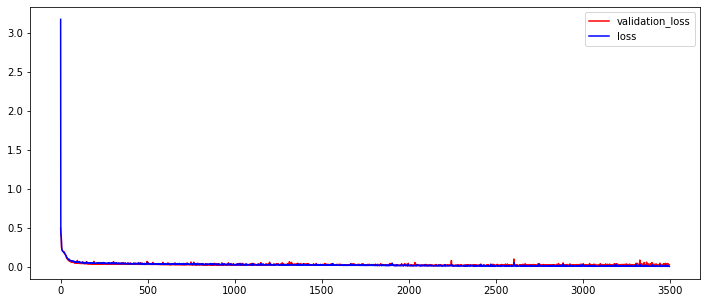

In [194]:
vloss = hist.history['val_loss']
loss = hist.history['loss']

plt.figure(figsize=(12,5))
epoch = np.arange(len(loss))
plt.plot(epoch, vloss, 'r', label='validation_loss')
plt.plot(epoch, loss,'b',label='loss')
plt.legend(loc='best')
plt.show()

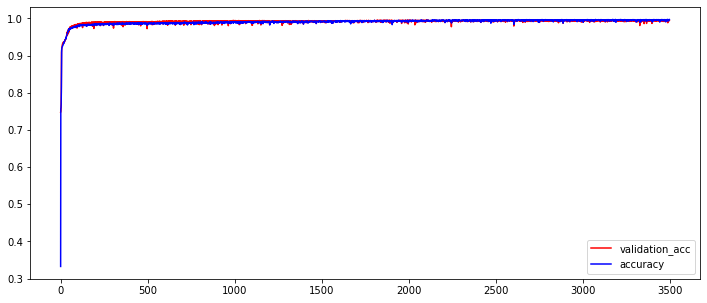

In [198]:
vacc = hist.history['val_accuracy']
acc = hist.history['accuracy']

plt.figure(figsize=(12,5))
epoch = np.arange(len(loss))
plt.plot(epoch, vacc, 'r', label='validation_acc')
plt.plot(epoch, acc,'b',label='accuracy')
plt.legend(loc='best')
plt.show()

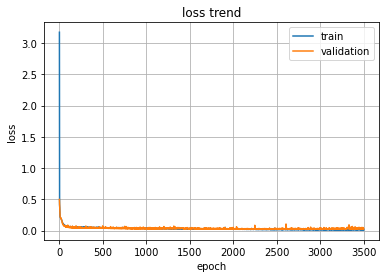

In [189]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('loss trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
early_stopping_callback = EarlyStoppong(monitor='val_loss',patience=100)
model.fit(X, Y, validation_split=0.33)

## 5.2 수행 2

In [203]:
seed=0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

model = Sequential()
model.add(Dense(units=30, input_dim=12, activation='relu'))
model.add(Dense(units=12, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
     optimizer='adam',
     metrics=['accuracy'])


MODEL_DIR = 'd:/Ai/WineModel'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelfile = MODEL_DIR+'wine_best.h5'
checkpointer = ModelCheckpoint(filepath=modelfile,
                              monitor='val_loss',verbose=0,
                              save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=1000)

hist = model.fit(x, y, validation_split=0.33, epochs=15000,verbose=0, batch_size=500,
                 callbacks=[early_stopping_callback, checkpointer])

204/204 [==============================] - 0s 462us/step - loss: 0.0380 - accuracy: 0.9894


0.9893797039985657

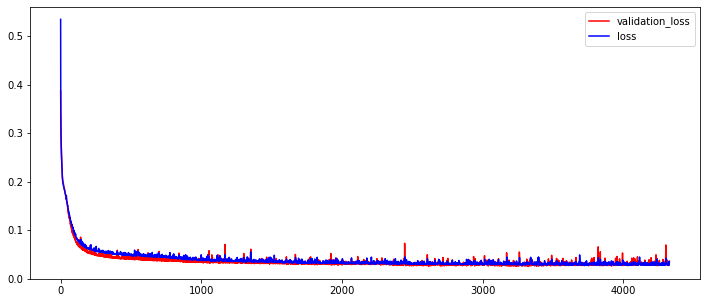

In [205]:
vloss = hist.history['val_loss']
loss = hist.history['loss']

plt.figure(figsize=(12,5))
epoch = np.arange(len(loss))
plt.plot(epoch, vloss, 'r', label='validation_loss')
plt.plot(epoch, loss,'b',label='loss')
plt.legend(loc='best')
plt.show()

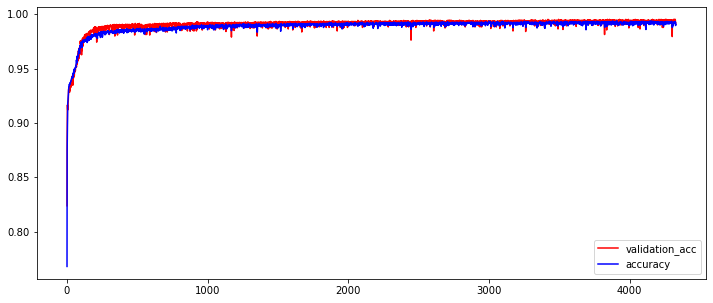

In [207]:
vacc = hist.history['val_accuracy']
acc = hist.history['accuracy']

plt.figure(figsize=(12,5))
epoch = np.arange(len(acc))
plt.plot(epoch, vacc, 'r', label='validation_acc')
plt.plot(epoch, acc,'b',label='accuracy')
plt.legend(loc='best')
plt.show()

In [212]:
from tensorflow.keras.models import load_model

opt_model = load_model("D:/Ai/WineModel/wine_best.h5")
print("Accuracy: %.4f" % (opt_model.evaluate(x,y)[1]))

204/204 [==============================] - 0s 538us/step - loss: 0.0276 - accuracy: 0.9928
Accuracy: 0.9928


# 6. MINIST Digits

In [ ]:
 minst.load_data()

In [267]:
from tensorflow.keras.datasets import mnist

(X_train, Y_train),(X_test, Y_test) = mnist.load_data()
    
print('학습셋 이미지: %d 개' % (X_train.shape[0]))
print('테스트셋 이미지: %d 개' % (X_test.shape[0]))    

학습셋 이미지: 60000 개
테스트셋 이미지: 10000 개


In [229]:
for x in X_train[0]:
    for i in x:
        print("%3d"%i,end='')
    print()


  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

TypeError: int() argument must be a string, a bytes-like object or a number, not 'tuple'

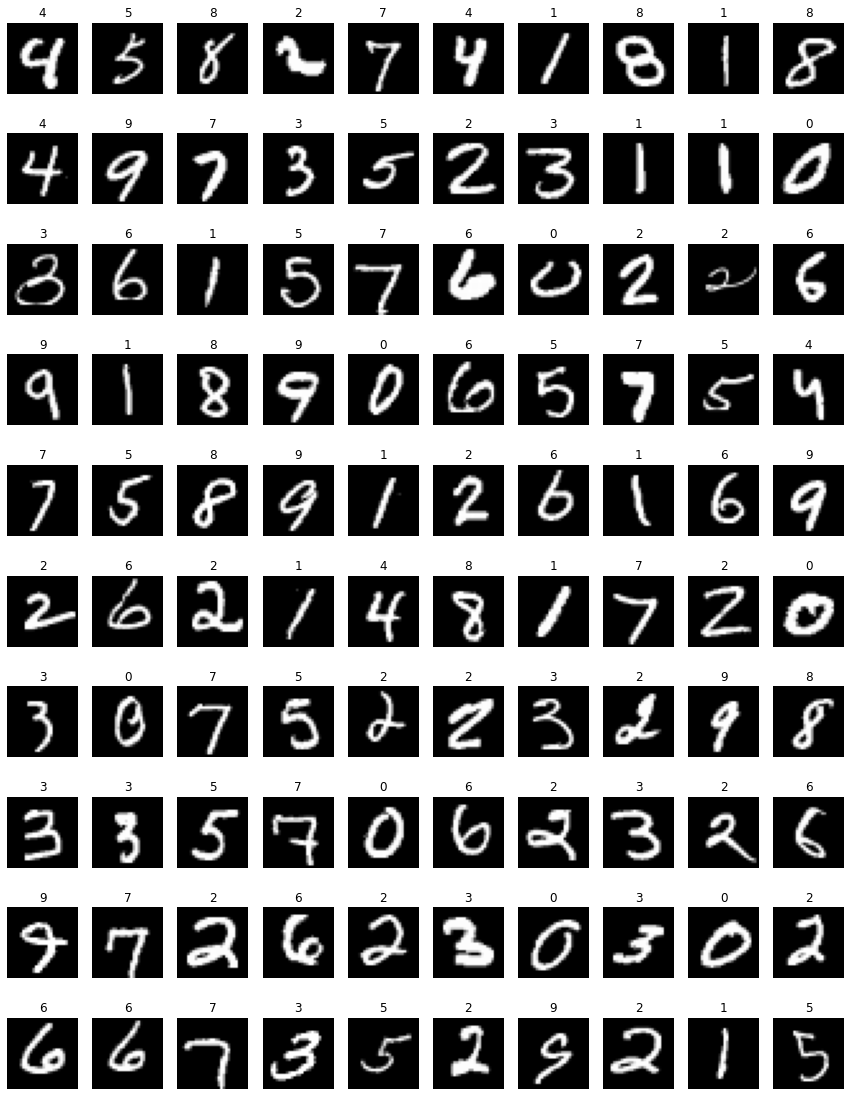

In [269]:
import random
n_samples=100
indices = random.sample(range(X_train.shape[0]), n_samples)

plt.figure(figsize=(15, 20))
for i, idx in enumerate(indices):
    plt.subplot(10,10, i+1)
    plt.imshow(X_train[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(Y_train[idx])
    plt.axis('off')
plt.show()

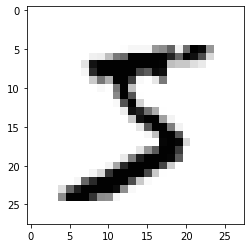

In [270]:
plt.imshow(x_train[0], cmap='Greys')
plt.show()

In [271]:
X_train = X_train.reshape(X_train.shape[0], 784)

In [272]:
X_train = X_train.astype('float64')/255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64')/255
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [273]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [274]:
seed = 0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

model = Sequential()
model.add(Dense(units=512, input_dim=784, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

MODEL_DIR = 'd:/Ai/MnistModel'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelfile = MODEL_DIR+'MNIST_digits_best_MLP.h5'
checkpointer = ModelCheckpoint(filepath=modelfile,
                              monitor='val_loss',verbose=0,
                              save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10)

hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size = 200,verbose=1,
                 callbacks=[early_stopping_callback, checkpointer])

Epoch 1/50
300/300 [==============================] - 2s 5ms/step - loss: 0.3043 - accuracy: 0.9152 - val_loss: 0.1530 - val_accuracy: 0.9575
Epoch 2/50
300/300 [==============================] - 1s 4ms/step - loss: 0.1263 - accuracy: 0.9635 - val_loss: 0.1056 - val_accuracy: 0.9684
Epoch 3/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0827 - accuracy: 0.9760 - val_loss: 0.0817 - val_accuracy: 0.9748
Epoch 4/50
300/300 [==============================] - 2s 6ms/step - loss: 0.0599 - accuracy: 0.9823 - val_loss: 0.0756 - val_accuracy: 0.9770
Epoch 5/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0463 - accuracy: 0.9866 - val_loss: 0.0677 - val_accuracy: 0.9794
Epoch 6/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0349 - accuracy: 0.9899 - val_loss: 0.0678 - val_accuracy: 0.9783
Epoch 7/50
300/300 [==============================] - 1s 5ms/step - loss: 0.0262 - accuracy: 0.9934 - val_loss: 0.0612 - val_accuracy: 0.9820
Epoch 

In [275]:
print('Training Accuracy', model.evaluate(X_train, Y_train)[1])
print('Test Accuracy', model.evaluate(X_test, Y_test)[1])

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0033 - accuracy: 0.9994: 0s - loss: 0.0034 - accuracy: 0.
Training Accuracy 0.9994333386421204
313/313 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.9819
Test Accuracy 0.9818999767303467


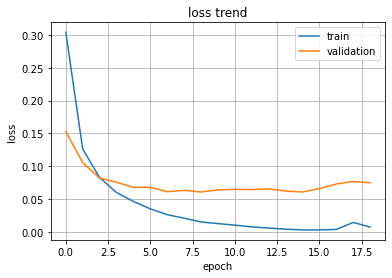

In [276]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('loss trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

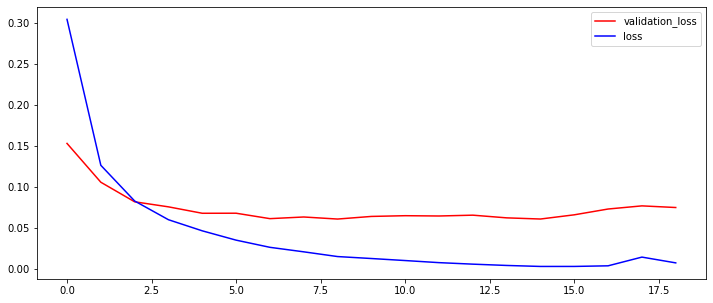

In [277]:
vloss = hist.history['val_loss']
loss = hist.history['loss']

plt.figure(figsize=(12,5))
epoch = np.arange(len(loss))
plt.plot(epoch, vloss, 'r', label='validation_loss')
plt.plot(epoch, loss,'b',label='loss')
plt.legend(loc='best')
plt.show()

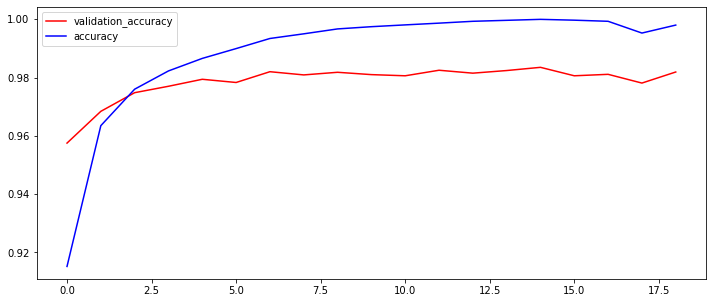

In [278]:
vloss = hist.history['val_accuracy']
loss = hist.history['accuracy']

plt.figure(figsize=(12,5))
epoch = np.arange(len(loss))
plt.plot(epoch, vloss, 'r', label='validation_accuracy')
plt.plot(epoch, loss,'b',label='accuracy')
plt.legend(loc='best')
plt.show()

In [289]:
from tensorflow.keras.models import load_model
opt_model = load_model("d:/Ai/MnistModel/MnistModelMNIST_digits_best_MLP.h5")

def model_evaluate(model, X, Y):
    ypred = model.predict(X) #(데이터 개수, 10)
    ypred = np.argmax(ypred, axis=1)#(데이터 개수, 1)
    return (Y==ypred).sum() / Y.shape[0]

model_evaluate(opt_model,X_train, Y_train)
model_evaluate(opt_model,X_test, Y_test)

0.9818

In [287]:
X.shape

(208, 60)

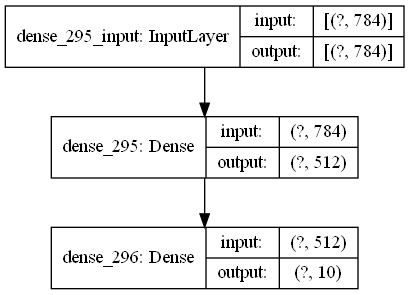

In [290]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='D:Ai/MnistModel/Digits_MLP_shapes.png', show_shapes=True)

# 7. Fashion MNIST

In [291]:
from IPython.display import Image # 28*28
Image(url="https://tensorflow.org/images/fashion-mnist-sprite.png")

In [292]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [303]:
from tensorflow.keras.datasets.fashion_mnist import load_data

(train_images, train_labels),(test_images, test_labels) = load_data()

In [294]:
from tensorflow.keras.layers import Flatten

In [301]:
train_images

NameError: name 'train_imagede' is not defined

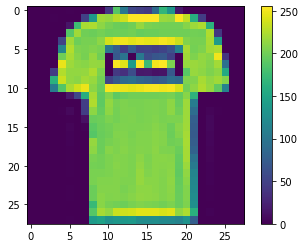

In [308]:
plt.figure()
plt.imshow(train_images[1])
plt.grid(False)
plt.colorbar()
plt.show()

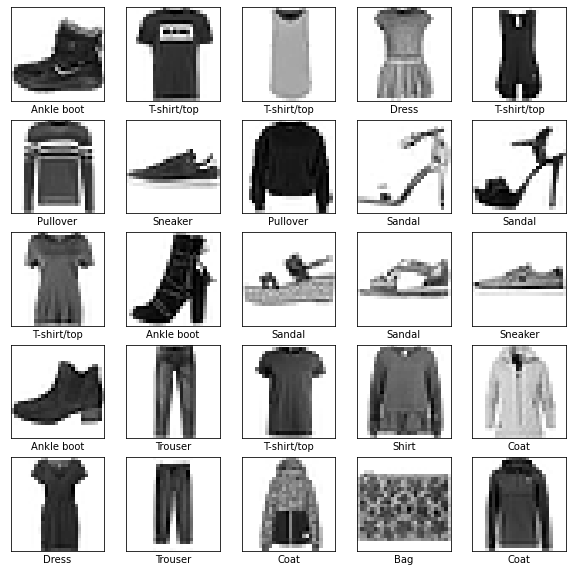

In [312]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [315]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [317]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(train_labels)
Y_test = to_categorical(test_labels)

In [318]:
Y_test[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [319]:
from tensorflow.keras.layers import Flatten

In [324]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_images, Y_train, epochs=5)

print(model.evaluate(train_images, Y_train)[1])
print(model.evaluate(test_images, Y_test)[1])

Epoch 1/5
1875/1875 [==============================] - 2s 926us/step - loss: 1.0893 - accuracy: 0.6632
Epoch 2/5
1875/1875 [==============================] - 2s 926us/step - loss: 0.6390 - accuracy: 0.7701
Epoch 3/5
1875/1875 [==============================] - 2s 979us/step - loss: 0.5636 - accuracy: 0.7975
Epoch 4/5
1875/1875 [==============================] - 2s 933us/step - loss: 0.5219 - accuracy: 0.8155
Epoch 5/5
1875/1875 [==============================] - 1s 679us/step - loss: 0.4846 - accuracy: 0.8294
0.8293833136558533
313/313 [==============================] - 0s 943us/step - loss: 0.5111 - accuracy: 0.8158
0.8158000111579895


In [323]:
pred = model.predict(test_images)
pred[0]

array([1.4609517e-06, 5.1987243e-08, 1.0743374e-05, 4.4179151e-06,
       1.5244720e-05, 1.7810862e-01, 1.9983692e-05, 3.4302732e-01,
       6.9801682e-03, 4.7183207e-01], dtype=float32)

In [325]:
np.argmax(pred[:30],axis=1)

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 2, 5, 5, 3, 4, 1, 2, 6, 8, 0, 0, 7,
       7, 7, 1, 2, 6, 3, 9, 3], dtype=int64)

In [326]:
test_labels[:30]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 9, 1, 4, 6, 0, 9, 3], dtype=uint8)

In [ ]:
#쉬는시간 주세요 교수님

In [327]:
def plot_image(i, pred_arr, true_label, img):
    pred_arr, true_label, img = pred_arr[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    pred_label = np.argmax(pred_arr)
    if pred_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[pred_label],
                                100*np.max(pred_arr),
                                class_names[true_label]),
                                color=color)

In [342]:
def plot_value_array(i, pred_arr, true_label):
    pred_arr, true_label = pred_arr[i], true_label[i]
    plt.grid(False)
    plt.yticks([])
    thisplot = plt.bar(range(10), pred_arr, color="#777777")
    plt.ylim([0, 1])
    pred_label = np.argmax(pred_arr)
    
    thisplot[pred_label].set_color('red')
    thisplot[true_label].set_color('blue')

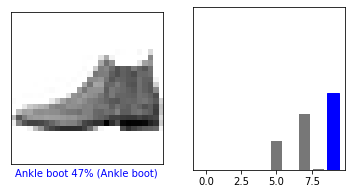

In [343]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, pred, test_labels)
plt.show()

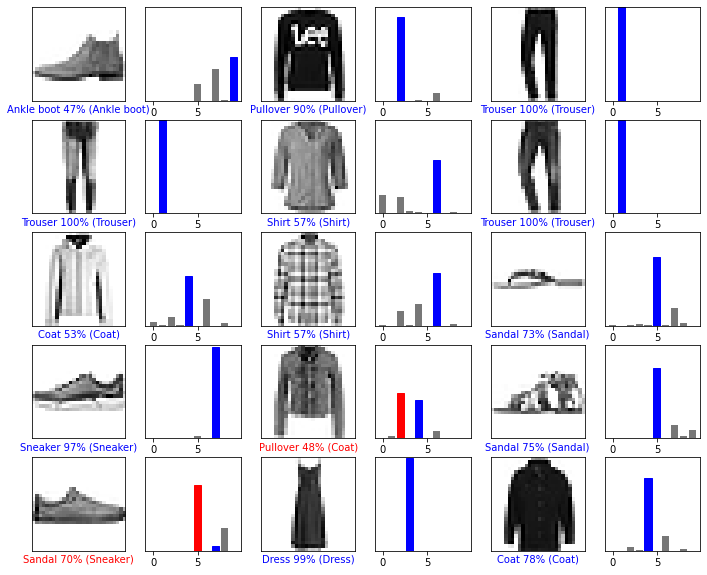

In [346]:
# 올바른 예측은 파랑색, 잘못된 예측은 빨강색 안해
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred, test_labels)
plt.show()

# 8. 보스턴 집값 예측

In [347]:
from sklearn.datasets import load_boston
b_house = load_boston()

In [348]:
house = pd.DataFrame(b_house.data, columns=b_house.feature_names)
house['Price'] = pd.Series(b_house.target)
house.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [349]:
house.to_csv('D:Ai/House')

In [350]:
X = house.to_numpy()[:, :-1]
Y = house.to_numpy()[:, [-1]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                   random_state=0)

In [355]:
X.shape, X_test.shape

((506, 13), (152, 13))

In [358]:
from sklearn.metrics import mean_squared_error

In [364]:
%%time
seed=0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)
model = Sequential()
model.add(Dense(units=1, input_dim=13))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train, Y_train, epochs=200000, verbose=0)

print(model.weights)
Y_pred = model.predict(X_train).flatten()
print('Train MSE = ', mean_squared_error(Y_train.flatten(), Y_pred))

Y_pred = model.predict(X_test).flatten()
print('Train MSE = ', mean_squared_error(Y_test.flatten(), Y_pred))

[<tf.Variable 'dense_303/kernel:0' shape=(13, 1) dtype=float32, numpy=
array([[-1.2488449e-01],
       [ 4.1898821e-02],
       [ 1.1309659e-02],
       [ 2.5071719e+00],
       [-1.4851009e+01],
       [ 4.0079670e+00],
       [-9.7904988e-03],
       [-1.4777116e+00],
       [ 2.2912925e-01],
       [-1.0220862e-02],
       [-9.7695410e-01],
       [ 6.3449503e-03],
       [-4.7988757e-01]], dtype=float32)>, <tf.Variable 'dense_303/bias:0' shape=(1,) dtype=float32, numpy=array([35.332264], dtype=float32)>]
Train MSE =  20.02151178126192
Train MSE =  27.08347594299902
CPU times: total: 21min 21s
Wall time: 12min 37s


In [365]:
%%time
for epoch in range(300_000, 1_000_001, 100_000):
    print('===== Epochs:', epoch, '=====')
    model.fit(X_train, Y_train, epochs=1000000, verbose=0)
    print(model.weigths)
    
    Y_pred = model.predict(X_train).flatten()
    print('Train MSE = ', mean_squared_error(Y_train.flatten(), Y_pred))

    Y_pred = model.predict(X_test).flatten()
    print('Train MSE = ', mean_squared_error(Y_test.flatten(), Y_pred))

===== Epochs: 300000 =====


KeyboardInterrupt: 

In [368]:
Y_pred = model.predict(X_train).flatten()
Y_true = Y_train.flatten()
for i in range (10):
    print('실제가격:',Y_true[i], 't\예상가격: ',Y_pred[i])

실제가격: 14.4 t\예상가격:  4.219288
실제가격: 24.4 t\예상가격:  28.262054
실제가격: 18.1 t\예상가격:  16.969337
실제가격: 22.5 t\예상가격:  28.837294
실제가격: 20.5 t\예상가격:  20.401012
실제가격: 15.2 t\예상가격:  15.645901
실제가격: 17.4 t\예상가격:  17.490677
실제가격: 13.6 t\예상가격:  12.349134
실제가격: 8.7 t\예상가격:  8.397625
실제가격: 18.2 t\예상가격:  18.907982


In [ ]:
#한나꺼 보기

In [369]:
model.weights

[<tf.Variable 'dense_303/kernel:0' shape=(13, 1) dtype=float32, numpy=
 array([[-1.2576394e-01],
        [ 3.6831159e-02],
        [ 5.3880038e-03],
        [ 2.4654827e+00],
        [-1.6227863e+01],
        [ 3.8642724e+00],
        [-1.1534394e-02],
        [-1.4982544e+00],
        [ 2.4365216e-01],
        [-1.1907584e-02],
        [-1.0121981e+00],
        [ 7.5650243e-03],
        [-4.8893294e-01]], dtype=float32)>,
 <tf.Variable 'dense_303/bias:0' shape=(1,) dtype=float32, numpy=array([37.85683], dtype=float32)>]

In [371]:
seed = 0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

model = Sequential()
model.add(Dense(units=32, input_dim=13, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1))#회귀모델은 출력함수 없음

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, Y_train, epochs=20000)

Epoch 1/20000
12/12 [==============================] - 0s 911us/step - loss: 345.0302
Epoch 2/20000
12/12 [==============================] - 0s 834us/step - loss: 97.7757
Epoch 3/20000
12/12 [==============================] - 0s 833us/step - loss: 88.6333
Epoch 4/20000
12/12 [==============================] - 0s 833us/step - loss: 74.8684
Epoch 5/20000
12/12 [==============================] - 0s 667us/step - loss: 71.8237
Epoch 6/20000
12/12 [==============================] - 0s 750us/step - loss: 67.5272
Epoch 7/20000
12/12 [==============================] - 0s 665us/step - loss: 66.3939
Epoch 8/20000
12/12 [==============================] - 0s 752us/step - loss: 63.9375
Epoch 9/20000
12/12 [==============================] - 0s 583us/step - loss: 61.9313
Epoch 10/20000
12/12 [==============================] - 0s 1000us/step - loss: 61.1082
Epoch 11/20000
12/12 [==============================] - 0s 667us/step - loss: 59.7003
Epoch 12/20000
12/12 [==============================] - 0s 66

12/12 [==============================] - 0s 667us/step - loss: 17.9720
Epoch 191/20000
12/12 [==============================] - 0s 583us/step - loss: 20.3598
Epoch 192/20000
12/12 [==============================] - 0s 666us/step - loss: 22.3167
Epoch 193/20000
12/12 [==============================] - 0s 667us/step - loss: 18.1542
Epoch 194/20000
12/12 [==============================] - 0s 583us/step - loss: 16.9967
Epoch 195/20000
12/12 [==============================] - 0s 833us/step - loss: 24.8995
Epoch 196/20000
12/12 [==============================] - 0s 667us/step - loss: 18.4860
Epoch 197/20000
12/12 [==============================] - 0s 750us/step - loss: 17.9726
Epoch 198/20000
12/12 [==============================] - 0s 667us/step - loss: 16.9657
Epoch 199/20000
12/12 [==============================] - 0s 667us/step - loss: 16.6363
Epoch 200/20000
12/12 [==============================] - 0s 667us/step - loss: 18.1053
Epoch 201/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 750us/step - loss: 13.8911
Epoch 285/20000
12/12 [==============================] - 0s 667us/step - loss: 14.5331
Epoch 286/20000
12/12 [==============================] - 0s 834us/step - loss: 13.9705
Epoch 287/20000
12/12 [==============================] - 0s 667us/step - loss: 13.8211
Epoch 288/20000
12/12 [==============================] - 0s 833us/step - loss: 14.1928
Epoch 289/20000
12/12 [==============================] - 0s 750us/step - loss: 16.8947
Epoch 290/20000
12/12 [==============================] - 0s 917us/step - loss: 15.9010
Epoch 291/20000
12/12 [==============================] - 0s 750us/step - loss: 14.2859
Epoch 292/20000
12/12 [==============================] - 0s 833us/step - loss: 13.8975
Epoch 293/20000
12/12 [==============================] - 0s 750us/step - loss: 13.5862
Epoch 294/20000
12/12 [==============================] - 0s 750us/step - loss: 13.5219
Epoch 295/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 667us/step - loss: 20.9911
Epoch 473/20000
12/12 [==============================] - 0s 833us/step - loss: 14.4303
Epoch 474/20000
12/12 [==============================] - 0s 750us/step - loss: 13.3895
Epoch 475/20000
12/12 [==============================] - 0s 667us/step - loss: 13.0987
Epoch 476/20000
12/12 [==============================] - 0s 750us/step - loss: 12.3215
Epoch 477/20000
12/12 [==============================] - 0s 668us/step - loss: 13.8517
Epoch 478/20000
12/12 [==============================] - 0s 750us/step - loss: 12.0230
Epoch 479/20000
12/12 [==============================] - 0s 833us/step - loss: 11.5090
Epoch 480/20000
12/12 [==============================] - 0s 750us/step - loss: 11.7883
Epoch 481/20000
12/12 [==============================] - 0s 833us/step - loss: 11.6651
Epoch 482/20000
12/12 [==============================] - 0s 667us/step - loss: 13.9556
Epoch 483/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 667us/step - loss: 11.0405
Epoch 661/20000
12/12 [==============================] - 0s 583us/step - loss: 12.8799
Epoch 662/20000
12/12 [==============================] - 0s 750us/step - loss: 19.0487
Epoch 663/20000
12/12 [==============================] - 0s 583us/step - loss: 11.8630
Epoch 664/20000
12/12 [==============================] - 0s 834us/step - loss: 10.6518
Epoch 665/20000
12/12 [==============================] - 0s 583us/step - loss: 10.5122
Epoch 666/20000
12/12 [==============================] - 0s 583us/step - loss: 16.8039
Epoch 667/20000
12/12 [==============================] - 0s 750us/step - loss: 10.7914
Epoch 668/20000
12/12 [==============================] - 0s 667us/step - loss: 11.7564
Epoch 669/20000
12/12 [==============================] - 0s 583us/step - loss: 11.3732
Epoch 670/20000
12/12 [==============================] - 0s 750us/step - loss: 11.1285
Epoch 671/20000
12/12 [==============================] - 0s

Epoch 754/20000
12/12 [==============================] - 0s 667us/step - loss: 13.2313
Epoch 755/20000
12/12 [==============================] - 0s 666us/step - loss: 10.5329
Epoch 756/20000
12/12 [==============================] - 0s 750us/step - loss: 12.2187
Epoch 757/20000
12/12 [==============================] - 0s 667us/step - loss: 9.6212
Epoch 758/20000
12/12 [==============================] - 0s 667us/step - loss: 9.8609
Epoch 759/20000
12/12 [==============================] - 0s 582us/step - loss: 9.6020
Epoch 760/20000
12/12 [==============================] - 0s 667us/step - loss: 11.0127
Epoch 761/20000
12/12 [==============================] - 0s 583us/step - loss: 10.5493
Epoch 762/20000
12/12 [==============================] - 0s 750us/step - loss: 9.6159
Epoch 763/20000
12/12 [==============================] - 0s 667us/step - loss: 10.2892
Epoch 764/20000
12/12 [==============================] - 0s 667us/step - loss: 9.4762
Epoch 765/20000
12/12 [=========================

12/12 [==============================] - 0s 750us/step - loss: 9.8775
Epoch 943/20000
12/12 [==============================] - 0s 666us/step - loss: 9.6786
Epoch 944/20000
12/12 [==============================] - 0s 750us/step - loss: 8.4857
Epoch 945/20000
12/12 [==============================] - 0s 667us/step - loss: 9.0706
Epoch 946/20000
12/12 [==============================] - 0s 750us/step - loss: 10.5814
Epoch 947/20000
12/12 [==============================] - 0s 668us/step - loss: 8.9251
Epoch 948/20000
12/12 [==============================] - 0s 667us/step - loss: 8.4829
Epoch 949/20000
12/12 [==============================] - 0s 583us/step - loss: 7.9173
Epoch 950/20000
12/12 [==============================] - 0s 667us/step - loss: 9.6394
Epoch 951/20000
12/12 [==============================] - 0s 666us/step - loss: 9.0962
Epoch 952/20000
12/12 [==============================] - 0s 750us/step - loss: 8.3293
Epoch 953/20000
12/12 [==============================] - 0s 669us/ste

12/12 [==============================] - 0s 750us/step - loss: 16.1812
Epoch 1131/20000
12/12 [==============================] - 0s 583us/step - loss: 12.9336
Epoch 1132/20000
12/12 [==============================] - 0s 666us/step - loss: 11.9296
Epoch 1133/20000
12/12 [==============================] - 0s 667us/step - loss: 11.1852
Epoch 1134/20000
12/12 [==============================] - 0s 667us/step - loss: 11.0274
Epoch 1135/20000
12/12 [==============================] - 0s 667us/step - loss: 10.3106
Epoch 1136/20000
12/12 [==============================] - 0s 583us/step - loss: 9.9879
Epoch 1137/20000
12/12 [==============================] - 0s 667us/step - loss: 10.1353
Epoch 1138/20000
12/12 [==============================] - 0s 667us/step - loss: 12.2854
Epoch 1139/20000
12/12 [==============================] - 0s 583us/step - loss: 9.7963
Epoch 1140/20000
12/12 [==============================] - 0s 750us/step - loss: 8.9075
Epoch 1141/20000
12/12 [============================

12/12 [==============================] - 0s 668us/step - loss: 6.8071
Epoch 1318/20000
12/12 [==============================] - 0s 667us/step - loss: 6.9699
Epoch 1319/20000
12/12 [==============================] - 0s 833us/step - loss: 7.8320
Epoch 1320/20000
12/12 [==============================] - 0s 667us/step - loss: 6.8969
Epoch 1321/20000
12/12 [==============================] - 0s 748us/step - loss: 6.7962
Epoch 1322/20000
12/12 [==============================] - 0s 583us/step - loss: 6.5830
Epoch 1323/20000
12/12 [==============================] - 0s 666us/step - loss: 6.7565
Epoch 1324/20000
12/12 [==============================] - 0s 750us/step - loss: 6.5931
Epoch 1325/20000
12/12 [==============================] - 0s 594us/step - loss: 6.4996
Epoch 1326/20000
12/12 [==============================] - 0s 666us/step - loss: 6.5674
Epoch 1327/20000
12/12 [==============================] - 0s 750us/step - loss: 7.1799
Epoch 1328/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 750us/step - loss: 6.1432
Epoch 1506/20000
12/12 [==============================] - 0s 750us/step - loss: 10.3750
Epoch 1507/20000
12/12 [==============================] - 0s 750us/step - loss: 7.4677
Epoch 1508/20000
12/12 [==============================] - 0s 703us/step - loss: 7.0004
Epoch 1509/20000
12/12 [==============================] - 0s 629us/step - loss: 7.4174
Epoch 1510/20000
12/12 [==============================] - 0s 667us/step - loss: 7.2057
Epoch 1511/20000
12/12 [==============================] - 0s 583us/step - loss: 6.5217
Epoch 1512/20000
12/12 [==============================] - 0s 583us/step - loss: 6.6246
Epoch 1513/20000
12/12 [==============================] - 0s 667us/step - loss: 7.1370
Epoch 1514/20000
12/12 [==============================] - 0s 500us/step - loss: 7.3742
Epoch 1515/20000
12/12 [==============================] - 0s 750us/step - loss: 7.0482
Epoch 1516/20000
12/12 [==============================] - 0

12/12 [==============================] - 0s 750us/step - loss: 5.8326
Epoch 1693/20000
12/12 [==============================] - 0s 750us/step - loss: 5.9500
Epoch 1694/20000
12/12 [==============================] - 0s 583us/step - loss: 5.8475
Epoch 1695/20000
12/12 [==============================] - 0s 584us/step - loss: 6.0556
Epoch 1696/20000
12/12 [==============================] - 0s 750us/step - loss: 6.1188
Epoch 1697/20000
12/12 [==============================] - 0s 583us/step - loss: 6.7768
Epoch 1698/20000
12/12 [==============================] - 0s 583us/step - loss: 6.4881
Epoch 1699/20000
12/12 [==============================] - 0s 584us/step - loss: 5.8737
Epoch 1700/20000
12/12 [==============================] - 0s 667us/step - loss: 5.9067
Epoch 1701/20000
12/12 [==============================] - 0s 583us/step - loss: 5.8611
Epoch 1702/20000
12/12 [==============================] - 0s 583us/step - loss: 6.2051
Epoch 1703/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 750us/step - loss: 7.6708
Epoch 1880/20000
12/12 [==============================] - 0s 667us/step - loss: 8.2008
Epoch 1881/20000
12/12 [==============================] - 0s 667us/step - loss: 6.6512
Epoch 1882/20000
12/12 [==============================] - 0s 667us/step - loss: 5.5131
Epoch 1883/20000
12/12 [==============================] - 0s 667us/step - loss: 6.6319
Epoch 1884/20000
12/12 [==============================] - 0s 667us/step - loss: 5.1400
Epoch 1885/20000
12/12 [==============================] - 0s 667us/step - loss: 5.3342
Epoch 1886/20000
12/12 [==============================] - 0s 583us/step - loss: 9.9142
Epoch 1887/20000
12/12 [==============================] - 0s 667us/step - loss: 21.2322
Epoch 1888/20000
12/12 [==============================] - 0s 667us/step - loss: 12.3698
Epoch 1889/20000
12/12 [==============================] - 0s 750us/step - loss: 11.2830
Epoch 1890/20000
12/12 [==============================] -

12/12 [==============================] - 0s 833us/step - loss: 5.3253
Epoch 1974/20000
12/12 [==============================] - 0s 751us/step - loss: 6.1559
Epoch 1975/20000
12/12 [==============================] - 0s 849us/step - loss: 5.9426
Epoch 1976/20000
12/12 [==============================] - 0s 916us/step - loss: 6.2311
Epoch 1977/20000
12/12 [==============================] - 0s 705us/step - loss: 5.2722
Epoch 1978/20000
12/12 [==============================] - 0s 833us/step - loss: 7.2946
Epoch 1979/20000
12/12 [==============================] - 0s 666us/step - loss: 6.9123
Epoch 1980/20000
12/12 [==============================] - 0s 665us/step - loss: 8.3367
Epoch 1981/20000
12/12 [==============================] - 0s 2ms/step - loss: 6.4705
Epoch 1982/20000
12/12 [==============================] - 0s 667us/step - loss: 6.7885
Epoch 1983/20000
12/12 [==============================] - 0s 583us/step - loss: 7.3459
Epoch 1984/20000
12/12 [==============================] - 0s 7

12/12 [==============================] - 0s 666us/step - loss: 4.8672
Epoch 2162/20000
12/12 [==============================] - 0s 583us/step - loss: 5.1239
Epoch 2163/20000
12/12 [==============================] - 0s 667us/step - loss: 5.2061
Epoch 2164/20000
12/12 [==============================] - 0s 669us/step - loss: 5.6943
Epoch 2165/20000
12/12 [==============================] - 0s 583us/step - loss: 6.1687
Epoch 2166/20000
12/12 [==============================] - 0s 667us/step - loss: 6.2519
Epoch 2167/20000
12/12 [==============================] - 0s 750us/step - loss: 6.7906
Epoch 2168/20000
12/12 [==============================] - 0s 583us/step - loss: 5.2392
Epoch 2169/20000
12/12 [==============================] - 0s 667us/step - loss: 5.5519
Epoch 2170/20000
12/12 [==============================] - 0s 750us/step - loss: 5.5793
Epoch 2171/20000
12/12 [==============================] - 0s 667us/step - loss: 5.2853
Epoch 2172/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 666us/step - loss: 7.0180
Epoch 2350/20000
12/12 [==============================] - 0s 708us/step - loss: 6.9798
Epoch 2351/20000
12/12 [==============================] - 0s 667us/step - loss: 9.0984
Epoch 2352/20000
12/12 [==============================] - 0s 583us/step - loss: 5.8218
Epoch 2353/20000
12/12 [==============================] - 0s 748us/step - loss: 4.7464
Epoch 2354/20000
12/12 [==============================] - 0s 557us/step - loss: 4.8277
Epoch 2355/20000
12/12 [==============================] - 0s 667us/step - loss: 5.0224
Epoch 2356/20000
12/12 [==============================] - 0s 667us/step - loss: 4.9552
Epoch 2357/20000
12/12 [==============================] - 0s 583us/step - loss: 4.8890
Epoch 2358/20000
12/12 [==============================] - 0s 583us/step - loss: 5.4143
Epoch 2359/20000
12/12 [==============================] - 0s 593us/step - loss: 4.6548
Epoch 2360/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 586us/step - loss: 4.4900
Epoch 2537/20000
12/12 [==============================] - 0s 581us/step - loss: 4.8791
Epoch 2538/20000
12/12 [==============================] - 0s 748us/step - loss: 4.8231
Epoch 2539/20000
12/12 [==============================] - 0s 583us/step - loss: 6.0647
Epoch 2540/20000
12/12 [==============================] - 0s 667us/step - loss: 5.7936
Epoch 2541/20000
12/12 [==============================] - 0s 583us/step - loss: 6.0663
Epoch 2542/20000
12/12 [==============================] - 0s 664us/step - loss: 4.6966
Epoch 2543/20000
12/12 [==============================] - 0s 746us/step - loss: 5.0080
Epoch 2544/20000
12/12 [==============================] - 0s 665us/step - loss: 4.8388
Epoch 2545/20000
12/12 [==============================] - 0s 667us/step - loss: 4.8342
Epoch 2546/20000
12/12 [==============================] - 0s 581us/step - loss: 4.2949
Epoch 2547/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 667us/step - loss: 5.8809
Epoch 2631/20000
12/12 [==============================] - 0s 667us/step - loss: 4.8321
Epoch 2632/20000
12/12 [==============================] - 0s 667us/step - loss: 6.5539
Epoch 2633/20000
12/12 [==============================] - 0s 667us/step - loss: 4.8297
Epoch 2634/20000
12/12 [==============================] - 0s 750us/step - loss: 4.3772
Epoch 2635/20000
12/12 [==============================] - 0s 667us/step - loss: 4.3522
Epoch 2636/20000
12/12 [==============================] - 0s 750us/step - loss: 4.6100
Epoch 2637/20000
12/12 [==============================] - 0s 667us/step - loss: 4.3278
Epoch 2638/20000
12/12 [==============================] - 0s 583us/step - loss: 4.3757
Epoch 2639/20000
12/12 [==============================] - 0s 667us/step - loss: 4.3191
Epoch 2640/20000
12/12 [==============================] - 0s 583us/step - loss: 4.6632
Epoch 2641/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 667us/step - loss: 4.8463
Epoch 2819/20000
12/12 [==============================] - 0s 667us/step - loss: 4.6274
Epoch 2820/20000
12/12 [==============================] - 0s 583us/step - loss: 4.1076
Epoch 2821/20000
12/12 [==============================] - 0s 750us/step - loss: 4.3451
Epoch 2822/20000
12/12 [==============================] - 0s 667us/step - loss: 4.4436
Epoch 2823/20000
12/12 [==============================] - 0s 583us/step - loss: 5.3121
Epoch 2824/20000
12/12 [==============================] - 0s 750us/step - loss: 4.3019
Epoch 2825/20000
12/12 [==============================] - 0s 583us/step - loss: 4.8543
Epoch 2826/20000
12/12 [==============================] - 0s 667us/step - loss: 4.2391
Epoch 2827/20000
12/12 [==============================] - 0s 667us/step - loss: 4.1329
Epoch 2828/20000
12/12 [==============================] - 0s 666us/step - loss: 4.6866
Epoch 2829/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 664us/step - loss: 3.9466
Epoch 3007/20000
12/12 [==============================] - 0s 752us/step - loss: 4.2837
Epoch 3008/20000
12/12 [==============================] - 0s 583us/step - loss: 4.5432
Epoch 3009/20000
12/12 [==============================] - 0s 666us/step - loss: 5.3034
Epoch 3010/20000
12/12 [==============================] - 0s 667us/step - loss: 5.3623
Epoch 3011/20000
12/12 [==============================] - 0s 665us/step - loss: 4.6327
Epoch 3012/20000
12/12 [==============================] - 0s 667us/step - loss: 4.7954
Epoch 3013/20000
12/12 [==============================] - 0s 667us/step - loss: 4.4826
Epoch 3014/20000
12/12 [==============================] - 0s 664us/step - loss: 4.4895
Epoch 3015/20000
12/12 [==============================] - 0s 584us/step - loss: 6.4428
Epoch 3016/20000
12/12 [==============================] - 0s 583us/step - loss: 3.9933
Epoch 3017/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 583us/step - loss: 3.9100
Epoch 3194/20000
12/12 [==============================] - 0s 583us/step - loss: 3.9840
Epoch 3195/20000
12/12 [==============================] - 0s 583us/step - loss: 6.4536
Epoch 3196/20000
12/12 [==============================] - 0s 583us/step - loss: 4.7572
Epoch 3197/20000
12/12 [==============================] - 0s 583us/step - loss: 4.0886
Epoch 3198/20000
12/12 [==============================] - 0s 583us/step - loss: 3.5933
Epoch 3199/20000
12/12 [==============================] - 0s 666us/step - loss: 4.0439
Epoch 3200/20000
12/12 [==============================] - 0s 667us/step - loss: 4.3018
Epoch 3201/20000
12/12 [==============================] - 0s 582us/step - loss: 4.7428
Epoch 3202/20000
12/12 [==============================] - 0s 583us/step - loss: 5.6291
Epoch 3203/20000
12/12 [==============================] - 0s 583us/step - loss: 4.5502
Epoch 3204/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 667us/step - loss: 4.3799
Epoch 3382/20000
12/12 [==============================] - 0s 583us/step - loss: 4.0695
Epoch 3383/20000
12/12 [==============================] - 0s 583us/step - loss: 3.5290
Epoch 3384/20000
12/12 [==============================] - 0s 584us/step - loss: 4.8284
Epoch 3385/20000
12/12 [==============================] - 0s 583us/step - loss: 5.5168
Epoch 3386/20000
12/12 [==============================] - 0s 583us/step - loss: 4.5194
Epoch 3387/20000
12/12 [==============================] - 0s 750us/step - loss: 4.4348
Epoch 3388/20000
12/12 [==============================] - 0s 583us/step - loss: 4.7267
Epoch 3389/20000
12/12 [==============================] - 0s 583us/step - loss: 5.3149
Epoch 3390/20000
12/12 [==============================] - 0s 666us/step - loss: 4.4763
Epoch 3391/20000
12/12 [==============================] - 0s 583us/step - loss: 4.8900
Epoch 3392/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 667us/step - loss: 4.2778
Epoch 3570/20000
12/12 [==============================] - 0s 750us/step - loss: 3.8252
Epoch 3571/20000
12/12 [==============================] - 0s 667us/step - loss: 3.4963
Epoch 3572/20000
12/12 [==============================] - 0s 667us/step - loss: 3.2732
Epoch 3573/20000
12/12 [==============================] - 0s 667us/step - loss: 3.3089
Epoch 3574/20000
12/12 [==============================] - 0s 750us/step - loss: 3.7136
Epoch 3575/20000
12/12 [==============================] - 0s 666us/step - loss: 3.9014
Epoch 3576/20000
12/12 [==============================] - 0s 750us/step - loss: 4.2122
Epoch 3577/20000
12/12 [==============================] - 0s 667us/step - loss: 3.3907
Epoch 3578/20000
12/12 [==============================] - 0s 667us/step - loss: 3.6599
Epoch 3579/20000
12/12 [==============================] - 0s 667us/step - loss: 4.0725
Epoch 3580/20000
12/12 [==============================] - ET

12/12 [==============================] - 0s 583us/step - loss: 3.6410
Epoch 3664/20000
12/12 [==============================] - 0s 667us/step - loss: 3.9525
Epoch 3665/20000
12/12 [==============================] - 0s 584us/step - loss: 3.1652
Epoch 3666/20000
12/12 [==============================] - 0s 666us/step - loss: 3.3206
Epoch 3667/20000
12/12 [==============================] - 0s 666us/step - loss: 3.3007
Epoch 3668/20000
12/12 [==============================] - 0s 667us/step - loss: 4.7780
Epoch 3669/20000
12/12 [==============================] - 0s 750us/step - loss: 3.9120
Epoch 3670/20000
12/12 [==============================] - 0s 666us/step - loss: 4.2760
Epoch 3671/20000
12/12 [==============================] - 0s 667us/step - loss: 3.5827
Epoch 3672/20000
12/12 [==============================] - 0s 750us/step - loss: 3.1817
Epoch 3673/20000
12/12 [==============================] - 0s 667us/step - loss: 3.9543
Epoch 3674/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 584us/step - loss: 3.6820
Epoch 3852/20000
12/12 [==============================] - 0s 500us/step - loss: 3.7595
Epoch 3853/20000
12/12 [==============================] - 0s 583us/step - loss: 3.4130
Epoch 3854/20000
12/12 [==============================] - 0s 584us/step - loss: 3.7118
Epoch 3855/20000
12/12 [==============================] - 0s 664us/step - loss: 3.7242
Epoch 3856/20000
12/12 [==============================] - 0s 583us/step - loss: 3.4450
Epoch 3857/20000
12/12 [==============================] - 0s 667us/step - loss: 4.1111
Epoch 3858/20000
12/12 [==============================] - 0s 583us/step - loss: 4.0230
Epoch 3859/20000
12/12 [==============================] - 0s 584us/step - loss: 3.2201
Epoch 3860/20000
12/12 [==============================] - 0s 667us/step - loss: 3.3458
Epoch 3861/20000
12/12 [==============================] - 0s 581us/step - loss: 3.3732
Epoch 3862/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 701us/step - loss: 3.7988
Epoch 3946/20000
12/12 [==============================] - 0s 586us/step - loss: 3.7594
Epoch 3947/20000
12/12 [==============================] - 0s 666us/step - loss: 3.5270
Epoch 3948/20000
12/12 [==============================] - 0s 713us/step - loss: 3.0183
Epoch 3949/20000
12/12 [==============================] - 0s 665us/step - loss: 3.4734
Epoch 3950/20000
12/12 [==============================] - 0s 583us/step - loss: 3.3434
Epoch 3951/20000
12/12 [==============================] - 0s 667us/step - loss: 3.2437
Epoch 3952/20000
12/12 [==============================] - 0s 663us/step - loss: 3.1113
Epoch 3953/20000
12/12 [==============================] - 0s 581us/step - loss: 3.7111
Epoch 3954/20000
12/12 [==============================] - 0s 583us/step - loss: 4.9587
Epoch 3955/20000
12/12 [==============================] - 0s 666us/step - loss: 4.0893
Epoch 3956/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 667us/step - loss: 4.3808
Epoch 4040/20000
12/12 [==============================] - 0s 667us/step - loss: 3.5097
Epoch 4041/20000
12/12 [==============================] - 0s 585us/step - loss: 4.5321
Epoch 4042/20000
12/12 [==============================] - 0s 500us/step - loss: 3.2205
Epoch 4043/20000
12/12 [==============================] - 0s 583us/step - loss: 3.0954
Epoch 4044/20000
12/12 [==============================] - 0s 669us/step - loss: 2.9684
Epoch 4045/20000
12/12 [==============================] - 0s 583us/step - loss: 4.3170
Epoch 4046/20000
12/12 [==============================] - 0s 583us/step - loss: 2.8605
Epoch 4047/20000
12/12 [==============================] - 0s 583us/step - loss: 3.0522
Epoch 4048/20000
12/12 [==============================] - 0s 583us/step - loss: 3.4241
Epoch 4049/20000
12/12 [==============================] - 0s 583us/step - loss: 2.9088
Epoch 4050/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 667us/step - loss: 3.1026
Epoch 4227/20000
12/12 [==============================] - 0s 750us/step - loss: 3.1922
Epoch 4228/20000
12/12 [==============================] - 0s 583us/step - loss: 3.3757
Epoch 4229/20000
12/12 [==============================] - 0s 583us/step - loss: 3.2712
Epoch 4230/20000
12/12 [==============================] - 0s 750us/step - loss: 3.0171
Epoch 4231/20000
12/12 [==============================] - 0s 665us/step - loss: 2.7501
Epoch 4232/20000
12/12 [==============================] - 0s 667us/step - loss: 2.9131
Epoch 4233/20000
12/12 [==============================] - 0s 750us/step - loss: 3.1986
Epoch 4234/20000
12/12 [==============================] - 0s 583us/step - loss: 2.9211
Epoch 4235/20000
12/12 [==============================] - 0s 667us/step - loss: 4.0794
Epoch 4236/20000
12/12 [==============================] - 0s 583us/step - loss: 3.9494
Epoch 4237/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 669us/step - loss: 3.7493
Epoch 4415/20000
12/12 [==============================] - 0s 748us/step - loss: 2.7789
Epoch 4416/20000
12/12 [==============================] - 0s 666us/step - loss: 2.7484
Epoch 4417/20000
12/12 [==============================] - 0s 584us/step - loss: 3.7428
Epoch 4418/20000
12/12 [==============================] - 0s 667us/step - loss: 2.8500
Epoch 4419/20000
12/12 [==============================] - 0s 750us/step - loss: 2.7526
Epoch 4420/20000
12/12 [==============================] - 0s 667us/step - loss: 2.9538
Epoch 4421/20000
12/12 [==============================] - 0s 667us/step - loss: 3.1604
Epoch 4422/20000
12/12 [==============================] - 0s 666us/step - loss: 3.2307
Epoch 4423/20000
12/12 [==============================] - 0s 667us/step - loss: 3.6050
Epoch 4424/20000
12/12 [==============================] - 0s 667us/step - loss: 2.8326
Epoch 4425/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 583us/step - loss: 3.4134
Epoch 4509/20000
12/12 [==============================] - 0s 583us/step - loss: 3.0464
Epoch 4510/20000
12/12 [==============================] - 0s 586us/step - loss: 2.6209
Epoch 4511/20000
12/12 [==============================] - 0s 583us/step - loss: 3.0327
Epoch 4512/20000
12/12 [==============================] - 0s 583us/step - loss: 3.2033
Epoch 4513/20000
12/12 [==============================] - 0s 584us/step - loss: 2.9321
Epoch 4514/20000
12/12 [==============================] - 0s 666us/step - loss: 2.6447
Epoch 4515/20000
12/12 [==============================] - 0s 500us/step - loss: 3.1354
Epoch 4516/20000
12/12 [==============================] - 0s 583us/step - loss: 2.7946
Epoch 4517/20000
12/12 [==============================] - 0s 666us/step - loss: 2.4956
Epoch 4518/20000
12/12 [==============================] - 0s 581us/step - loss: 2.7629
Epoch 4519/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 665us/step - loss: 2.4686
Epoch 4697/20000
12/12 [==============================] - 0s 748us/step - loss: 2.7852
Epoch 4698/20000
12/12 [==============================] - ETA: 0s - loss: 2.053 - 0s 583us/step - loss: 3.8180
Epoch 4699/20000
12/12 [==============================] - 0s 664us/step - loss: 3.7693
Epoch 4700/20000
12/12 [==============================] - 0s 747us/step - loss: 2.8789
Epoch 4701/20000
12/12 [==============================] - 0s 664us/step - loss: 2.9240
Epoch 4702/20000
12/12 [==============================] - 0s 585us/step - loss: 3.1247
Epoch 4703/20000
12/12 [==============================] - 0s 667us/step - loss: 2.8347
Epoch 4704/20000
12/12 [==============================] - 0s 665us/step - loss: 2.3746
Epoch 4705/20000
12/12 [==============================] - 0s 583us/step - loss: 2.5991
Epoch 4706/20000
12/12 [==============================] - 0s 665us/step - loss: 2.5954
Epoch 4707/20000
12/12 [============

12/12 [==============================] - 0s 667us/step - loss: 3.2340
Epoch 4884/20000
12/12 [==============================] - 0s 583us/step - loss: 3.0264
Epoch 4885/20000
12/12 [==============================] - 0s 667us/step - loss: 2.7753
Epoch 4886/20000
12/12 [==============================] - 0s 667us/step - loss: 2.7834
Epoch 4887/20000
12/12 [==============================] - ETA: 0s - loss: 2.606 - 0s 666us/step - loss: 2.6390
Epoch 4888/20000
12/12 [==============================] - 0s 750us/step - loss: 3.2054
Epoch 4889/20000
12/12 [==============================] - 0s 581us/step - loss: 2.8370
Epoch 4890/20000
12/12 [==============================] - 0s 583us/step - loss: 2.6784
Epoch 4891/20000
12/12 [==============================] - 0s 583us/step - loss: 2.5342
Epoch 4892/20000
12/12 [==============================] - 0s 750us/step - loss: 2.3416
Epoch 4893/20000
12/12 [==============================] - 0s 665us/step - loss: 2.4361
Epoch 4894/20000
12/12 [============

12/12 [==============================] - 0s 667us/step - loss: 2.8218
Epoch 4978/20000
12/12 [==============================] - 0s 750us/step - loss: 2.4073
Epoch 4979/20000
12/12 [==============================] - 0s 583us/step - loss: 2.4140
Epoch 4980/20000
12/12 [==============================] - 0s 583us/step - loss: 2.5759
Epoch 4981/20000
12/12 [==============================] - 0s 585us/step - loss: 2.3261
Epoch 4982/20000
12/12 [==============================] - 0s 584us/step - loss: 2.7337
Epoch 4983/20000
12/12 [==============================] - 0s 586us/step - loss: 2.3614
Epoch 4984/20000
12/12 [==============================] - 0s 583us/step - loss: 2.3038
Epoch 4985/20000
12/12 [==============================] - 0s 583us/step - loss: 2.3278
Epoch 4986/20000
12/12 [==============================] - 0s 585us/step - loss: 2.4197
Epoch 4987/20000
12/12 [==============================] - 0s 500us/step - loss: 2.4529
Epoch 4988/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 667us/step - loss: 2.3853
Epoch 5072/20000
12/12 [==============================] - 0s 666us/step - loss: 2.4501
Epoch 5073/20000
12/12 [==============================] - 0s 750us/step - loss: 3.5138
Epoch 5074/20000
12/12 [==============================] - 0s 667us/step - loss: 3.2720
Epoch 5075/20000
12/12 [==============================] - 0s 664us/step - loss: 3.8617
Epoch 5076/20000
12/12 [==============================] - 0s 750us/step - loss: 2.7319
Epoch 5077/20000
12/12 [==============================] - 0s 750us/step - loss: 2.7130
Epoch 5078/20000
12/12 [==============================] - 0s 667us/step - loss: 2.5205
Epoch 5079/20000
12/12 [==============================] - 0s 750us/step - loss: 2.4359
Epoch 5080/20000
12/12 [==============================] - 0s 667us/step - loss: 2.6764
Epoch 5081/20000
12/12 [==============================] - 0s 666us/step - loss: 2.9495
Epoch 5082/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 750us/step - loss: 2.5015
Epoch 5166/20000
12/12 [==============================] - 0s 667us/step - loss: 2.4734
Epoch 5167/20000
12/12 [==============================] - 0s 667us/step - loss: 2.8515
Epoch 5168/20000
12/12 [==============================] - 0s 668us/step - loss: 2.5987
Epoch 5169/20000
12/12 [==============================] - 0s 666us/step - loss: 2.9111
Epoch 5170/20000
12/12 [==============================] - 0s 583us/step - loss: 3.1886
Epoch 5171/20000
12/12 [==============================] - 0s 667us/step - loss: 3.2697
Epoch 5172/20000
12/12 [==============================] - 0s 667us/step - loss: 2.9043
Epoch 5173/20000
12/12 [==============================] - 0s 666us/step - loss: 2.6616
Epoch 5174/20000
12/12 [==============================] - 0s 667us/step - loss: 3.2440
Epoch 5175/20000
12/12 [==============================] - 0s 667us/step - loss: 2.7252
Epoch 5176/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 583us/step - loss: 4.0622
Epoch 5354/20000
12/12 [==============================] - 0s 669us/step - loss: 3.7087
Epoch 5355/20000
12/12 [==============================] - 0s 667us/step - loss: 6.7494
Epoch 5356/20000
12/12 [==============================] - 0s 594us/step - loss: 4.4650
Epoch 5357/20000
12/12 [==============================] - 0s 581us/step - loss: 4.0388
Epoch 5358/20000
12/12 [==============================] - 0s 583us/step - loss: 4.3231
Epoch 5359/20000
12/12 [==============================] - 0s 776us/step - loss: 3.9310
Epoch 5360/20000
12/12 [==============================] - 0s 586us/step - loss: 4.0431
Epoch 5361/20000
12/12 [==============================] - 0s 583us/step - loss: 3.9494
Epoch 5362/20000
12/12 [==============================] - 0s 689us/step - loss: 4.6230
Epoch 5363/20000
12/12 [==============================] - 0s 583us/step - loss: 4.0036
Epoch 5364/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 666us/step - loss: 4.1231
Epoch 5448/20000
12/12 [==============================] - 0s 750us/step - loss: 4.0036
Epoch 5449/20000
12/12 [==============================] - 0s 583us/step - loss: 3.5943
Epoch 5450/20000
12/12 [==============================] - 0s 583us/step - loss: 3.8319
Epoch 5451/20000
12/12 [==============================] - 0s 670us/step - loss: 4.4557
Epoch 5452/20000
12/12 [==============================] - 0s 664us/step - loss: 3.8510
Epoch 5453/20000
12/12 [==============================] - 0s 583us/step - loss: 6.8590
Epoch 5454/20000
12/12 [==============================] - 0s 667us/step - loss: 7.4277
Epoch 5455/20000
12/12 [==============================] - 0s 583us/step - loss: 4.1938
Epoch 5456/20000
12/12 [==============================] - 0s 666us/step - loss: 4.1137
Epoch 5457/20000
12/12 [==============================] - 0s 584us/step - loss: 3.7055
Epoch 5458/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 583us/step - loss: 3.2691
Epoch 5636/20000
12/12 [==============================] - 0s 500us/step - loss: 3.0598
Epoch 5637/20000
12/12 [==============================] - 0s 583us/step - loss: 3.4661
Epoch 5638/20000
12/12 [==============================] - 0s 667us/step - loss: 5.8410
Epoch 5639/20000
12/12 [==============================] - 0s 666us/step - loss: 4.7022
Epoch 5640/20000
12/12 [==============================] - 0s 583us/step - loss: 3.4359
Epoch 5641/20000
12/12 [==============================] - 0s 584us/step - loss: 3.1845
Epoch 5642/20000
12/12 [==============================] - 0s 667us/step - loss: 3.0216
Epoch 5643/20000
12/12 [==============================] - 0s 583us/step - loss: 3.3189
Epoch 5644/20000
12/12 [==============================] - 0s 666us/step - loss: 4.6243
Epoch 5645/20000
12/12 [==============================] - 0s 667us/step - loss: 3.4872
Epoch 5646/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 583us/step - loss: 4.4583
Epoch 5824/20000
12/12 [==============================] - 0s 583us/step - loss: 3.8928
Epoch 5825/20000
12/12 [==============================] - 0s 584us/step - loss: 3.3696
Epoch 5826/20000
12/12 [==============================] - 0s 586us/step - loss: 3.3855
Epoch 5827/20000
12/12 [==============================] - 0s 666us/step - loss: 3.2349
Epoch 5828/20000
12/12 [==============================] - 0s 665us/step - loss: 2.9246
Epoch 5829/20000
12/12 [==============================] - 0s 750us/step - loss: 3.1242
Epoch 5830/20000
12/12 [==============================] - 0s 668us/step - loss: 2.8570
Epoch 5831/20000
12/12 [==============================] - 0s 583us/step - loss: 2.8347
Epoch 5832/20000
12/12 [==============================] - 0s 750us/step - loss: 3.0698
Epoch 5833/20000
12/12 [==============================] - 0s 583us/step - loss: 3.3505
Epoch 5834/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 583us/step - loss: 2.6269
Epoch 6011/20000
12/12 [==============================] - 0s 667us/step - loss: 2.6371
Epoch 6012/20000
12/12 [==============================] - 0s 666us/step - loss: 2.6406
Epoch 6013/20000
12/12 [==============================] - 0s 583us/step - loss: 2.6621
Epoch 6014/20000
12/12 [==============================] - 0s 667us/step - loss: 2.9770
Epoch 6015/20000
12/12 [==============================] - 0s 500us/step - loss: 3.5208
Epoch 6016/20000
12/12 [==============================] - 0s 750us/step - loss: 3.3945
Epoch 6017/20000
12/12 [==============================] - 0s 667us/step - loss: 3.2250
Epoch 6018/20000
12/12 [==============================] - 0s 667us/step - loss: 4.1718
Epoch 6019/20000
12/12 [==============================] - 0s 750us/step - loss: 3.9400
Epoch 6020/20000
12/12 [==============================] - 0s 583us/step - loss: 3.4531
Epoch 6021/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 669us/step - loss: 2.9154
Epoch 6199/20000
12/12 [==============================] - 0s 724us/step - loss: 3.0534
Epoch 6200/20000
12/12 [==============================] - 0s 583us/step - loss: 2.7258
Epoch 6201/20000
12/12 [==============================] - 0s 667us/step - loss: 2.9890
Epoch 6202/20000
12/12 [==============================] - 0s 667us/step - loss: 2.7331
Epoch 6203/20000
12/12 [==============================] - 0s 668us/step - loss: 2.9063
Epoch 6204/20000
12/12 [==============================] - 0s 675us/step - loss: 2.5815
Epoch 6205/20000
12/12 [==============================] - 0s 664us/step - loss: 3.0579
Epoch 6206/20000
12/12 [==============================] - 0s 665us/step - loss: 3.1208
Epoch 6207/20000
12/12 [==============================] - 0s 831us/step - loss: 2.7844
Epoch 6208/20000
12/12 [==============================] - 0s 666us/step - loss: 3.0894
Epoch 6209/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 750us/step - loss: 2.9776
Epoch 6385/20000
12/12 [==============================] - 0s 583us/step - loss: 2.6205
Epoch 6386/20000
12/12 [==============================] - 0s 750us/step - loss: 2.4888
Epoch 6387/20000
12/12 [==============================] - 0s 667us/step - loss: 2.5089
Epoch 6388/20000
12/12 [==============================] - 0s 751us/step - loss: 2.8410
Epoch 6389/20000
12/12 [==============================] - 0s 583us/step - loss: 2.9300
Epoch 6390/20000
12/12 [==============================] - 0s 750us/step - loss: 3.0917
Epoch 6391/20000
12/12 [==============================] - 0s 667us/step - loss: 2.8765
Epoch 6392/20000
12/12 [==============================] - 0s 749us/step - loss: 4.5480
Epoch 6393/20000
12/12 [==============================] - 0s 831us/step - loss: 3.1809
Epoch 6394/20000
12/12 [==============================] - 0s 584us/step - loss: 2.8340
Epoch 6395/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 667us/step - loss: 2.7549
Epoch 6573/20000
12/12 [==============================] - 0s 667us/step - loss: 2.4130
Epoch 6574/20000
12/12 [==============================] - 0s 836us/step - loss: 2.4142
Epoch 6575/20000
12/12 [==============================] - 0s 761us/step - loss: 2.7776
Epoch 6576/20000
12/12 [==============================] - 0s 674us/step - loss: 2.4231
Epoch 6577/20000
12/12 [==============================] - 0s 750us/step - loss: 2.6570
Epoch 6578/20000
12/12 [==============================] - 0s 916us/step - loss: 2.6504
Epoch 6579/20000
12/12 [==============================] - 0s 916us/step - loss: 2.3642
Epoch 6580/20000
12/12 [==============================] - 0s 667us/step - loss: 2.3582
Epoch 6581/20000
12/12 [==============================] - 0s 833us/step - loss: 2.8398
Epoch 6582/20000
12/12 [==============================] - 0s 667us/step - loss: 3.2417
Epoch 6583/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 669us/step - loss: 2.9492
Epoch 6761/20000
12/12 [==============================] - 0s 667us/step - loss: 2.8174
Epoch 6762/20000
12/12 [==============================] - 0s 583us/step - loss: 2.7307
Epoch 6763/20000
12/12 [==============================] - 0s 667us/step - loss: 2.5660
Epoch 6764/20000
12/12 [==============================] - 0s 667us/step - loss: 2.3840
Epoch 6765/20000
12/12 [==============================] - 0s 667us/step - loss: 2.5147
Epoch 6766/20000
12/12 [==============================] - 0s 833us/step - loss: 2.5062
Epoch 6767/20000
12/12 [==============================] - 0s 667us/step - loss: 2.3075
Epoch 6768/20000
12/12 [==============================] - 0s 667us/step - loss: 2.4036
Epoch 6769/20000
12/12 [==============================] - 0s 666us/step - loss: 2.3482
Epoch 6770/20000
12/12 [==============================] - 0s 667us/step - loss: 2.5043
Epoch 6771/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 750us/step - loss: 2.5796
Epoch 6948/20000
12/12 [==============================] - 0s 760us/step - loss: 3.4380
Epoch 6949/20000
12/12 [==============================] - 0s 666us/step - loss: 2.7059
Epoch 6950/20000
12/12 [==============================] - 0s 630us/step - loss: 2.5690
Epoch 6951/20000
12/12 [==============================] - 0s 500us/step - loss: 2.8644
Epoch 6952/20000
12/12 [==============================] - 0s 583us/step - loss: 2.5312
Epoch 6953/20000
12/12 [==============================] - 0s 583us/step - loss: 2.9000
Epoch 6954/20000
12/12 [==============================] - 0s 500us/step - loss: 4.5212
Epoch 6955/20000
12/12 [==============================] - 0s 591us/step - loss: 3.9620
Epoch 6956/20000
12/12 [==============================] - 0s 666us/step - loss: 4.2669
Epoch 6957/20000
12/12 [==============================] - 0s 583us/step - loss: 3.2184
Epoch 6958/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 667us/step - loss: 2.2544
Epoch 7136/20000
12/12 [==============================] - 0s 667us/step - loss: 2.1951
Epoch 7137/20000
12/12 [==============================] - 0s 750us/step - loss: 2.2380
Epoch 7138/20000
12/12 [==============================] - 0s 667us/step - loss: 2.2667
Epoch 7139/20000
12/12 [==============================] - 0s 667us/step - loss: 2.2828
Epoch 7140/20000
12/12 [==============================] - 0s 750us/step - loss: 2.2413
Epoch 7141/20000
12/12 [==============================] - 0s 667us/step - loss: 2.4109
Epoch 7142/20000
12/12 [==============================] - 0s 750us/step - loss: 2.7344
Epoch 7143/20000
12/12 [==============================] - 0s 500us/step - loss: 3.0213
Epoch 7144/20000
12/12 [==============================] - 0s 583us/step - loss: 2.6315
Epoch 7145/20000
12/12 [==============================] - 0s 750us/step - loss: 2.6952
Epoch 7146/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 667us/step - loss: 2.5728
Epoch 7323/20000
12/12 [==============================] - 0s 750us/step - loss: 2.7304
Epoch 7324/20000
12/12 [==============================] - 0s 667us/step - loss: 2.4932
Epoch 7325/20000
12/12 [==============================] - 0s 667us/step - loss: 2.3801
Epoch 7326/20000
12/12 [==============================] - 0s 750us/step - loss: 2.5080
Epoch 7327/20000
12/12 [==============================] - 0s 667us/step - loss: 2.3516
Epoch 7328/20000
12/12 [==============================] - 0s 750us/step - loss: 2.3501
Epoch 7329/20000
12/12 [==============================] - 0s 583us/step - loss: 2.3183
Epoch 7330/20000
12/12 [==============================] - 0s 667us/step - loss: 2.3448
Epoch 7331/20000
12/12 [==============================] - 0s 750us/step - loss: 2.3648
Epoch 7332/20000
12/12 [==============================] - 0s 667us/step - loss: 2.3164
Epoch 7333/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 585us/step - loss: 2.9082
Epoch 7511/20000
12/12 [==============================] - 0s 667us/step - loss: 2.7539
Epoch 7512/20000
12/12 [==============================] - 0s 752us/step - loss: 4.2761
Epoch 7513/20000
12/12 [==============================] - 0s 583us/step - loss: 2.9133
Epoch 7514/20000
12/12 [==============================] - 0s 750us/step - loss: 2.5788
Epoch 7515/20000
12/12 [==============================] - 0s 665us/step - loss: 2.5862
Epoch 7516/20000
12/12 [==============================] - 0s 581us/step - loss: 2.3582
Epoch 7517/20000
12/12 [==============================] - 0s 666us/step - loss: 2.1958
Epoch 7518/20000
12/12 [==============================] - 0s 584us/step - loss: 2.7121
Epoch 7519/20000
12/12 [==============================] - 0s 667us/step - loss: 3.3497
Epoch 7520/20000
12/12 [==============================] - 0s 583us/step - loss: 2.4783
Epoch 7521/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 665us/step - loss: 2.7627
Epoch 7605/20000
12/12 [==============================] - 0s 583us/step - loss: 2.2552
Epoch 7606/20000
12/12 [==============================] - 0s 667us/step - loss: 2.4053
Epoch 7607/20000
12/12 [==============================] - 0s 500us/step - loss: 2.6963
Epoch 7608/20000
12/12 [==============================] - 0s 665us/step - loss: 3.0670
Epoch 7609/20000
12/12 [==============================] - 0s 580us/step - loss: 2.9311
Epoch 7610/20000
12/12 [==============================] - 0s 667us/step - loss: 2.5450
Epoch 7611/20000
12/12 [==============================] - 0s 581us/step - loss: 2.1684
Epoch 7612/20000
12/12 [==============================] - 0s 583us/step - loss: 2.4931
Epoch 7613/20000
12/12 [==============================] - 0s 667us/step - loss: 2.5429
Epoch 7614/20000
12/12 [==============================] - 0s 584us/step - loss: 2.2790
Epoch 7615/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 666us/step - loss: 2.8792
Epoch 7699/20000
12/12 [==============================] - 0s 583us/step - loss: 2.5859
Epoch 7700/20000
12/12 [==============================] - 0s 583us/step - loss: 2.4403
Epoch 7701/20000
12/12 [==============================] - 0s 665us/step - loss: 2.4586
Epoch 7702/20000
12/12 [==============================] - ETA: 0s - loss: 1.935 - 0s 667us/step - loss: 2.7294
Epoch 7703/20000
12/12 [==============================] - 0s 750us/step - loss: 3.0963
Epoch 7704/20000
12/12 [==============================] - 0s 669us/step - loss: 2.4972
Epoch 7705/20000
12/12 [==============================] - 0s 748us/step - loss: 2.1792
Epoch 7706/20000
12/12 [==============================] - 0s 667us/step - loss: 2.2270
Epoch 7707/20000
12/12 [==============================] - 0s 666us/step - loss: 2.2714
Epoch 7708/20000
12/12 [==============================] - 0s 667us/step - loss: 2.5479
Epoch 7709/20000
12/12 [============

12/12 [==============================] - 0s 667us/step - loss: 2.5827
Epoch 7886/20000
12/12 [==============================] - 0s 667us/step - loss: 2.5350
Epoch 7887/20000
12/12 [==============================] - 0s 584us/step - loss: 2.2463
Epoch 7888/20000
12/12 [==============================] - 0s 666us/step - loss: 2.7392
Epoch 7889/20000
12/12 [==============================] - 0s 667us/step - loss: 2.5400
Epoch 7890/20000
12/12 [==============================] - 0s 667us/step - loss: 2.8137
Epoch 7891/20000
12/12 [==============================] - 0s 667us/step - loss: 2.9265
Epoch 7892/20000
12/12 [==============================] - 0s 583us/step - loss: 2.3449
Epoch 7893/20000
12/12 [==============================] - 0s 667us/step - loss: 2.1615
Epoch 7894/20000
12/12 [==============================] - 0s 667us/step - loss: 2.2200
Epoch 7895/20000
12/12 [==============================] - 0s 667us/step - loss: 2.3850
Epoch 7896/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 583us/step - loss: 2.2106
Epoch 7980/20000
12/12 [==============================] - 0s 500us/step - loss: 2.5009
Epoch 7981/20000
12/12 [==============================] - 0s 500us/step - loss: 4.9790
Epoch 7982/20000
12/12 [==============================] - 0s 500us/step - loss: 2.9088
Epoch 7983/20000
12/12 [==============================] - 0s 583us/step - loss: 2.2751
Epoch 7984/20000
12/12 [==============================] - 0s 583us/step - loss: 3.1096
Epoch 7985/20000
12/12 [==============================] - 0s 584us/step - loss: 3.0109
Epoch 7986/20000
12/12 [==============================] - 0s 834us/step - loss: 2.9434
Epoch 7987/20000
12/12 [==============================] - 0s 750us/step - loss: 6.6470
Epoch 7988/20000
12/12 [==============================] - 0s 584us/step - loss: 5.8407
Epoch 7989/20000
12/12 [==============================] - 0s 834us/step - loss: 4.1643
Epoch 7990/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 750us/step - loss: 2.2687
Epoch 8074/20000
12/12 [==============================] - 0s 833us/step - loss: 2.4718
Epoch 8075/20000
12/12 [==============================] - 0s 667us/step - loss: 2.4161
Epoch 8076/20000
12/12 [==============================] - 0s 669us/step - loss: 2.3159
Epoch 8077/20000
12/12 [==============================] - 0s 750us/step - loss: 2.3576
Epoch 8078/20000
12/12 [==============================] - 0s 583us/step - loss: 3.0382
Epoch 8079/20000
12/12 [==============================] - 0s 665us/step - loss: 2.6729
Epoch 8080/20000
12/12 [==============================] - 0s 750us/step - loss: 3.4648
Epoch 8081/20000
12/12 [==============================] - 0s 667us/step - loss: 3.6347
Epoch 8082/20000
12/12 [==============================] - 0s 583us/step - loss: 3.0336
Epoch 8083/20000
12/12 [==============================] - 0s 584us/step - loss: 2.6437
Epoch 8084/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 667us/step - loss: 2.4504
Epoch 8168/20000
12/12 [==============================] - 0s 667us/step - loss: 2.6939
Epoch 8169/20000
12/12 [==============================] - 0s 833us/step - loss: 2.3870
Epoch 8170/20000
12/12 [==============================] - 0s 667us/step - loss: 2.4460
Epoch 8171/20000
12/12 [==============================] - 0s 667us/step - loss: 3.4287
Epoch 8172/20000
12/12 [==============================] - 0s 805us/step - loss: 3.5915
Epoch 8173/20000
12/12 [==============================] - 0s 666us/step - loss: 3.6131
Epoch 8174/20000
12/12 [==============================] - 0s 750us/step - loss: 3.7181
Epoch 8175/20000
12/12 [==============================] - 0s 667us/step - loss: 3.0246
Epoch 8176/20000
12/12 [==============================] - 0s 669us/step - loss: 2.4785
Epoch 8177/20000
12/12 [==============================] - 0s 583us/step - loss: 2.2884
Epoch 8178/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 588us/step - loss: 2.2891
Epoch 8355/20000
12/12 [==============================] - 0s 584us/step - loss: 2.4435
Epoch 8356/20000
12/12 [==============================] - 0s 667us/step - loss: 2.3215
Epoch 8357/20000
12/12 [==============================] - 0s 583us/step - loss: 2.2873
Epoch 8358/20000
12/12 [==============================] - 0s 834us/step - loss: 2.3180
Epoch 8359/20000
12/12 [==============================] - 0s 676us/step - loss: 2.0948
Epoch 8360/20000
12/12 [==============================] - 0s 668us/step - loss: 2.3560
Epoch 8361/20000
12/12 [==============================] - 0s 833us/step - loss: 2.3916
Epoch 8362/20000
12/12 [==============================] - ETA: 0s - loss: 1.989 - 0s 667us/step - loss: 2.6974
Epoch 8363/20000
12/12 [==============================] - 0s 750us/step - loss: 2.8851
Epoch 8364/20000
12/12 [==============================] - 0s 667us/step - loss: 2.3832
Epoch 8365/20000
12/12 [============

12/12 [==============================] - 0s 667us/step - loss: 3.1366
Epoch 8449/20000
12/12 [==============================] - 0s 667us/step - loss: 2.2010
Epoch 8450/20000
12/12 [==============================] - 0s 667us/step - loss: 2.5247
Epoch 8451/20000
12/12 [==============================] - 0s 666us/step - loss: 2.3585
Epoch 8452/20000
12/12 [==============================] - 0s 747us/step - loss: 2.2924
Epoch 8453/20000
12/12 [==============================] - 0s 667us/step - loss: 2.3329
Epoch 8454/20000
12/12 [==============================] - 0s 667us/step - loss: 2.2399
Epoch 8455/20000
12/12 [==============================] - 0s 750us/step - loss: 2.3481
Epoch 8456/20000
12/12 [==============================] - 0s 667us/step - loss: 2.5928
Epoch 8457/20000
12/12 [==============================] - 0s 748us/step - loss: 2.1081
Epoch 8458/20000
12/12 [==============================] - 0s 833us/step - loss: 2.2219
Epoch 8459/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 750us/step - loss: 2.3130
Epoch 8543/20000
12/12 [==============================] - 0s 583us/step - loss: 2.1140
Epoch 8544/20000
12/12 [==============================] - 0s 669us/step - loss: 2.0678
Epoch 8545/20000
12/12 [==============================] - 0s 667us/step - loss: 2.4806
Epoch 8546/20000
12/12 [==============================] - 0s 750us/step - loss: 2.3662
Epoch 8547/20000
12/12 [==============================] - 0s 666us/step - loss: 2.5538
Epoch 8548/20000
12/12 [==============================] - 0s 584us/step - loss: 2.4966
Epoch 8549/20000
12/12 [==============================] - 0s 750us/step - loss: 2.6576
Epoch 8550/20000
12/12 [==============================] - 0s 583us/step - loss: 2.9563
Epoch 8551/20000
12/12 [==============================] - 0s 752us/step - loss: 2.5242
Epoch 8552/20000
12/12 [==============================] - 0s 750us/step - loss: 2.5956
Epoch 8553/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 500us/step - loss: 2.0736
Epoch 8637/20000
12/12 [==============================] - 0s 583us/step - loss: 2.1440
Epoch 8638/20000
12/12 [==============================] - 0s 583us/step - loss: 2.2835
Epoch 8639/20000
12/12 [==============================] - 0s 667us/step - loss: 2.1300
Epoch 8640/20000
12/12 [==============================] - 0s 583us/step - loss: 2.2354
Epoch 8641/20000
12/12 [==============================] - 0s 667us/step - loss: 2.1974
Epoch 8642/20000
12/12 [==============================] - 0s 583us/step - loss: 2.0648
Epoch 8643/20000
12/12 [==============================] - 0s 667us/step - loss: 2.1948
Epoch 8644/20000
12/12 [==============================] - 0s 667us/step - loss: 2.1706
Epoch 8645/20000
12/12 [==============================] - 0s 668us/step - loss: 3.4155
Epoch 8646/20000
12/12 [==============================] - 0s 750us/step - loss: 3.0518
Epoch 8647/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 584us/step - loss: 2.2771
Epoch 8825/20000
12/12 [==============================] - 0s 583us/step - loss: 2.5718
Epoch 8826/20000
12/12 [==============================] - 0s 834us/step - loss: 2.4241
Epoch 8827/20000
12/12 [==============================] - 0s 667us/step - loss: 2.2911
Epoch 8828/20000
12/12 [==============================] - 0s 669us/step - loss: 2.3251
Epoch 8829/20000
12/12 [==============================] - 0s 750us/step - loss: 2.5531
Epoch 8830/20000
12/12 [==============================] - 0s 583us/step - loss: 2.2356
Epoch 8831/20000
12/12 [==============================] - 0s 667us/step - loss: 3.1438
Epoch 8832/20000
12/12 [==============================] - 0s 752us/step - loss: 2.3488
Epoch 8833/20000
12/12 [==============================] - 0s 583us/step - loss: 2.7261
Epoch 8834/20000
12/12 [==============================] - 0s 586us/step - loss: 2.3778
Epoch 8835/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 667us/step - loss: 2.0854
Epoch 9013/20000
12/12 [==============================] - 0s 500us/step - loss: 2.0430
Epoch 9014/20000
12/12 [==============================] - 0s 500us/step - loss: 1.9860
Epoch 9015/20000
12/12 [==============================] - 0s 583us/step - loss: 2.0227
Epoch 9016/20000
12/12 [==============================] - 0s 583us/step - loss: 2.0105
Epoch 9017/20000
12/12 [==============================] - 0s 500us/step - loss: 1.9316
Epoch 9018/20000
12/12 [==============================] - 0s 583us/step - loss: 2.0926
Epoch 9019/20000
12/12 [==============================] - 0s 667us/step - loss: 2.0931
Epoch 9020/20000
12/12 [==============================] - 0s 583us/step - loss: 2.3070
Epoch 9021/20000
12/12 [==============================] - 0s 583us/step - loss: 2.0983
Epoch 9022/20000
12/12 [==============================] - 0s 667us/step - loss: 1.9877
Epoch 9023/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 833us/step - loss: 2.0527
Epoch 9201/20000
12/12 [==============================] - 0s 667us/step - loss: 1.9478
Epoch 9202/20000
12/12 [==============================] - 0s 667us/step - loss: 2.2592
Epoch 9203/20000
12/12 [==============================] - 0s 750us/step - loss: 2.9767
Epoch 9204/20000
12/12 [==============================] - 0s 667us/step - loss: 2.6097
Epoch 9205/20000
12/12 [==============================] - 0s 667us/step - loss: 2.3217
Epoch 9206/20000
12/12 [==============================] - 0s 669us/step - loss: 2.4175
Epoch 9207/20000
12/12 [==============================] - 0s 666us/step - loss: 2.3174
Epoch 9208/20000
12/12 [==============================] - 0s 667us/step - loss: 2.0621
Epoch 9209/20000
12/12 [==============================] - 0s 667us/step - loss: 2.5473
Epoch 9210/20000
12/12 [==============================] - 0s 667us/step - loss: 2.3749
Epoch 9211/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 667us/step - loss: 2.4081
Epoch 9389/20000
12/12 [==============================] - 0s 667us/step - loss: 2.0190
Epoch 9390/20000
12/12 [==============================] - 0s 583us/step - loss: 2.0296
Epoch 9391/20000
12/12 [==============================] - 0s 583us/step - loss: 2.0529
Epoch 9392/20000
12/12 [==============================] - 0s 669us/step - loss: 2.5148
Epoch 9393/20000
12/12 [==============================] - 0s 583us/step - loss: 2.4423
Epoch 9394/20000
12/12 [==============================] - 0s 583us/step - loss: 2.3418
Epoch 9395/20000
12/12 [==============================] - 0s 750us/step - loss: 2.4255
Epoch 9396/20000
12/12 [==============================] - 0s 667us/step - loss: 2.3971
Epoch 9397/20000
12/12 [==============================] - 0s 669us/step - loss: 2.0605
Epoch 9398/20000
12/12 [==============================] - 0s 669us/step - loss: 2.3945
Epoch 9399/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 856us/step - loss: 4.6295
Epoch 9483/20000
12/12 [==============================] - 0s 667us/step - loss: 5.7998
Epoch 9484/20000
12/12 [==============================] - 0s 755us/step - loss: 3.6759
Epoch 9485/20000
12/12 [==============================] - 0s 676us/step - loss: 3.0700
Epoch 9486/20000
12/12 [==============================] - 0s 833us/step - loss: 2.4763
Epoch 9487/20000
12/12 [==============================] - 0s 750us/step - loss: 2.1604
Epoch 9488/20000
12/12 [==============================] - 0s 861us/step - loss: 2.0537
Epoch 9489/20000
12/12 [==============================] - 0s 714us/step - loss: 2.0642
Epoch 9490/20000
12/12 [==============================] - 0s 667us/step - loss: 2.1027
Epoch 9491/20000
12/12 [==============================] - 0s 750us/step - loss: 2.1400
Epoch 9492/20000
12/12 [==============================] - 0s 833us/step - loss: 2.1292
Epoch 9493/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 583us/step - loss: 2.1788
Epoch 9670/20000
12/12 [==============================] - 0s 664us/step - loss: 2.0811
Epoch 9671/20000
12/12 [==============================] - 0s 583us/step - loss: 2.7414
Epoch 9672/20000
12/12 [==============================] - 0s 665us/step - loss: 2.4509
Epoch 9673/20000
12/12 [==============================] - 0s 666us/step - loss: 2.2045
Epoch 9674/20000
12/12 [==============================] - 0s 584us/step - loss: 4.6848
Epoch 9675/20000
12/12 [==============================] - 0s 583us/step - loss: 3.7996
Epoch 9676/20000
12/12 [==============================] - 0s 750us/step - loss: 3.6140
Epoch 9677/20000
12/12 [==============================] - 0s 666us/step - loss: 3.4743
Epoch 9678/20000
12/12 [==============================] - 0s 750us/step - loss: 2.5497
Epoch 9679/20000
12/12 [==============================] - 0s 584us/step - loss: 2.3864
Epoch 9680/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 670us/step - loss: 2.9084
Epoch 9857/20000
12/12 [==============================] - 0s 673us/step - loss: 2.2137
Epoch 9858/20000
12/12 [==============================] - 0s 667us/step - loss: 2.2630
Epoch 9859/20000
12/12 [==============================] - 0s 709us/step - loss: 2.0025
Epoch 9860/20000
12/12 [==============================] - 0s 596us/step - loss: 2.0067
Epoch 9861/20000
12/12 [==============================] - 0s 812us/step - loss: 2.0436
Epoch 9862/20000
12/12 [==============================] - 0s 694us/step - loss: 2.1112
Epoch 9863/20000
12/12 [==============================] - 0s 667us/step - loss: 3.0602
Epoch 9864/20000
12/12 [==============================] - 0s 748us/step - loss: 2.2496
Epoch 9865/20000
12/12 [==============================] - 0s 750us/step - loss: 2.3645
Epoch 9866/20000
12/12 [==============================] - 0s 580us/step - loss: 2.9331
Epoch 9867/20000
12/12 [==============================] - 0s

12/12 [==============================] - 0s 753us/step - loss: 1.8391
Epoch 9951/20000
12/12 [==============================] - 0s 667us/step - loss: 2.0665
Epoch 9952/20000
12/12 [==============================] - ETA: 0s - loss: 2.205 - 0s 667us/step - loss: 2.6834
Epoch 9953/20000
12/12 [==============================] - 0s 750us/step - loss: 2.0766
Epoch 9954/20000
12/12 [==============================] - 0s 833us/step - loss: 2.0813
Epoch 9955/20000
12/12 [==============================] - 0s 751us/step - loss: 2.2663
Epoch 9956/20000
12/12 [==============================] - 0s 665us/step - loss: 2.1789
Epoch 9957/20000
12/12 [==============================] - 0s 669us/step - loss: 2.1061
Epoch 9958/20000
12/12 [==============================] - 0s 917us/step - loss: 2.2155
Epoch 9959/20000
12/12 [==============================] - 0s 748us/step - loss: 2.5518
Epoch 9960/20000
12/12 [==============================] - 0s 583us/step - loss: 2.7282
Epoch 9961/20000
12/12 [============

12/12 [==============================] - 0s 667us/step - loss: 2.7214
Epoch 10137/20000
12/12 [==============================] - 0s 667us/step - loss: 2.5459
Epoch 10138/20000
12/12 [==============================] - 0s 750us/step - loss: 2.4732
Epoch 10139/20000
12/12 [==============================] - 0s 583us/step - loss: 1.9217
Epoch 10140/20000
12/12 [==============================] - 0s 667us/step - loss: 1.9275
Epoch 10141/20000
12/12 [==============================] - 0s 833us/step - loss: 2.4660
Epoch 10142/20000
12/12 [==============================] - 0s 667us/step - loss: 2.9216
Epoch 10143/20000
12/12 [==============================] - 0s 667us/step - loss: 2.4312
Epoch 10144/20000
12/12 [==============================] - 0s 583us/step - loss: 2.1716
Epoch 10145/20000
12/12 [==============================] - 0s 834us/step - loss: 2.0493
Epoch 10146/20000
12/12 [==============================] - 0s 667us/step - loss: 2.1539
Epoch 10147/20000
12/12 [=========================

12/12 [==============================] - 0s 669us/step - loss: 2.3793
Epoch 10323/20000
12/12 [==============================] - 0s 583us/step - loss: 2.2332
Epoch 10324/20000
12/12 [==============================] - 0s 583us/step - loss: 1.8928
Epoch 10325/20000
12/12 [==============================] - 0s 583us/step - loss: 1.9594
Epoch 10326/20000
12/12 [==============================] - 0s 667us/step - loss: 2.1671
Epoch 10327/20000
12/12 [==============================] - 0s 581us/step - loss: 1.9609
Epoch 10328/20000
12/12 [==============================] - 0s 583us/step - loss: 2.1667
Epoch 10329/20000
12/12 [==============================] - 0s 834us/step - loss: 2.2097
Epoch 10330/20000
12/12 [==============================] - 0s 667us/step - loss: 2.1942
Epoch 10331/20000
12/12 [==============================] - 0s 667us/step - loss: 2.0972
Epoch 10332/20000
12/12 [==============================] - 0s 750us/step - loss: 2.1248
Epoch 10333/20000
12/12 [=========================

12/12 [==============================] - 0s 750us/step - loss: 2.9316
Epoch 10416/20000
12/12 [==============================] - 0s 581us/step - loss: 2.6185
Epoch 10417/20000
12/12 [==============================] - 0s 500us/step - loss: 2.0630
Epoch 10418/20000
12/12 [==============================] - 0s 583us/step - loss: 2.1945
Epoch 10419/20000
12/12 [==============================] - 0s 667us/step - loss: 2.2834
Epoch 10420/20000
12/12 [==============================] - 0s 669us/step - loss: 2.3981
Epoch 10421/20000
12/12 [==============================] - 0s 583us/step - loss: 2.3566
Epoch 10422/20000
12/12 [==============================] - 0s 666us/step - loss: 2.0951
Epoch 10423/20000
12/12 [==============================] - 0s 583us/step - loss: 2.6316
Epoch 10424/20000
12/12 [==============================] - 0s 502us/step - loss: 2.5088
Epoch 10425/20000
12/12 [==============================] - 0s 665us/step - loss: 2.0569
Epoch 10426/20000
12/12 [=========================

12/12 [==============================] - 0s 750us/step - loss: 1.8668
Epoch 10602/20000
12/12 [==============================] - 0s 659us/step - loss: 2.3086
Epoch 10603/20000
12/12 [==============================] - 0s 831us/step - loss: 2.1585
Epoch 10604/20000
12/12 [==============================] - 0s 581us/step - loss: 5.0055
Epoch 10605/20000
12/12 [==============================] - 0s 582us/step - loss: 2.9517
Epoch 10606/20000
12/12 [==============================] - 0s 666us/step - loss: 2.2725
Epoch 10607/20000
12/12 [==============================] - 0s 667us/step - loss: 2.0498
Epoch 10608/20000
12/12 [==============================] - 0s 667us/step - loss: 1.8317
Epoch 10609/20000
12/12 [==============================] - 0s 664us/step - loss: 1.7999
Epoch 10610/20000
12/12 [==============================] - 0s 581us/step - loss: 2.1122
Epoch 10611/20000
12/12 [==============================] - 0s 669us/step - loss: 2.1735
Epoch 10612/20000
12/12 [=========================

12/12 [==============================] - 0s 583us/step - loss: 3.8291
Epoch 10788/20000
12/12 [==============================] - 0s 583us/step - loss: 5.0665
Epoch 10789/20000
12/12 [==============================] - 0s 667us/step - loss: 3.2201
Epoch 10790/20000
12/12 [==============================] - 0s 583us/step - loss: 2.6969
Epoch 10791/20000
12/12 [==============================] - 0s 665us/step - loss: 2.6566
Epoch 10792/20000
12/12 [==============================] - 0s 671us/step - loss: 2.2435
Epoch 10793/20000
12/12 [==============================] - 0s 666us/step - loss: 3.6503
Epoch 10794/20000
12/12 [==============================] - 0s 752us/step - loss: 2.8867
Epoch 10795/20000
12/12 [==============================] - 0s 666us/step - loss: 2.1672
Epoch 10796/20000
12/12 [==============================] - 0s 583us/step - loss: 2.0519
Epoch 10797/20000
12/12 [==============================] - 0s 666us/step - loss: 1.9090
Epoch 10798/20000
12/12 [=========================

12/12 [==============================] - 0s 583us/step - loss: 2.0774
Epoch 10974/20000
12/12 [==============================] - 0s 667us/step - loss: 2.2468
Epoch 10975/20000
12/12 [==============================] - 0s 666us/step - loss: 2.3442
Epoch 10976/20000
12/12 [==============================] - 0s 583us/step - loss: 2.0537
Epoch 10977/20000
12/12 [==============================] - 0s 583us/step - loss: 2.3435
Epoch 10978/20000
12/12 [==============================] - 0s 667us/step - loss: 2.0771
Epoch 10979/20000
12/12 [==============================] - 0s 667us/step - loss: 3.9535
Epoch 10980/20000
12/12 [==============================] - 0s 583us/step - loss: 2.8274
Epoch 10981/20000
12/12 [==============================] - 0s 667us/step - loss: 2.4609
Epoch 10982/20000
12/12 [==============================] - 0s 666us/step - loss: 2.5293
Epoch 10983/20000
12/12 [==============================] - 0s 584us/step - loss: 2.3193
Epoch 10984/20000
12/12 [=========================

12/12 [==============================] - 0s 586us/step - loss: 1.7267
Epoch 11159/20000
12/12 [==============================] - 0s 667us/step - loss: 1.7248
Epoch 11160/20000
12/12 [==============================] - 0s 669us/step - loss: 1.8208
Epoch 11161/20000
12/12 [==============================] - 0s 667us/step - loss: 1.7284
Epoch 11162/20000
12/12 [==============================] - 0s 583us/step - loss: 1.7635
Epoch 11163/20000
12/12 [==============================] - 0s 665us/step - loss: 2.1730
Epoch 11164/20000
12/12 [==============================] - 0s 750us/step - loss: 1.9084
Epoch 11165/20000
12/12 [==============================] - 0s 667us/step - loss: 2.1590
Epoch 11166/20000
12/12 [==============================] - 0s 666us/step - loss: 2.9045
Epoch 11167/20000
12/12 [==============================] - 0s 583us/step - loss: 7.6779
Epoch 11168/20000
12/12 [==============================] - 0s 750us/step - loss: 4.2724
Epoch 11169/20000
12/12 [=========================

12/12 [==============================] - 0s 665us/step - loss: 1.9151
Epoch 11345/20000
12/12 [==============================] - 0s 863us/step - loss: 1.9582
Epoch 11346/20000
12/12 [==============================] - 0s 750us/step - loss: 1.8797
Epoch 11347/20000
12/12 [==============================] - 0s 667us/step - loss: 1.8239
Epoch 11348/20000
12/12 [==============================] - 0s 834us/step - loss: 1.7526
Epoch 11349/20000
12/12 [==============================] - 0s 791us/step - loss: 2.0367
Epoch 11350/20000
12/12 [==============================] - 0s 764us/step - loss: 2.2762
Epoch 11351/20000
12/12 [==============================] - 0s 757us/step - loss: 2.9562
Epoch 11352/20000
12/12 [==============================] - 0s 667us/step - loss: 4.7356
Epoch 11353/20000
12/12 [==============================] - 0s 872us/step - loss: 3.2913
Epoch 11354/20000
12/12 [==============================] - 0s 667us/step - loss: 3.1000
Epoch 11355/20000
12/12 [=========================

12/12 [==============================] - 0s 665us/step - loss: 1.8537
Epoch 11530/20000
12/12 [==============================] - 0s 668us/step - loss: 2.2339
Epoch 11531/20000
12/12 [==============================] - 0s 667us/step - loss: 2.4431
Epoch 11532/20000
12/12 [==============================] - 0s 667us/step - loss: 2.1749
Epoch 11533/20000
12/12 [==============================] - 0s 664us/step - loss: 2.1849
Epoch 11534/20000
12/12 [==============================] - 0s 583us/step - loss: 2.4259
Epoch 11535/20000
12/12 [==============================] - 0s 664us/step - loss: 2.0257
Epoch 11536/20000
12/12 [==============================] - 0s 581us/step - loss: 1.7741
Epoch 11537/20000
12/12 [==============================] - 0s 688us/step - loss: 2.5377
Epoch 11538/20000
12/12 [==============================] - 0s 583us/step - loss: 2.9210
Epoch 11539/20000
12/12 [==============================] - 0s 584us/step - loss: 3.2373
Epoch 11540/20000
12/12 [=========================

12/12 [==============================] - 0s 750us/step - loss: 1.9194
Epoch 11623/20000
12/12 [==============================] - 0s 667us/step - loss: 1.8050
Epoch 11624/20000
12/12 [==============================] - 0s 583us/step - loss: 1.8772
Epoch 11625/20000
12/12 [==============================] - 0s 667us/step - loss: 2.2104
Epoch 11626/20000
12/12 [==============================] - 0s 583us/step - loss: 2.0388
Epoch 11627/20000
12/12 [==============================] - 0s 583us/step - loss: 2.0094
Epoch 11628/20000
12/12 [==============================] - 0s 667us/step - loss: 2.2189
Epoch 11629/20000
12/12 [==============================] - 0s 667us/step - loss: 1.8609
Epoch 11630/20000
12/12 [==============================] - 0s 583us/step - loss: 1.8070
Epoch 11631/20000
12/12 [==============================] - 0s 664us/step - loss: 1.7518
Epoch 11632/20000
12/12 [==============================] - 0s 667us/step - loss: 1.7347
Epoch 11633/20000
12/12 [=========================

12/12 [==============================] - 0s 667us/step - loss: 2.6169
Epoch 11716/20000
12/12 [==============================] - 0s 749us/step - loss: 2.0242
Epoch 11717/20000
12/12 [==============================] - 0s 667us/step - loss: 1.7737
Epoch 11718/20000
12/12 [==============================] - 0s 664us/step - loss: 2.0018
Epoch 11719/20000
12/12 [==============================] - 0s 583us/step - loss: 2.1744
Epoch 11720/20000
12/12 [==============================] - 0s 667us/step - loss: 2.5080
Epoch 11721/20000
12/12 [==============================] - 0s 584us/step - loss: 2.5886
Epoch 11722/20000
12/12 [==============================] - 0s 750us/step - loss: 2.1311
Epoch 11723/20000
12/12 [==============================] - 0s 583us/step - loss: 2.0757
Epoch 11724/20000
12/12 [==============================] - 0s 670us/step - loss: 1.8822
Epoch 11725/20000
12/12 [==============================] - 0s 750us/step - loss: 1.9797
Epoch 11726/20000
12/12 [=========================

12/12 [==============================] - 0s 667us/step - loss: 1.8656
Epoch 11809/20000
12/12 [==============================] - 0s 667us/step - loss: 1.9059
Epoch 11810/20000
12/12 [==============================] - 0s 667us/step - loss: 1.7631
Epoch 11811/20000
12/12 [==============================] - 0s 667us/step - loss: 2.1694
Epoch 11812/20000
12/12 [==============================] - 0s 667us/step - loss: 2.4298
Epoch 11813/20000
12/12 [==============================] - 0s 665us/step - loss: 2.0536
Epoch 11814/20000
12/12 [==============================] - 0s 667us/step - loss: 2.3298
Epoch 11815/20000
12/12 [==============================] - 0s 667us/step - loss: 2.3301
Epoch 11816/20000
12/12 [==============================] - 0s 666us/step - loss: 2.4852
Epoch 11817/20000
12/12 [==============================] - 0s 586us/step - loss: 2.0819
Epoch 11818/20000
12/12 [==============================] - 0s 583us/step - loss: 3.8015
Epoch 11819/20000
12/12 [=========================

12/12 [==============================] - 0s 664us/step - loss: 2.0234
Epoch 11902/20000
12/12 [==============================] - 0s 664us/step - loss: 2.4245
Epoch 11903/20000
12/12 [==============================] - 0s 583us/step - loss: 2.2678
Epoch 11904/20000
12/12 [==============================] - 0s 665us/step - loss: 2.9352
Epoch 11905/20000
12/12 [==============================] - 0s 583us/step - loss: 2.5656
Epoch 11906/20000
12/12 [==============================] - 0s 667us/step - loss: 2.3675
Epoch 11907/20000
12/12 [==============================] - 0s 667us/step - loss: 1.7530
Epoch 11908/20000
12/12 [==============================] - 0s 666us/step - loss: 1.8009
Epoch 11909/20000
12/12 [==============================] - 0s 667us/step - loss: 1.6947
Epoch 11910/20000
12/12 [==============================] - 0s 750us/step - loss: 1.5701
Epoch 11911/20000
12/12 [==============================] - 0s 581us/step - loss: 1.9319
Epoch 11912/20000
12/12 [=========================

12/12 [==============================] - 0s 583us/step - loss: 3.3401
Epoch 12087/20000
12/12 [==============================] - 0s 583us/step - loss: 3.0435
Epoch 12088/20000
12/12 [==============================] - 0s 583us/step - loss: 2.7091
Epoch 12089/20000
12/12 [==============================] - 0s 766us/step - loss: 2.2969
Epoch 12090/20000
12/12 [==============================] - 0s 583us/step - loss: 2.3196
Epoch 12091/20000
12/12 [==============================] - 0s 583us/step - loss: 2.0324
Epoch 12092/20000
12/12 [==============================] - 0s 664us/step - loss: 1.8399
Epoch 12093/20000
12/12 [==============================] - 0s 583us/step - loss: 1.9811
Epoch 12094/20000
12/12 [==============================] - 0s 583us/step - loss: 1.8412
Epoch 12095/20000
12/12 [==============================] - 0s 583us/step - loss: 1.6295
Epoch 12096/20000
12/12 [==============================] - 0s 583us/step - loss: 1.5209
Epoch 12097/20000
12/12 [=========================

12/12 [==============================] - 0s 583us/step - loss: 1.8126
Epoch 12273/20000
12/12 [==============================] - 0s 583us/step - loss: 1.7006
Epoch 12274/20000
12/12 [==============================] - 0s 750us/step - loss: 1.6288
Epoch 12275/20000
12/12 [==============================] - 0s 583us/step - loss: 1.6280
Epoch 12276/20000
12/12 [==============================] - 0s 750us/step - loss: 1.7065
Epoch 12277/20000
12/12 [==============================] - ETA: 0s - loss: 1.419 - 0s 583us/step - loss: 1.7472
Epoch 12278/20000
12/12 [==============================] - 0s 667us/step - loss: 2.1411
Epoch 12279/20000
12/12 [==============================] - 0s 667us/step - loss: 1.7570
Epoch 12280/20000
12/12 [==============================] - 0s 583us/step - loss: 1.6623
Epoch 12281/20000
12/12 [==============================] - 0s 667us/step - loss: 1.7122
Epoch 12282/20000
12/12 [==============================] - 0s 667us/step - loss: 2.2863
Epoch 12283/20000
12/12 [=

12/12 [==============================] - 0s 667us/step - loss: 1.6249
Epoch 12366/20000
12/12 [==============================] - 0s 500us/step - loss: 1.7006
Epoch 12367/20000
12/12 [==============================] - 0s 500us/step - loss: 1.6561
Epoch 12368/20000
12/12 [==============================] - 0s 583us/step - loss: 1.7733
Epoch 12369/20000
12/12 [==============================] - 0s 500us/step - loss: 1.8346
Epoch 12370/20000
12/12 [==============================] - 0s 583us/step - loss: 1.9117
Epoch 12371/20000
12/12 [==============================] - 0s 583us/step - loss: 1.7285
Epoch 12372/20000
12/12 [==============================] - 0s 583us/step - loss: 1.8404
Epoch 12373/20000
12/12 [==============================] - 0s 583us/step - loss: 1.6270
Epoch 12374/20000
12/12 [==============================] - 0s 583us/step - loss: 1.6284
Epoch 12375/20000
12/12 [==============================] - 0s 583us/step - loss: 1.5624
Epoch 12376/20000
12/12 [=========================

12/12 [==============================] - 0s 584us/step - loss: 1.7981
Epoch 12552/20000
12/12 [==============================] - 0s 583us/step - loss: 1.5936
Epoch 12553/20000
12/12 [==============================] - 0s 583us/step - loss: 1.7754
Epoch 12554/20000
12/12 [==============================] - 0s 750us/step - loss: 1.6290
Epoch 12555/20000
12/12 [==============================] - 0s 667us/step - loss: 1.6548
Epoch 12556/20000
12/12 [==============================] - 0s 581us/step - loss: 1.4743
Epoch 12557/20000
12/12 [==============================] - 0s 748us/step - loss: 1.5144
Epoch 12558/20000
12/12 [==============================] - 0s 667us/step - loss: 1.5247
Epoch 12559/20000
12/12 [==============================] - 0s 583us/step - loss: 1.5836
Epoch 12560/20000
12/12 [==============================] - 0s 750us/step - loss: 1.6413
Epoch 12561/20000
12/12 [==============================] - 0s 584us/step - loss: 1.6560
Epoch 12562/20000
12/12 [=========================

12/12 [==============================] - 0s 667us/step - loss: 1.6605
Epoch 12738/20000
12/12 [==============================] - 0s 700us/step - loss: 1.5351
Epoch 12739/20000
12/12 [==============================] - 0s 667us/step - loss: 1.4737
Epoch 12740/20000
12/12 [==============================] - 0s 667us/step - loss: 1.5914
Epoch 12741/20000
12/12 [==============================] - 0s 583us/step - loss: 1.8691
Epoch 12742/20000
12/12 [==============================] - 0s 749us/step - loss: 3.0823
Epoch 12743/20000
12/12 [==============================] - 0s 750us/step - loss: 2.5347
Epoch 12744/20000
12/12 [==============================] - 0s 667us/step - loss: 1.8668
Epoch 12745/20000
12/12 [==============================] - 0s 689us/step - loss: 1.5908
Epoch 12746/20000
12/12 [==============================] - 0s 581us/step - loss: 1.7587
Epoch 12747/20000
12/12 [==============================] - 0s 581us/step - loss: 1.7655
Epoch 12748/20000
12/12 [=========================

12/12 [==============================] - 0s 666us/step - loss: 1.4326
Epoch 12923/20000
12/12 [==============================] - 0s 584us/step - loss: 1.6007
Epoch 12924/20000
12/12 [==============================] - 0s 583us/step - loss: 1.8041
Epoch 12925/20000
12/12 [==============================] - 0s 704us/step - loss: 1.5634
Epoch 12926/20000
12/12 [==============================] - 0s 583us/step - loss: 1.6893
Epoch 12927/20000
12/12 [==============================] - 0s 583us/step - loss: 1.7533
Epoch 12928/20000
12/12 [==============================] - 0s 725us/step - loss: 1.6986
Epoch 12929/20000
12/12 [==============================] - 0s 581us/step - loss: 1.5254
Epoch 12930/20000
12/12 [==============================] - 0s 583us/step - loss: 1.9670
Epoch 12931/20000
12/12 [==============================] - 0s 585us/step - loss: 2.4933
Epoch 12932/20000
12/12 [==============================] - 0s 583us/step - loss: 3.1110
Epoch 12933/20000
12/12 [=========================

12/12 [==============================] - 0s 583us/step - loss: 3.3837
Epoch 13016/20000
12/12 [==============================] - 0s 583us/step - loss: 1.8009
Epoch 13017/20000
12/12 [==============================] - 0s 581us/step - loss: 1.5981
Epoch 13018/20000
12/12 [==============================] - 0s 831us/step - loss: 1.5355
Epoch 13019/20000
12/12 [==============================] - 0s 583us/step - loss: 1.6585
Epoch 13020/20000
12/12 [==============================] - 0s 583us/step - loss: 1.4032
Epoch 13021/20000
12/12 [==============================] - 0s 667us/step - loss: 3.0138
Epoch 13022/20000
12/12 [==============================] - 0s 583us/step - loss: 2.1208
Epoch 13023/20000
12/12 [==============================] - 0s 585us/step - loss: 1.9304
Epoch 13024/20000
12/12 [==============================] - 0s 669us/step - loss: 1.5077
Epoch 13025/20000
12/12 [==============================] - 0s 749us/step - loss: 1.4549
Epoch 13026/20000
12/12 [=========================

12/12 [==============================] - 0s 665us/step - loss: 1.7664
Epoch 13109/20000
12/12 [==============================] - 0s 583us/step - loss: 1.7837
Epoch 13110/20000
12/12 [==============================] - 0s 667us/step - loss: 2.0709
Epoch 13111/20000
12/12 [==============================] - 0s 583us/step - loss: 2.1144
Epoch 13112/20000
12/12 [==============================] - 0s 583us/step - loss: 3.0332
Epoch 13113/20000
12/12 [==============================] - 0s 666us/step - loss: 2.7603
Epoch 13114/20000
12/12 [==============================] - 0s 583us/step - loss: 2.0580
Epoch 13115/20000
12/12 [==============================] - 0s 583us/step - loss: 2.0413
Epoch 13116/20000
12/12 [==============================] - 0s 667us/step - loss: 1.9196
Epoch 13117/20000
12/12 [==============================] - 0s 583us/step - loss: 1.7099
Epoch 13118/20000
12/12 [==============================] - 0s 664us/step - loss: 1.8789
Epoch 13119/20000
12/12 [=========================

12/12 [==============================] - 0s 667us/step - loss: 1.5765
Epoch 13295/20000
12/12 [==============================] - 0s 667us/step - loss: 1.8964
Epoch 13296/20000
12/12 [==============================] - 0s 583us/step - loss: 2.1137
Epoch 13297/20000
12/12 [==============================] - 0s 583us/step - loss: 2.0247
Epoch 13298/20000
12/12 [==============================] - ETA: 0s - loss: 1.461 - 0s 750us/step - loss: 2.2722
Epoch 13299/20000
12/12 [==============================] - 0s 666us/step - loss: 1.5622
Epoch 13300/20000
12/12 [==============================] - 0s 666us/step - loss: 1.5273
Epoch 13301/20000
12/12 [==============================] - 0s 833us/step - loss: 2.1798
Epoch 13302/20000
12/12 [==============================] - 0s 667us/step - loss: 2.0398
Epoch 13303/20000
12/12 [==============================] - 0s 667us/step - loss: 2.0101
Epoch 13304/20000
12/12 [==============================] - 0s 833us/step - loss: 2.3102
Epoch 13305/20000
12/12 [=

12/12 [==============================] - 0s 582us/step - loss: 1.9166
Epoch 13388/20000
12/12 [==============================] - 0s 667us/step - loss: 1.7449
Epoch 13389/20000
12/12 [==============================] - 0s 583us/step - loss: 1.7483
Epoch 13390/20000
12/12 [==============================] - 0s 665us/step - loss: 1.7470
Epoch 13391/20000
12/12 [==============================] - 0s 750us/step - loss: 1.4482
Epoch 13392/20000
12/12 [==============================] - 0s 667us/step - loss: 1.4512
Epoch 13393/20000
12/12 [==============================] - 0s 667us/step - loss: 1.6574
Epoch 13394/20000
12/12 [==============================] - 0s 750us/step - loss: 1.4313
Epoch 13395/20000
12/12 [==============================] - 0s 667us/step - loss: 2.6857
Epoch 13396/20000
12/12 [==============================] - 0s 833us/step - loss: 2.2659
Epoch 13397/20000
12/12 [==============================] - 0s 667us/step - loss: 1.9660
Epoch 13398/20000
12/12 [=========================

12/12 [==============================] - 0s 664us/step - loss: 2.3695
Epoch 13573/20000
12/12 [==============================] - 0s 500us/step - loss: 2.1571
Epoch 13574/20000
12/12 [==============================] - 0s 584us/step - loss: 2.6576
Epoch 13575/20000
12/12 [==============================] - 0s 665us/step - loss: 2.5396
Epoch 13576/20000
12/12 [==============================] - 0s 665us/step - loss: 2.0900
Epoch 13577/20000
12/12 [==============================] - 0s 583us/step - loss: 2.6956
Epoch 13578/20000
12/12 [==============================] - 0s 583us/step - loss: 2.6439
Epoch 13579/20000
12/12 [==============================] - 0s 750us/step - loss: 2.1654
Epoch 13580/20000
12/12 [==============================] - 0s 585us/step - loss: 2.0962
Epoch 13581/20000
12/12 [==============================] - 0s 750us/step - loss: 2.5991
Epoch 13582/20000
12/12 [==============================] - 0s 583us/step - loss: 2.4600
Epoch 13583/20000
12/12 [=========================

12/12 [==============================] - 0s 583us/step - loss: 1.3706
Epoch 13758/20000
12/12 [==============================] - 0s 583us/step - loss: 1.5203
Epoch 13759/20000
12/12 [==============================] - 0s 750us/step - loss: 1.5110
Epoch 13760/20000
12/12 [==============================] - 0s 583us/step - loss: 1.3849
Epoch 13761/20000
12/12 [==============================] - 0s 500us/step - loss: 1.3709
Epoch 13762/20000
12/12 [==============================] - 0s 667us/step - loss: 1.4474
Epoch 13763/20000
12/12 [==============================] - 0s 750us/step - loss: 1.7008
Epoch 13764/20000
12/12 [==============================] - 0s 583us/step - loss: 1.5927
Epoch 13765/20000
12/12 [==============================] - 0s 667us/step - loss: 1.9813
Epoch 13766/20000
12/12 [==============================] - 0s 668us/step - loss: 1.7265
Epoch 13767/20000
12/12 [==============================] - 0s 498us/step - loss: 1.4351
Epoch 13768/20000
12/12 [=========================

12/12 [==============================] - 0s 750us/step - loss: 1.2927
Epoch 13944/20000
12/12 [==============================] - 0s 667us/step - loss: 1.4156
Epoch 13945/20000
12/12 [==============================] - 0s 667us/step - loss: 1.5579
Epoch 13946/20000
12/12 [==============================] - 0s 667us/step - loss: 1.6305
Epoch 13947/20000
12/12 [==============================] - 0s 667us/step - loss: 1.7930
Epoch 13948/20000
12/12 [==============================] - 0s 667us/step - loss: 1.5890
Epoch 13949/20000
12/12 [==============================] - 0s 748us/step - loss: 2.1905
Epoch 13950/20000
12/12 [==============================] - 0s 667us/step - loss: 2.7248
Epoch 13951/20000
12/12 [==============================] - 0s 583us/step - loss: 2.6543
Epoch 13952/20000
12/12 [==============================] - 0s 583us/step - loss: 1.9764
Epoch 13953/20000
12/12 [==============================] - 0s 583us/step - loss: 1.7773
Epoch 13954/20000
12/12 [=========================

12/12 [==============================] - 0s 583us/step - loss: 1.5093
Epoch 14130/20000
12/12 [==============================] - 0s 583us/step - loss: 1.5325
Epoch 14131/20000
12/12 [==============================] - 0s 583us/step - loss: 1.4600
Epoch 14132/20000
12/12 [==============================] - 0s 583us/step - loss: 1.4727
Epoch 14133/20000
12/12 [==============================] - 0s 667us/step - loss: 1.8193
Epoch 14134/20000
12/12 [==============================] - 0s 750us/step - loss: 1.8586
Epoch 14135/20000
12/12 [==============================] - 0s 666us/step - loss: 3.0463
Epoch 14136/20000
12/12 [==============================] - 0s 833us/step - loss: 2.1160
Epoch 14137/20000
12/12 [==============================] - 0s 751us/step - loss: 1.7660
Epoch 14138/20000
12/12 [==============================] - 0s 666us/step - loss: 1.4737
Epoch 14139/20000
12/12 [==============================] - 0s 750us/step - loss: 1.3782
Epoch 14140/20000
12/12 [=========================

12/12 [==============================] - 0s 666us/step - loss: 1.5025
Epoch 14316/20000
12/12 [==============================] - 0s 667us/step - loss: 1.7119
Epoch 14317/20000
12/12 [==============================] - 0s 583us/step - loss: 1.4223
Epoch 14318/20000
12/12 [==============================] - 0s 667us/step - loss: 1.4721
Epoch 14319/20000
12/12 [==============================] - 0s 666us/step - loss: 1.4125
Epoch 14320/20000
12/12 [==============================] - 0s 748us/step - loss: 1.3436
Epoch 14321/20000
12/12 [==============================] - 0s 669us/step - loss: 1.9835
Epoch 14322/20000
12/12 [==============================] - 0s 664us/step - loss: 1.7602
Epoch 14323/20000
12/12 [==============================] - 0s 701us/step - loss: 1.6430
Epoch 14324/20000
12/12 [==============================] - 0s 581us/step - loss: 1.6295
Epoch 14325/20000
12/12 [==============================] - 0s 669us/step - loss: 1.4152
Epoch 14326/20000
12/12 [=========================

12/12 [==============================] - 0s 750us/step - loss: 1.2985
Epoch 14409/20000
12/12 [==============================] - 0s 583us/step - loss: 1.3158
Epoch 14410/20000
12/12 [==============================] - 0s 581us/step - loss: 1.2996
Epoch 14411/20000
12/12 [==============================] - 0s 749us/step - loss: 1.4485
Epoch 14412/20000
12/12 [==============================] - 0s 666us/step - loss: 1.3854
Epoch 14413/20000
12/12 [==============================] - 0s 586us/step - loss: 1.3800
Epoch 14414/20000
12/12 [==============================] - 0s 748us/step - loss: 1.5546
Epoch 14415/20000
12/12 [==============================] - 0s 631us/step - loss: 1.4597
Epoch 14416/20000
12/12 [==============================] - 0s 665us/step - loss: 1.7444
Epoch 14417/20000
12/12 [==============================] - 0s 667us/step - loss: 1.3507
Epoch 14418/20000
12/12 [==============================] - 0s 667us/step - loss: 1.4935
Epoch 14419/20000
12/12 [=========================

12/12 [==============================] - 0s 583us/step - loss: 2.9752
Epoch 14502/20000
12/12 [==============================] - 0s 583us/step - loss: 2.0030
Epoch 14503/20000
12/12 [==============================] - 0s 667us/step - loss: 1.6120
Epoch 14504/20000
12/12 [==============================] - 0s 666us/step - loss: 1.8246
Epoch 14505/20000
12/12 [==============================] - 0s 583us/step - loss: 3.3758
Epoch 14506/20000
12/12 [==============================] - 0s 583us/step - loss: 1.7382
Epoch 14507/20000
12/12 [==============================] - 0s 750us/step - loss: 2.7722
Epoch 14508/20000
12/12 [==============================] - 0s 667us/step - loss: 2.7533
Epoch 14509/20000
12/12 [==============================] - 0s 583us/step - loss: 4.1139
Epoch 14510/20000
12/12 [==============================] - 0s 750us/step - loss: 2.2117
Epoch 14511/20000
12/12 [==============================] - 0s 583us/step - loss: 1.7459
Epoch 14512/20000
12/12 [=========================

12/12 [==============================] - 0s 667us/step - loss: 1.8837
Epoch 14688/20000
12/12 [==============================] - 0s 667us/step - loss: 2.1844
Epoch 14689/20000
12/12 [==============================] - 0s 666us/step - loss: 1.3828
Epoch 14690/20000
12/12 [==============================] - 0s 667us/step - loss: 4.0771
Epoch 14691/20000
12/12 [==============================] - 0s 583us/step - loss: 2.5026
Epoch 14692/20000
12/12 [==============================] - 0s 583us/step - loss: 1.4319
Epoch 14693/20000
12/12 [==============================] - 0s 665us/step - loss: 1.3205
Epoch 14694/20000
12/12 [==============================] - 0s 750us/step - loss: 1.3729
Epoch 14695/20000
12/12 [==============================] - 0s 667us/step - loss: 1.3415
Epoch 14696/20000
12/12 [==============================] - 0s 500us/step - loss: 1.2373
Epoch 14697/20000
12/12 [==============================] - 0s 583us/step - loss: 1.3717
Epoch 14698/20000
12/12 [=========================

12/12 [==============================] - 0s 667us/step - loss: 1.3212
Epoch 14873/20000
12/12 [==============================] - 0s 667us/step - loss: 1.2022
Epoch 14874/20000
12/12 [==============================] - 0s 749us/step - loss: 1.6886
Epoch 14875/20000
12/12 [==============================] - 0s 750us/step - loss: 1.3386
Epoch 14876/20000
12/12 [==============================] - 0s 749us/step - loss: 1.3424
Epoch 14877/20000
12/12 [==============================] - 0s 667us/step - loss: 1.5157
Epoch 14878/20000
12/12 [==============================] - 0s 833us/step - loss: 1.5185
Epoch 14879/20000
12/12 [==============================] - 0s 583us/step - loss: 1.5489
Epoch 14880/20000
12/12 [==============================] - 0s 750us/step - loss: 1.4153
Epoch 14881/20000
12/12 [==============================] - 0s 752us/step - loss: 1.5016
Epoch 14882/20000
12/12 [==============================] - 0s 750us/step - loss: 1.9696
Epoch 14883/20000
12/12 [=========================

12/12 [==============================] - 0s 750us/step - loss: 1.4917
Epoch 15059/20000
12/12 [==============================] - 0s 1000us/step - loss: 1.3609
Epoch 15060/20000
12/12 [==============================] - 0s 916us/step - loss: 1.8265
Epoch 15061/20000
12/12 [==============================] - 0s 750us/step - loss: 1.7799
Epoch 15062/20000
12/12 [==============================] - 0s 750us/step - loss: 1.4026
Epoch 15063/20000
12/12 [==============================] - 0s 667us/step - loss: 1.3694
Epoch 15064/20000
12/12 [==============================] - 0s 750us/step - loss: 1.2906
Epoch 15065/20000
12/12 [==============================] - 0s 667us/step - loss: 1.4100
Epoch 15066/20000
12/12 [==============================] - 0s 833us/step - loss: 3.6235
Epoch 15067/20000
12/12 [==============================] - 0s 667us/step - loss: 2.4682
Epoch 15068/20000
12/12 [==============================] - 0s 833us/step - loss: 2.6273
Epoch 15069/20000
12/12 [========================

12/12 [==============================] - 0s 667us/step - loss: 1.4946
Epoch 15245/20000
12/12 [==============================] - 0s 667us/step - loss: 1.7894
Epoch 15246/20000
12/12 [==============================] - 0s 667us/step - loss: 1.5427
Epoch 15247/20000
12/12 [==============================] - 0s 585us/step - loss: 1.3588
Epoch 15248/20000
12/12 [==============================] - 0s 667us/step - loss: 1.4113
Epoch 15249/20000
12/12 [==============================] - 0s 584us/step - loss: 1.3122
Epoch 15250/20000
12/12 [==============================] - 0s 667us/step - loss: 1.6101
Epoch 15251/20000
12/12 [==============================] - 0s 669us/step - loss: 1.4331
Epoch 15252/20000
12/12 [==============================] - 0s 584us/step - loss: 1.7466
Epoch 15253/20000
12/12 [==============================] - 0s 750us/step - loss: 1.4279
Epoch 15254/20000
12/12 [==============================] - 0s 667us/step - loss: 1.6507
Epoch 15255/20000
12/12 [=========================

12/12 [==============================] - 0s 833us/step - loss: 1.3380
Epoch 15431/20000
12/12 [==============================] - 0s 584us/step - loss: 1.4475
Epoch 15432/20000
12/12 [==============================] - 0s 668us/step - loss: 1.2663
Epoch 15433/20000
12/12 [==============================] - 0s 667us/step - loss: 2.1671
Epoch 15434/20000
12/12 [==============================] - 0s 750us/step - loss: 1.9466
Epoch 15435/20000
12/12 [==============================] - 0s 583us/step - loss: 1.6852
Epoch 15436/20000
12/12 [==============================] - 0s 750us/step - loss: 1.4306
Epoch 15437/20000
12/12 [==============================] - 0s 583us/step - loss: 2.0246
Epoch 15438/20000
12/12 [==============================] - 0s 750us/step - loss: 1.4840
Epoch 15439/20000
12/12 [==============================] - 0s 750us/step - loss: 1.5702
Epoch 15440/20000
12/12 [==============================] - 0s 584us/step - loss: 1.5298
Epoch 15441/20000
12/12 [=========================

12/12 [==============================] - 0s 750us/step - loss: 1.3487
Epoch 15524/20000
12/12 [==============================] - 0s 583us/step - loss: 1.3517
Epoch 15525/20000
12/12 [==============================] - 0s 752us/step - loss: 1.2882
Epoch 15526/20000
12/12 [==============================] - 0s 583us/step - loss: 1.2458
Epoch 15527/20000
12/12 [==============================] - 0s 752us/step - loss: 1.2363
Epoch 15528/20000
12/12 [==============================] - 0s 667us/step - loss: 1.2575
Epoch 15529/20000
12/12 [==============================] - 0s 583us/step - loss: 2.3705
Epoch 15530/20000
12/12 [==============================] - 0s 664us/step - loss: 1.5397
Epoch 15531/20000
12/12 [==============================] - 0s 750us/step - loss: 1.4768
Epoch 15532/20000
12/12 [==============================] - 0s 587us/step - loss: 1.2543
Epoch 15533/20000
12/12 [==============================] - 0s 834us/step - loss: 1.4337
Epoch 15534/20000
12/12 [=========================

12/12 [==============================] - 0s 667us/step - loss: 3.5665
Epoch 15617/20000
12/12 [==============================] - 0s 583us/step - loss: 3.0683
Epoch 15618/20000
12/12 [==============================] - 0s 664us/step - loss: 2.7168
Epoch 15619/20000
12/12 [==============================] - 0s 669us/step - loss: 2.1043
Epoch 15620/20000
12/12 [==============================] - 0s 664us/step - loss: 1.6198
Epoch 15621/20000
12/12 [==============================] - 0s 750us/step - loss: 1.7920
Epoch 15622/20000
12/12 [==============================] - 0s 583us/step - loss: 1.4760
Epoch 15623/20000
12/12 [==============================] - 0s 750us/step - loss: 1.3370
Epoch 15624/20000
12/12 [==============================] - 0s 667us/step - loss: 1.5391
Epoch 15625/20000
12/12 [==============================] - 0s 752us/step - loss: 1.3991
Epoch 15626/20000
12/12 [==============================] - 0s 667us/step - loss: 1.3590
Epoch 15627/20000
12/12 [=========================

12/12 [==============================] - 0s 583us/step - loss: 1.6925
Epoch 15803/20000
12/12 [==============================] - 0s 667us/step - loss: 1.4532
Epoch 15804/20000
12/12 [==============================] - 0s 667us/step - loss: 1.4522
Epoch 15805/20000
12/12 [==============================] - 0s 667us/step - loss: 1.5337
Epoch 15806/20000
12/12 [==============================] - 0s 667us/step - loss: 1.3153
Epoch 15807/20000
12/12 [==============================] - 0s 583us/step - loss: 1.2901
Epoch 15808/20000
12/12 [==============================] - 0s 750us/step - loss: 1.6118
Epoch 15809/20000
12/12 [==============================] - 0s 583us/step - loss: 1.5331
Epoch 15810/20000
12/12 [==============================] - 0s 583us/step - loss: 1.5606
Epoch 15811/20000
12/12 [==============================] - 0s 583us/step - loss: 1.8040
Epoch 15812/20000
12/12 [==============================] - 0s 667us/step - loss: 1.6129
Epoch 15813/20000
12/12 [=========================

12/12 [==============================] - 0s 670us/step - loss: 1.5436
Epoch 15896/20000
12/12 [==============================] - 0s 667us/step - loss: 2.1925
Epoch 15897/20000
12/12 [==============================] - 0s 750us/step - loss: 1.6596
Epoch 15898/20000
12/12 [==============================] - 0s 583us/step - loss: 2.0626
Epoch 15899/20000
12/12 [==============================] - 0s 750us/step - loss: 1.6472
Epoch 15900/20000
12/12 [==============================] - 0s 750us/step - loss: 2.2605
Epoch 15901/20000
12/12 [==============================] - 0s 750us/step - loss: 1.6383
Epoch 15902/20000
12/12 [==============================] - 0s 750us/step - loss: 1.6164
Epoch 15903/20000
12/12 [==============================] - 0s 750us/step - loss: 1.9100
Epoch 15904/20000
12/12 [==============================] - 0s 584us/step - loss: 1.6216
Epoch 15905/20000
12/12 [==============================] - 0s 667us/step - loss: 1.5735
Epoch 15906/20000
12/12 [=========================

12/12 [==============================] - 0s 752us/step - loss: 1.2282
Epoch 16082/20000
12/12 [==============================] - 0s 750us/step - loss: 2.2451
Epoch 16083/20000
12/12 [==============================] - 0s 750us/step - loss: 1.8586
Epoch 16084/20000
12/12 [==============================] - 0s 667us/step - loss: 1.5271
Epoch 16085/20000
12/12 [==============================] - 0s 917us/step - loss: 1.3828
Epoch 16086/20000
12/12 [==============================] - 0s 667us/step - loss: 1.4526
Epoch 16087/20000
12/12 [==============================] - 0s 832us/step - loss: 1.2571
Epoch 16088/20000
12/12 [==============================] - 0s 750us/step - loss: 1.2369
Epoch 16089/20000
12/12 [==============================] - 0s 750us/step - loss: 1.6132
Epoch 16090/20000
12/12 [==============================] - 0s 665us/step - loss: 1.1877
Epoch 16091/20000
12/12 [==============================] - 0s 748us/step - loss: 1.5628
Epoch 16092/20000
12/12 [=========================

12/12 [==============================] - 0s 667us/step - loss: 1.9265
Epoch 16175/20000
12/12 [==============================] - 0s 750us/step - loss: 1.5141
Epoch 16176/20000
12/12 [==============================] - 0s 583us/step - loss: 1.2249
Epoch 16177/20000
12/12 [==============================] - 0s 750us/step - loss: 1.3267
Epoch 16178/20000
12/12 [==============================] - 0s 667us/step - loss: 1.3043
Epoch 16179/20000
12/12 [==============================] - 0s 750us/step - loss: 1.2619
Epoch 16180/20000
12/12 [==============================] - 0s 584us/step - loss: 1.3839
Epoch 16181/20000
12/12 [==============================] - 0s 750us/step - loss: 1.3745
Epoch 16182/20000
12/12 [==============================] - 0s 749us/step - loss: 1.5471
Epoch 16183/20000
12/12 [==============================] - 0s 753us/step - loss: 1.4038
Epoch 16184/20000
12/12 [==============================] - 0s 670us/step - loss: 1.3170
Epoch 16185/20000
12/12 [=========================

12/12 [==============================] - 0s 750us/step - loss: 1.4882
Epoch 16361/20000
12/12 [==============================] - 0s 669us/step - loss: 1.4417
Epoch 16362/20000
12/12 [==============================] - 0s 671us/step - loss: 1.4597
Epoch 16363/20000
12/12 [==============================] - 0s 749us/step - loss: 1.1227
Epoch 16364/20000
12/12 [==============================] - 0s 667us/step - loss: 1.2230
Epoch 16365/20000
12/12 [==============================] - 0s 750us/step - loss: 1.5197
Epoch 16366/20000
12/12 [==============================] - 0s 584us/step - loss: 1.5116
Epoch 16367/20000
12/12 [==============================] - 0s 584us/step - loss: 1.2818
Epoch 16368/20000
12/12 [==============================] - 0s 583us/step - loss: 1.2326
Epoch 16369/20000
12/12 [==============================] - 0s 667us/step - loss: 1.9597
Epoch 16370/20000
12/12 [==============================] - 0s 583us/step - loss: 1.8436
Epoch 16371/20000
12/12 [=========================

12/12 [==============================] - 0s 667us/step - loss: 1.2622
Epoch 16546/20000
12/12 [==============================] - 0s 583us/step - loss: 1.2917
Epoch 16547/20000
12/12 [==============================] - 0s 584us/step - loss: 1.3481
Epoch 16548/20000
12/12 [==============================] - 0s 666us/step - loss: 1.3473
Epoch 16549/20000
12/12 [==============================] - 0s 667us/step - loss: 1.2823
Epoch 16550/20000
12/12 [==============================] - 0s 584us/step - loss: 2.0362
Epoch 16551/20000
12/12 [==============================] - 0s 667us/step - loss: 1.2856
Epoch 16552/20000
12/12 [==============================] - 0s 583us/step - loss: 1.2601
Epoch 16553/20000
12/12 [==============================] - 0s 667us/step - loss: 1.1975
Epoch 16554/20000
12/12 [==============================] - 0s 667us/step - loss: 1.1818
Epoch 16555/20000
12/12 [==============================] - 0s 666us/step - loss: 1.3985
Epoch 16556/20000
12/12 [=========================

12/12 [==============================] - 0s 667us/step - loss: 1.1964
Epoch 16639/20000
12/12 [==============================] - 0s 667us/step - loss: 1.3392
Epoch 16640/20000
12/12 [==============================] - 0s 750us/step - loss: 1.1515
Epoch 16641/20000
12/12 [==============================] - 0s 583us/step - loss: 1.1558
Epoch 16642/20000
12/12 [==============================] - 0s 666us/step - loss: 1.0918
Epoch 16643/20000
12/12 [==============================] - 0s 667us/step - loss: 1.6090
Epoch 16644/20000
12/12 [==============================] - 0s 667us/step - loss: 1.3787
Epoch 16645/20000
12/12 [==============================] - 0s 583us/step - loss: 1.2589
Epoch 16646/20000
12/12 [==============================] - 0s 750us/step - loss: 1.3694
Epoch 16647/20000
12/12 [==============================] - 0s 667us/step - loss: 1.4958
Epoch 16648/20000
12/12 [==============================] - 0s 583us/step - loss: 1.3044
Epoch 16649/20000
12/12 [=========================

12/12 [==============================] - 0s 784us/step - loss: 3.5661
Epoch 16732/20000
12/12 [==============================] - 0s 750us/step - loss: 2.8766
Epoch 16733/20000
12/12 [==============================] - 0s 917us/step - loss: 2.9468
Epoch 16734/20000
12/12 [==============================] - 0s 833us/step - loss: 9.2922
Epoch 16735/20000
12/12 [==============================] - 0s 750us/step - loss: 5.4387
Epoch 16736/20000
12/12 [==============================] - 0s 583us/step - loss: 3.1208
Epoch 16737/20000
12/12 [==============================] - 0s 751us/step - loss: 1.6424
Epoch 16738/20000
12/12 [==============================] - 0s 583us/step - loss: 1.7072
Epoch 16739/20000
12/12 [==============================] - 0s 667us/step - loss: 1.3496
Epoch 16740/20000
12/12 [==============================] - 0s 500us/step - loss: 1.2784
Epoch 16741/20000
12/12 [==============================] - 0s 583us/step - loss: 1.3040
Epoch 16742/20000
12/12 [=========================

12/12 [==============================] - 0s 666us/step - loss: 1.1454
Epoch 16825/20000
12/12 [==============================] - 0s 750us/step - loss: 1.4435
Epoch 16826/20000
12/12 [==============================] - ETA: 0s - loss: 1.699 - 0s 667us/step - loss: 1.3065
Epoch 16827/20000
12/12 [==============================] - 0s 667us/step - loss: 1.2022
Epoch 16828/20000
12/12 [==============================] - 0s 833us/step - loss: 1.2830
Epoch 16829/20000
12/12 [==============================] - 0s 667us/step - loss: 1.2268
Epoch 16830/20000
12/12 [==============================] - 0s 750us/step - loss: 1.2051
Epoch 16831/20000
12/12 [==============================] - 0s 666us/step - loss: 1.2725
Epoch 16832/20000
12/12 [==============================] - 0s 845us/step - loss: 1.1606
Epoch 16833/20000
12/12 [==============================] - 0s 722us/step - loss: 1.1414
Epoch 16834/20000
12/12 [==============================] - 0s 1ms/step - loss: 1.4384
Epoch 16835/20000
12/12 [===

12/12 [==============================] - 0s 750us/step - loss: 1.2330
Epoch 16918/20000
12/12 [==============================] - 0s 666us/step - loss: 1.1788
Epoch 16919/20000
12/12 [==============================] - 0s 667us/step - loss: 1.1748
Epoch 16920/20000
12/12 [==============================] - 0s 750us/step - loss: 1.2561
Epoch 16921/20000
12/12 [==============================] - 0s 583us/step - loss: 1.5649
Epoch 16922/20000
12/12 [==============================] - 0s 671us/step - loss: 1.3611
Epoch 16923/20000
12/12 [==============================] - 0s 667us/step - loss: 1.3475
Epoch 16924/20000
12/12 [==============================] - 0s 666us/step - loss: 1.2265
Epoch 16925/20000
12/12 [==============================] - 0s 584us/step - loss: 1.1529
Epoch 16926/20000
12/12 [==============================] - 0s 583us/step - loss: 1.1363
Epoch 16927/20000
12/12 [==============================] - 0s 583us/step - loss: 1.0883
Epoch 16928/20000
12/12 [=========================

12/12 [==============================] - 0s 580us/step - loss: 2.2577
Epoch 17104/20000
12/12 [==============================] - 0s 667us/step - loss: 1.5375
Epoch 17105/20000
12/12 [==============================] - 0s 584us/step - loss: 1.2145
Epoch 17106/20000
12/12 [==============================] - 0s 583us/step - loss: 1.8788
Epoch 17107/20000
12/12 [==============================] - 0s 583us/step - loss: 2.1444
Epoch 17108/20000
12/12 [==============================] - 0s 583us/step - loss: 1.4673
Epoch 17109/20000
12/12 [==============================] - 0s 584us/step - loss: 1.5530
Epoch 17110/20000
12/12 [==============================] - 0s 664us/step - loss: 1.5406
Epoch 17111/20000
12/12 [==============================] - 0s 667us/step - loss: 1.2107
Epoch 17112/20000
12/12 [==============================] - 0s 667us/step - loss: 1.2644
Epoch 17113/20000
12/12 [==============================] - 0s 672us/step - loss: 1.3562
Epoch 17114/20000
12/12 [=========================

12/12 [==============================] - 0s 750us/step - loss: 1.4471
Epoch 17290/20000
12/12 [==============================] - 0s 749us/step - loss: 1.2091
Epoch 17291/20000
12/12 [==============================] - 0s 584us/step - loss: 1.6071
Epoch 17292/20000
12/12 [==============================] - 0s 750us/step - loss: 2.0053
Epoch 17293/20000
12/12 [==============================] - 0s 664us/step - loss: 1.4148
Epoch 17294/20000
12/12 [==============================] - 0s 664us/step - loss: 1.3267
Epoch 17295/20000
12/12 [==============================] - 0s 583us/step - loss: 1.2630
Epoch 17296/20000
12/12 [==============================] - 0s 748us/step - loss: 1.1580
Epoch 17297/20000
12/12 [==============================] - 0s 581us/step - loss: 1.1198
Epoch 17298/20000
12/12 [==============================] - 0s 916us/step - loss: 1.9437
Epoch 17299/20000
12/12 [==============================] - 0s 750us/step - loss: 1.6438
Epoch 17300/20000
12/12 [=========================

12/12 [==============================] - 0s 667us/step - loss: 1.1614
Epoch 17475/20000
12/12 [==============================] - 0s 581us/step - loss: 1.2409
Epoch 17476/20000
12/12 [==============================] - 0s 667us/step - loss: 1.2289
Epoch 17477/20000
12/12 [==============================] - 0s 581us/step - loss: 1.1680
Epoch 17478/20000
12/12 [==============================] - 0s 667us/step - loss: 1.5344
Epoch 17479/20000
12/12 [==============================] - 0s 667us/step - loss: 1.5043
Epoch 17480/20000
12/12 [==============================] - 0s 583us/step - loss: 1.1649
Epoch 17481/20000
12/12 [==============================] - 0s 667us/step - loss: 1.1237
Epoch 17482/20000
12/12 [==============================] - 0s 583us/step - loss: 1.2905
Epoch 17483/20000
12/12 [==============================] - 0s 747us/step - loss: 1.3004
Epoch 17484/20000
12/12 [==============================] - 0s 583us/step - loss: 1.4340
Epoch 17485/20000
12/12 [=========================

12/12 [==============================] - 0s 667us/step - loss: 1.4022
Epoch 17661/20000
12/12 [==============================] - 0s 833us/step - loss: 1.2303
Epoch 17662/20000
12/12 [==============================] - 0s 584us/step - loss: 1.1988
Epoch 17663/20000
12/12 [==============================] - 0s 667us/step - loss: 1.3287
Epoch 17664/20000
12/12 [==============================] - 0s 666us/step - loss: 1.1151
Epoch 17665/20000
12/12 [==============================] - 0s 583us/step - loss: 1.1955
Epoch 17666/20000
12/12 [==============================] - 0s 750us/step - loss: 1.1739
Epoch 17667/20000
12/12 [==============================] - 0s 585us/step - loss: 1.1092
Epoch 17668/20000
12/12 [==============================] - 0s 748us/step - loss: 1.3048
Epoch 17669/20000
12/12 [==============================] - 0s 581us/step - loss: 1.3469
Epoch 17670/20000
12/12 [==============================] - 0s 667us/step - loss: 1.4098
Epoch 17671/20000
12/12 [=========================

12/12 [==============================] - 0s 666us/step - loss: 1.2752
Epoch 17847/20000
12/12 [==============================] - 0s 833us/step - loss: 1.2237
Epoch 17848/20000
12/12 [==============================] - 0s 666us/step - loss: 1.5595
Epoch 17849/20000
12/12 [==============================] - 0s 834us/step - loss: 1.3321
Epoch 17850/20000
12/12 [==============================] - 0s 583us/step - loss: 1.4030
Epoch 17851/20000
12/12 [==============================] - 0s 833us/step - loss: 1.6883
Epoch 17852/20000
12/12 [==============================] - 0s 833us/step - loss: 1.6992
Epoch 17853/20000
12/12 [==============================] - 0s 750us/step - loss: 1.5144
Epoch 17854/20000
12/12 [==============================] - 0s 666us/step - loss: 1.4048
Epoch 17855/20000
12/12 [==============================] - 0s 833us/step - loss: 1.3663
Epoch 17856/20000
12/12 [==============================] - 0s 667us/step - loss: 1.4208
Epoch 17857/20000
12/12 [=========================

12/12 [==============================] - 0s 667us/step - loss: 1.1345
Epoch 17940/20000
12/12 [==============================] - 0s 750us/step - loss: 1.3071
Epoch 17941/20000
12/12 [==============================] - 0s 750us/step - loss: 1.4142
Epoch 17942/20000
12/12 [==============================] - 0s 678us/step - loss: 1.0882
Epoch 17943/20000
12/12 [==============================] - 0s 667us/step - loss: 1.0788
Epoch 17944/20000
12/12 [==============================] - 0s 750us/step - loss: 1.1515
Epoch 17945/20000
12/12 [==============================] - 0s 750us/step - loss: 1.0503
Epoch 17946/20000
12/12 [==============================] - 0s 583us/step - loss: 1.5022
Epoch 17947/20000
12/12 [==============================] - 0s 750us/step - loss: 1.3404
Epoch 17948/20000
12/12 [==============================] - 0s 667us/step - loss: 1.1969
Epoch 17949/20000
12/12 [==============================] - 0s 584us/step - loss: 1.2523
Epoch 17950/20000
12/12 [=========================

12/12 [==============================] - 0s 667us/step - loss: 1.1053
Epoch 18033/20000
12/12 [==============================] - 0s 750us/step - loss: 1.0679
Epoch 18034/20000
12/12 [==============================] - 0s 833us/step - loss: 1.0443
Epoch 18035/20000
12/12 [==============================] - 0s 667us/step - loss: 1.0332
Epoch 18036/20000
12/12 [==============================] - 0s 916us/step - loss: 1.0151
Epoch 18037/20000
12/12 [==============================] - 0s 833us/step - loss: 1.1346
Epoch 18038/20000
12/12 [==============================] - 0s 833us/step - loss: 1.1217
Epoch 18039/20000
12/12 [==============================] - 0s 833us/step - loss: 1.2089
Epoch 18040/20000
12/12 [==============================] - 0s 833us/step - loss: 1.2032
Epoch 18041/20000
12/12 [==============================] - 0s 667us/step - loss: 1.1107
Epoch 18042/20000
12/12 [==============================] - 0s 833us/step - loss: 1.0619
Epoch 18043/20000
12/12 [=========================

12/12 [==============================] - 0s 586us/step - loss: 1.6119
Epoch 18219/20000
12/12 [==============================] - 0s 583us/step - loss: 1.0630
Epoch 18220/20000
12/12 [==============================] - 0s 585us/step - loss: 1.0495
Epoch 18221/20000
12/12 [==============================] - 0s 584us/step - loss: 1.0149
Epoch 18222/20000
12/12 [==============================] - 0s 583us/step - loss: 1.0478
Epoch 18223/20000
12/12 [==============================] - 0s 583us/step - loss: 1.0647
Epoch 18224/20000
12/12 [==============================] - 0s 583us/step - loss: 1.0140
Epoch 18225/20000
12/12 [==============================] - 0s 667us/step - loss: 1.1641
Epoch 18226/20000
12/12 [==============================] - 0s 667us/step - loss: 1.1339
Epoch 18227/20000
12/12 [==============================] - 0s 667us/step - loss: 1.2700
Epoch 18228/20000
12/12 [==============================] - 0s 583us/step - loss: 1.5140
Epoch 18229/20000
12/12 [=========================

12/12 [==============================] - 0s 584us/step - loss: 1.3456
Epoch 18405/20000
12/12 [==============================] - 0s 748us/step - loss: 1.1665
Epoch 18406/20000
12/12 [==============================] - 0s 584us/step - loss: 2.1625
Epoch 18407/20000
12/12 [==============================] - 0s 583us/step - loss: 1.5628
Epoch 18408/20000
12/12 [==============================] - 0s 666us/step - loss: 1.4069
Epoch 18409/20000
12/12 [==============================] - 0s 684us/step - loss: 1.2689
Epoch 18410/20000
12/12 [==============================] - 0s 583us/step - loss: 1.2538
Epoch 18411/20000
12/12 [==============================] - 0s 581us/step - loss: 1.0395
Epoch 18412/20000
12/12 [==============================] - 0s 679us/step - loss: 1.0191
Epoch 18413/20000
12/12 [==============================] - 0s 585us/step - loss: 1.3802
Epoch 18414/20000
12/12 [==============================] - 0s 583us/step - loss: 2.3580
Epoch 18415/20000
12/12 [=========================

12/12 [==============================] - 0s 583us/step - loss: 1.0887
Epoch 18591/20000
12/12 [==============================] - 0s 667us/step - loss: 1.1251
Epoch 18592/20000
12/12 [==============================] - 0s 667us/step - loss: 1.0744
Epoch 18593/20000
12/12 [==============================] - 0s 667us/step - loss: 1.1661
Epoch 18594/20000
12/12 [==============================] - 0s 583us/step - loss: 1.0976
Epoch 18595/20000
12/12 [==============================] - 0s 584us/step - loss: 1.4046
Epoch 18596/20000
12/12 [==============================] - 0s 583us/step - loss: 2.2472
Epoch 18597/20000
12/12 [==============================] - 0s 583us/step - loss: 1.4103
Epoch 18598/20000
12/12 [==============================] - 0s 583us/step - loss: 1.1998
Epoch 18599/20000
12/12 [==============================] - 0s 583us/step - loss: 1.2460
Epoch 18600/20000
12/12 [==============================] - 0s 667us/step - loss: 1.1448
Epoch 18601/20000
12/12 [=========================

12/12 [==============================] - 0s 833us/step - loss: 1.9361
Epoch 18777/20000
12/12 [==============================] - 0s 917us/step - loss: 1.2210
Epoch 18778/20000
12/12 [==============================] - 0s 832us/step - loss: 1.0833
Epoch 18779/20000
12/12 [==============================] - 0s 917us/step - loss: 1.0693
Epoch 18780/20000
12/12 [==============================] - 0s 750us/step - loss: 1.2303
Epoch 18781/20000
12/12 [==============================] - 0s 583us/step - loss: 1.0468
Epoch 18782/20000
12/12 [==============================] - 0s 583us/step - loss: 1.5641
Epoch 18783/20000
12/12 [==============================] - 0s 833us/step - loss: 1.2655
Epoch 18784/20000
12/12 [==============================] - 0s 583us/step - loss: 1.1022
Epoch 18785/20000
12/12 [==============================] - 0s 583us/step - loss: 1.0844
Epoch 18786/20000
12/12 [==============================] - 0s 750us/step - loss: 1.0907
Epoch 18787/20000
12/12 [=========================

12/12 [==============================] - 0s 583us/step - loss: 1.1334
Epoch 18963/20000
12/12 [==============================] - 0s 583us/step - loss: 1.2945
Epoch 18964/20000
12/12 [==============================] - 0s 585us/step - loss: 1.2804
Epoch 18965/20000
12/12 [==============================] - 0s 667us/step - loss: 4.3926
Epoch 18966/20000
12/12 [==============================] - 0s 583us/step - loss: 2.6227
Epoch 18967/20000
12/12 [==============================] - 0s 667us/step - loss: 2.4869
Epoch 18968/20000
12/12 [==============================] - 0s 667us/step - loss: 1.5348
Epoch 18969/20000
12/12 [==============================] - 0s 583us/step - loss: 1.3642
Epoch 18970/20000
12/12 [==============================] - 0s 2ms/step - loss: 1.4213
Epoch 18971/20000
12/12 [==============================] - 0s 583us/step - loss: 1.3858
Epoch 18972/20000
12/12 [==============================] - 0s 667us/step - loss: 1.1578
Epoch 18973/20000
12/12 [===========================

12/12 [==============================] - 0s 750us/step - loss: 2.7266
Epoch 19149/20000
12/12 [==============================] - 0s 666us/step - loss: 1.6141
Epoch 19150/20000
12/12 [==============================] - 0s 583us/step - loss: 1.2411
Epoch 19151/20000
12/12 [==============================] - 0s 667us/step - loss: 1.5121
Epoch 19152/20000
12/12 [==============================] - 0s 667us/step - loss: 1.1441
Epoch 19153/20000
12/12 [==============================] - 0s 667us/step - loss: 1.2144
Epoch 19154/20000
12/12 [==============================] - 0s 583us/step - loss: 1.2441
Epoch 19155/20000
12/12 [==============================] - 0s 667us/step - loss: 1.1089
Epoch 19156/20000
12/12 [==============================] - 0s 583us/step - loss: 1.0344
Epoch 19157/20000
12/12 [==============================] - 0s 500us/step - loss: 1.1801
Epoch 19158/20000
12/12 [==============================] - 0s 760us/step - loss: 1.2858
Epoch 19159/20000
12/12 [=========================

12/12 [==============================] - 0s 667us/step - loss: 2.6759
Epoch 19335/20000
12/12 [==============================] - 0s 667us/step - loss: 1.5840
Epoch 19336/20000
12/12 [==============================] - 0s 750us/step - loss: 2.0152
Epoch 19337/20000
12/12 [==============================] - 0s 583us/step - loss: 1.3417
Epoch 19338/20000
12/12 [==============================] - 0s 667us/step - loss: 1.1812
Epoch 19339/20000
12/12 [==============================] - 0s 667us/step - loss: 1.2730
Epoch 19340/20000
12/12 [==============================] - 0s 750us/step - loss: 1.3092
Epoch 19341/20000
12/12 [==============================] - 0s 667us/step - loss: 1.1257
Epoch 19342/20000
12/12 [==============================] - 0s 749us/step - loss: 1.1980
Epoch 19343/20000
12/12 [==============================] - 0s 750us/step - loss: 1.1247
Epoch 19344/20000
12/12 [==============================] - 0s 583us/step - loss: 1.7299
Epoch 19345/20000
12/12 [=========================

12/12 [==============================] - 0s 750us/step - loss: 1.4162
Epoch 19428/20000
12/12 [==============================] - 0s 667us/step - loss: 1.9216
Epoch 19429/20000
12/12 [==============================] - 0s 750us/step - loss: 1.3462
Epoch 19430/20000
12/12 [==============================] - 0s 583us/step - loss: 1.2171
Epoch 19431/20000
12/12 [==============================] - 0s 750us/step - loss: 1.2873
Epoch 19432/20000
12/12 [==============================] - 0s 667us/step - loss: 1.3213
Epoch 19433/20000
12/12 [==============================] - 0s 750us/step - loss: 1.2440
Epoch 19434/20000
12/12 [==============================] - 0s 667us/step - loss: 1.7152
Epoch 19435/20000
12/12 [==============================] - 0s 583us/step - loss: 1.3350
Epoch 19436/20000
12/12 [==============================] - 0s 583us/step - loss: 1.1988
Epoch 19437/20000
12/12 [==============================] - 0s 667us/step - loss: 1.1429
Epoch 19438/20000
12/12 [=========================

12/12 [==============================] - 0s 833us/step - loss: 1.1294
Epoch 19614/20000
12/12 [==============================] - 0s 833us/step - loss: 1.1781
Epoch 19615/20000
12/12 [==============================] - 0s 834us/step - loss: 1.0372
Epoch 19616/20000
12/12 [==============================] - 0s 2ms/step - loss: 1.0919
Epoch 19617/20000
12/12 [==============================] - 0s 583us/step - loss: 1.1267
Epoch 19618/20000
12/12 [==============================] - 0s 833us/step - loss: 1.0210
Epoch 19619/20000
12/12 [==============================] - 0s 583us/step - loss: 1.0489
Epoch 19620/20000
12/12 [==============================] - 0s 667us/step - loss: 1.1969
Epoch 19621/20000
12/12 [==============================] - 0s 583us/step - loss: 1.1728
Epoch 19622/20000
12/12 [==============================] - 0s 500us/step - loss: 1.7856
Epoch 19623/20000
12/12 [==============================] - 0s 666us/step - loss: 1.6255
Epoch 19624/20000
12/12 [===========================

12/12 [==============================] - 0s 750us/step - loss: 1.8172
Epoch 19800/20000
12/12 [==============================] - 0s 667us/step - loss: 1.5030
Epoch 19801/20000
12/12 [==============================] - 0s 917us/step - loss: 1.2618
Epoch 19802/20000
12/12 [==============================] - 0s 750us/step - loss: 1.6278
Epoch 19803/20000
12/12 [==============================] - 0s 833us/step - loss: 1.8598
Epoch 19804/20000
12/12 [==============================] - 0s 667us/step - loss: 1.2737
Epoch 19805/20000
12/12 [==============================] - 0s 750us/step - loss: 1.0878
Epoch 19806/20000
12/12 [==============================] - 0s 667us/step - loss: 1.0227
Epoch 19807/20000
12/12 [==============================] - 0s 667us/step - loss: 1.0625
Epoch 19808/20000
12/12 [==============================] - 0s 667us/step - loss: 1.1624
Epoch 19809/20000
12/12 [==============================] - 0s 750us/step - loss: 1.0509
Epoch 19810/20000
12/12 [=========================

12/12 [==============================] - 0s 833us/step - loss: 1.2020
Epoch 19986/20000
12/12 [==============================] - 0s 667us/step - loss: 1.1408
Epoch 19987/20000
12/12 [==============================] - 0s 667us/step - loss: 1.0426
Epoch 19988/20000
12/12 [==============================] - 0s 750us/step - loss: 1.0238
Epoch 19989/20000
12/12 [==============================] - 0s 583us/step - loss: 3.5868
Epoch 19990/20000
12/12 [==============================] - 0s 666us/step - loss: 2.0314
Epoch 19991/20000
12/12 [==============================] - 0s 667us/step - loss: 1.4388
Epoch 19992/20000
12/12 [==============================] - 0s 833us/step - loss: 1.2080
Epoch 19993/20000
12/12 [==============================] - 0s 750us/step - loss: 1.4862
Epoch 19994/20000
12/12 [==============================] - 0s 749us/step - loss: 1.2862
Epoch 19995/20000
12/12 [==============================] - 0s 668us/step - loss: 1.4292
Epoch 19996/20000
12/12 [=========================

In [373]:
Y_pred = model.predict(X_train).flatten()
Y_true = Y_train.flatten()
for i in range (10):
    print('실제가격:',Y_true[i], '\t예상가격: ',Y_pred[i])

실제가격: 14.4 	예상가격:  15.688129
실제가격: 24.4 	예상가격:  25.19695
실제가격: 18.1 	예상가격:  17.947964
실제가격: 22.5 	예상가격:  22.061089
실제가격: 20.5 	예상가격:  20.373648
실제가격: 15.2 	예상가격:  15.647854
실제가격: 17.4 	예상가격:  18.593529
실제가격: 13.6 	예상가격:  13.99448
실제가격: 8.7 	예상가격:  10.254307
실제가격: 18.2 	예상가격:  18.986025


In [374]:
Y_pred = model.predict(X_test).flatten()
Y_true = Y_test.flatten()
for i in range (10):
    print('실제가격:',Y_true[i], '\t예상가격: ',Y_pred[i])

실제가격: 22.6 	예상가격:  16.693953
실제가격: 50.0 	예상가격:  21.844381
실제가격: 23.0 	예상가격:  25.051067
실제가격: 8.3 	예상가격:  10.481247
실제가격: 21.2 	예상가격:  20.626522
실제가격: 19.9 	예상가격:  20.899029
실제가격: 20.6 	예상가격:  24.894524
실제가격: 18.7 	예상가격:  21.240538
실제가격: 16.1 	예상가격:  18.646645
실제가격: 18.6 	예상가격:  13.580355


# 9. 타이타닉호 생존자 예측

In [375]:
from IPython.display  import Image
Image("./Titanic_sinking.jpg")
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [3]:
train = pd.read_csv('d:/Ai/titanic/titanic_train.csv', index_col = 0)
test = pd.read_csv('d:/Ai/titanic/titanic_test.csv', index_col = 0)

In [ ]:
#이걸 오늘 여기까지 하네

In [4]:
train.shape

(891, 11)

In [5]:
train.info

<bound method DataFrame.info of              Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William H

In [6]:
train.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [7]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [9]:
train.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [10]:
test.describe()

Pclass         Age       SibSp       Parch        Fare
count  418.000000  332.000000  418.000000  418.000000  417.000000
mean     2.265550   30.272590    0.447368    0.392344   35.627188
std      0.841838   14.181209    0.896760    0.981429   55.907576
min      1.000000    0.170000    0.000000    0.000000    0.000000
25%      1.000000   21.000000    0.000000    0.000000    7.895800
50%      3.000000   27.000000    0.000000    0.000000   14.454200
75%      3.000000   39.000000    1.000000    0.000000   31.500000
max      3.000000   76.000000    8.000000    9.000000  512.329200

In [11]:
train.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [12]:
train.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [13]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived','Dead']
    df.plot(kind = 'bar', stacked = True, figsize = (10,5))
    plt.show()

In [15]:
train_test_data = [train,test]
def map_col(col,mapping_info):
    for dataset in train_test_data:
        dataset[col] = dataset[col].map(mapping_info)

In [16]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

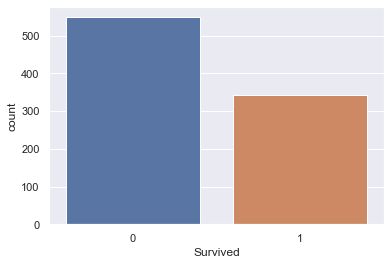

In [32]:
import seaborn as sns; sns.set()
sns.countplot(data = train, x = 'Survived')
plt.show()

In [33]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

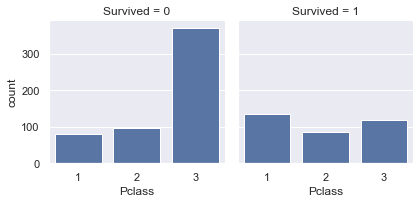

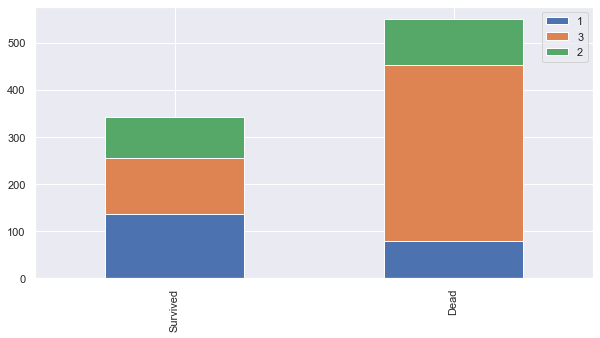

In [34]:
g = sns.FacetGrid(train,col = 'Survived')
g.map_dataframe(sns.countplot, x = 'Pclass')
bar_chart('Pclass')

In [35]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

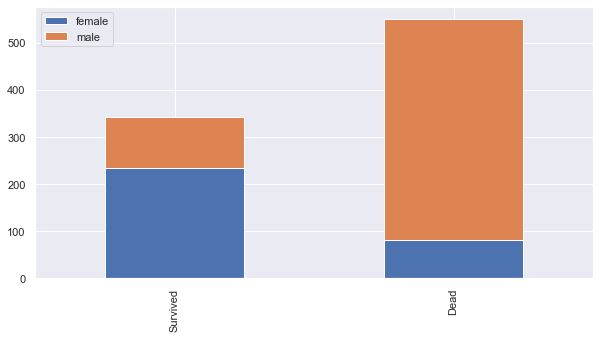

In [36]:
bar_chart('Sex')

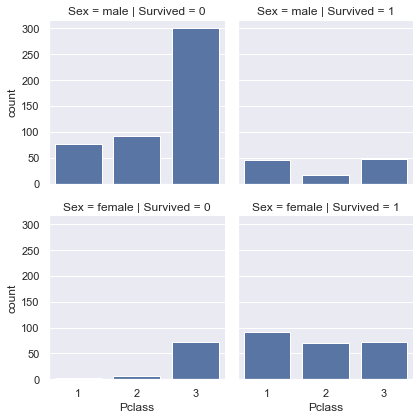

In [37]:
g = sns.FacetGrid(train, col = 'Survived', row = 'Sex')
g.map_dataframe(sns.countplot,x = 'Pclass')

In [38]:
train.Age.isnull().sum()

177

In [39]:
train.Age.mean()

29.69911764705882

<AxesSubplot:xlabel='Age', ylabel='Count'>

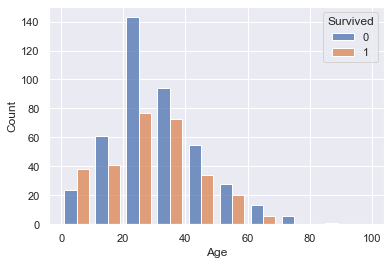

In [40]:
sns.histplot(data = train, x = 'Age', binrange = (0,100), bins = 10,
            hue = 'Survived', multiple = 'dodge',shrink = .8)

In [41]:
train.corr()

Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

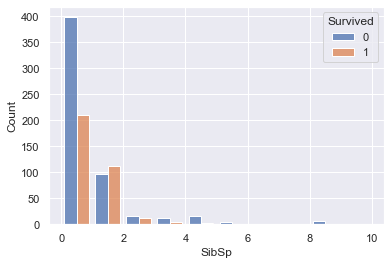

In [42]:
sns.histplot(data = train, x = 'SibSp', binrange = (0,10), bins = 10,
            hue = 'Survived', multiple = 'dodge',shrink = .8)

<AxesSubplot:xlabel='Parch', ylabel='Count'>

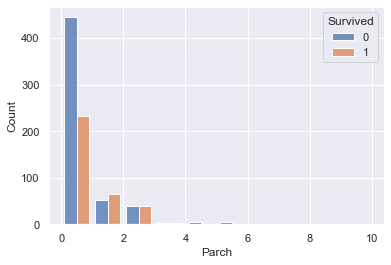

In [43]:
sns.histplot(data = train, x = 'Parch', binrange = (0,10), bins = 10,
            hue = 'Survived', multiple = 'dodge',shrink = .8)

In [44]:
train.Fare.isnull().sum()

0

In [45]:
test.Fare.isnull().sum()

1

In [46]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [47]:
train[train.Fare == 0.0]['Fare'].count()

15

In [48]:
np.where(train.Fare == 0.0)

(array([179, 263, 271, 277, 302, 413, 466, 481, 597, 633, 674, 732, 806,
        815, 822], dtype=int64),)

In [49]:
na_list = list(np.where(train.Fare == 0.0)[0])
train.iloc[na_list]

Survived  Pclass                              Name   Sex   Age  \
PassengerId                                                                   
180                 0       3               Leonard, Mr. Lionel  male  36.0   
264                 0       1             Harrison, Mr. William  male  40.0   
272                 1       3      Tornquist, Mr. William Henry  male  25.0   
278                 0       2       Parkes, Mr. Francis "Frank"  male   NaN   
303                 0       3   Johnson, Mr. William Cahoone Jr  male  19.0   
414                 0       2    Cunningham, Mr. Alfred Fleming  male   NaN   
467                 0       2             Campbell, Mr. William  male   NaN   
482                 0       2  Frost, Mr. Anthony Wood "Archie"  male   NaN   
598                 0       3               Johnson, Mr. Alfred  male  49.0   
634                 0       1     Parr, Mr. William Henry Marsh  male   NaN   
675                 0       2        Watson, Mr. Ennis Hastings  male   NaN   
733                 0       2              Knight, Mr. Robert J  male   NaN   
807                 0       1            Andrews, Mr. Thomas Jr  male  39.0   
816                 0       1                  Fry, Mr. Richard  male   NaN   
823                 0       1   Reuchlin, Jonkheer. John George  male  38.0   

             SibSp  Parch  Ticket  Fare Cabin Embarked  
PassengerId                                             
180              0      0    LINE   0.0   NaN        S  
264              0      0  112059   0.0   B94        S  
272              0      0    LINE   0.0   NaN        S  
278              0      0  239853   0.0   NaN        S  
303              0      0    LINE   0.0   NaN        S  
414              0      0  239853   0.0   NaN        S  
467              0      0  239853   0.0   NaN        S  
482              0      0  239854   0.0   NaN        S  
598              0      0    LINE   0.0   NaN        S  
634              0      0  112052   0.0   NaN        S  
675              0      0  239856   0.0   NaN        S  
733              0      0  239855   0.0   NaN        S  
807              0      0  112050   0.0   A36        S  
816              0      0  112058   0.0  B102        S  
823              0      0   19972   0.0   NaN        S

In [50]:
train.iloc[na_list]['Pclass'].value_counts()

2    6
1    5
3    4
Name: Pclass, dtype: int64

In [51]:
train['Fare'] = train['Fare'].replace(0.0,np.nan)
test['Fare'] = test['Fare'].replace(0.0,np.nan)
train.iloc[na_list]

Survived  Pclass                              Name   Sex   Age  \
PassengerId                                                                   
180                 0       3               Leonard, Mr. Lionel  male  36.0   
264                 0       1             Harrison, Mr. William  male  40.0   
272                 1       3      Tornquist, Mr. William Henry  male  25.0   
278                 0       2       Parkes, Mr. Francis "Frank"  male   NaN   
303                 0       3   Johnson, Mr. William Cahoone Jr  male  19.0   
414                 0       2    Cunningham, Mr. Alfred Fleming  male   NaN   
467                 0       2             Campbell, Mr. William  male   NaN   
482                 0       2  Frost, Mr. Anthony Wood "Archie"  male   NaN   
598                 0       3               Johnson, Mr. Alfred  male  49.0   
634                 0       1     Parr, Mr. William Henry Marsh  male   NaN   
675                 0       2        Watson, Mr. Ennis Hastings  male   NaN   
733                 0       2              Knight, Mr. Robert J  male   NaN   
807                 0       1            Andrews, Mr. Thomas Jr  male  39.0   
816                 0       1                  Fry, Mr. Richard  male   NaN   
823                 0       1   Reuchlin, Jonkheer. John George  male  38.0   

             SibSp  Parch  Ticket  Fare Cabin Embarked  
PassengerId                                             
180              0      0    LINE   NaN   NaN        S  
264              0      0  112059   NaN   B94        S  
272              0      0    LINE   NaN   NaN        S  
278              0      0  239853   NaN   NaN        S  
303              0      0    LINE   NaN   NaN        S  
414              0      0  239853   NaN   NaN        S  
467              0      0  239853   NaN   NaN        S  
482              0      0  239854   NaN   NaN        S  
598              0      0    LINE   NaN   NaN        S  
634              0      0  112052   NaN   NaN        S  
675              0      0  239856   NaN   NaN        S  
733              0      0  239855   NaN   NaN        S  
807              0      0  112050   NaN   A36        S  
816              0      0  112058   NaN  B102        S  
823              0      0   19972   NaN   NaN        S

In [52]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'),inplace = True)

In [53]:
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'),inplace = True)
train.iloc[na_list]

Survived  Pclass                              Name   Sex   Age  \
PassengerId                                                                   
180                 0       3               Leonard, Mr. Lionel  male  36.0   
264                 0       1             Harrison, Mr. William  male  40.0   
272                 1       3      Tornquist, Mr. William Henry  male  25.0   
278                 0       2       Parkes, Mr. Francis "Frank"  male   NaN   
303                 0       3   Johnson, Mr. William Cahoone Jr  male  19.0   
414                 0       2    Cunningham, Mr. Alfred Fleming  male   NaN   
467                 0       2             Campbell, Mr. William  male   NaN   
482                 0       2  Frost, Mr. Anthony Wood "Archie"  male   NaN   
598                 0       3               Johnson, Mr. Alfred  male  49.0   
634                 0       1     Parr, Mr. William Henry Marsh  male   NaN   
675                 0       2        Watson, Mr. Ennis Hastings  male   NaN   
733                 0       2              Knight, Mr. Robert J  male   NaN   
807                 0       1            Andrews, Mr. Thomas Jr  male  39.0   
816                 0       1                  Fry, Mr. Richard  male   NaN   
823                 0       1   Reuchlin, Jonkheer. John George  male  38.0   

             SibSp  Parch  Ticket     Fare Cabin Embarked  
PassengerId                                                
180              0      0    LINE   8.0500   NaN        S  
264              0      0  112059  61.9792   B94        S  
272              0      0    LINE   8.0500   NaN        S  
278              0      0  239853  15.0229   NaN        S  
303              0      0    LINE   8.0500   NaN        S  
414              0      0  239853  15.0229   NaN        S  
467              0      0  239853  15.0229   NaN        S  
482              0      0  239854  15.0229   NaN        S  
598              0      0    LINE   8.0500   NaN        S  
634              0      0  112052  61.9792   NaN        S  
675              0      0  239856  15.0229   NaN        S  
733              0      0  239855  15.0229   NaN        S  
807              0      0  112050  61.9792   A36        S  
816              0      0  112058  61.9792  B102        S  
823              0      0   19972  61.9792   NaN        S

In [54]:
train.Fare.describe()

count    891.000000
mean      32.689318
std       49.611639
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

In [55]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [56]:
train['Fare_Category'] = pd.cut(train['Fare'],bins = [0.0,7.9,14.5,31.0,520],
                               labels = ['Low','Mid','High_Mid','High'])

In [57]:
test['Fare_Category'] = pd.cut(test['Fare'],bins = [0.0,7.9,14.5,31.0,520],
                               labels = ['Low','Mid','High_Mid','High'])

In [58]:
np.where(train.Fare_Category.isnull()==True)

(array([], dtype=int64),)

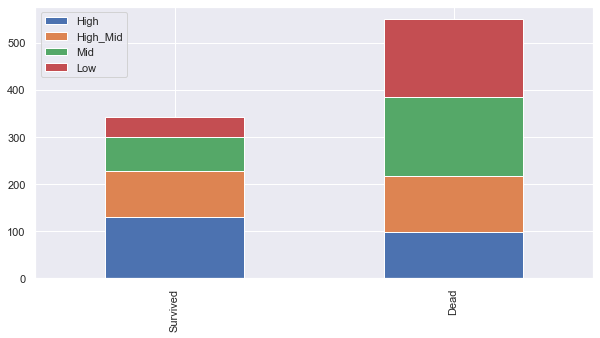

In [59]:
bar_chart('Fare_Category')

<AxesSubplot:xlabel='Fare_Category', ylabel='Count'>

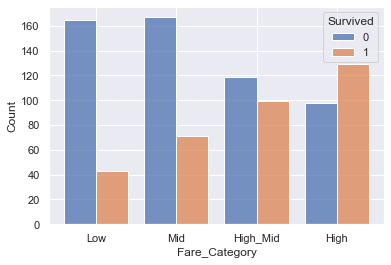

In [60]:
sns.histplot(data = train, x= 'Fare_Category', hue = 'Survived',
            multiple = 'dodge', shrink = .8)

In [61]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [62]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [63]:
train.Cabin = train.Cabin.str[:1]
test.Cabin = test.Cabin.str[:1]
train.Cabin.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

<AxesSubplot:xlabel='Cabin', ylabel='Count'>

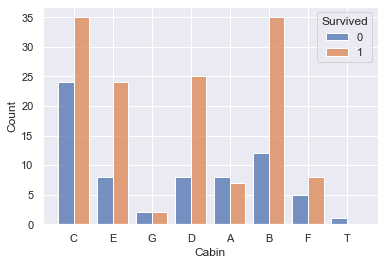

In [64]:
sns.histplot(data = train, x = 'Cabin',hue = 'Survived',
            multiple = 'dodge', shrink = .8)

In [65]:
train.Cabin.isnull().sum()

687

In [66]:
cabin_mapping = {'A':0,'B':0.4,'C':0.8,'D':1.2,
                 'E':1.6,'F':2,'G':2.4,'T':2.8}
train.Cabin = train.Cabin.map(cabin_mapping)
test.Cabin = test.Cabin.map(cabin_mapping)

In [67]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'),inplace = True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'),inplace = True)

In [68]:
train.Cabin.isnull().sum(),test.Cabin.isnull().sum()

(0, 0)

In [69]:
train.Embarked.isnull().sum(),test.Embarked.isnull().sum()

(2, 0)

In [70]:
train.Embarked.value_counts(),test.Embarked.value_counts()

(S    644
 C    168
 Q     77
 Name: Embarked, dtype: int64,
 S    270
 C    102
 Q     46
 Name: Embarked, dtype: int64)

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

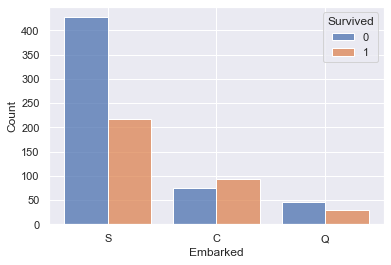

In [71]:
sns.histplot(data = train, x = 'Embarked', hue = 'Survived', multiple = 'dodge',shrink = .8)

In [72]:
train.Embarked = train.Embarked.fillna('S')
train.Embarked.isnull().sum(), test.Embarked.isnull().sum()

(0, 0)

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

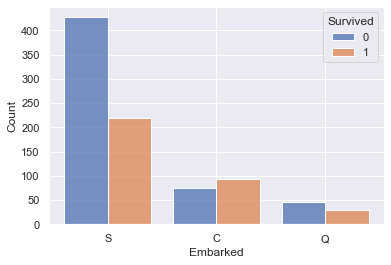

In [73]:
sns.histplot(data = train, x = 'Embarked', hue = 'Survived', multiple = 'dodge', shrink = .8)

In [74]:
train['FamilySize'] = train.Parch + train.SibSp + 1
test['FamilySize'] = test.Parch + test.SibSp + 1

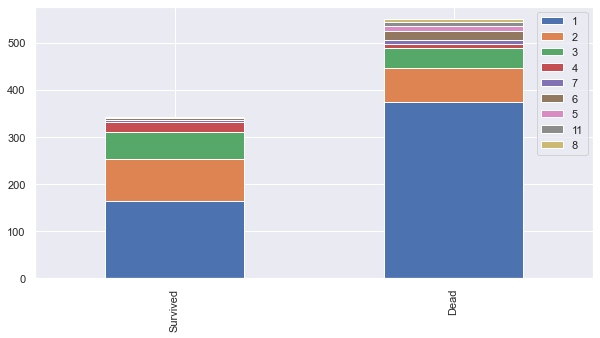

In [75]:
bar_chart('FamilySize')

In [76]:
family_mapping = {1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2,7:2.4,8:2.8,9:3.2,10:3.6,11:4}
map_col("FamilySize",family_mapping)
train.FamilySize.value_counts()

0.0    537
0.4    161
0.8    102
1.2     29
2.0     22
1.6     15
2.4     12
4.0      7
2.8      6
Name: FamilySize, dtype: int64

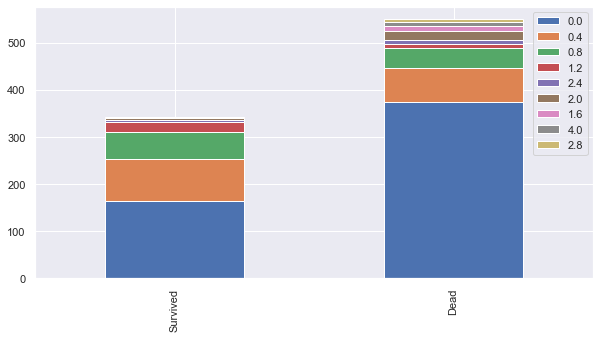

In [77]:
bar_chart('FamilySize')

In [78]:
e_mapping = {'S':0,'C':1,'Q':2}
map_col('Embarked',e_mapping)
train.Embarked.value_counts(), test.Embarked.value_counts()

(0    646
 1    168
 2     77
 Name: Embarked, dtype: int64,
 0    270
 1    102
 2     46
 Name: Embarked, dtype: int64)

In [79]:
s_map = {'male':0,'female':1}
map_col('Sex',s_map)
train.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name  Sex   Age  \
PassengerId                                                                 
1                                      Braund, Mr. Owen Harris    0  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0   
3                                       Heikkinen, Miss. Laina    1  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0   
5                                     Allen, Mr. William Henry    0  35.0   

             SibSp  Parch            Ticket     Fare  Cabin  Embarked  \
PassengerId                                                             
1                1      0         A/5 21171   7.2500    2.0         0   
2                1      0          PC 17599  71.2833    0.8         1   
3                0      0  STON/O2. 3101282   7.9250    2.0         0   
4                1      0            113803  53.1000    0.8         0   
5                0      0            373450   8.0500    2.0         0   

            Fare_Category  FamilySize  
PassengerId                            
1                     Low         0.4  
2                    High         0.4  
3                     Mid         0.0  
4                    High         0.4  
5                     Mid         0.0

In [80]:
train.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [81]:
train_test_data = [train,test]
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand = False)

In [82]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [83]:
print(train.Title.unique(),test.Title.unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer'] ['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [84]:
title_mapping = {'Mr':0,'Miss':1,'Mrs':2,
                'Master':3,'Don':3,'Rev':3,
                'Dr':3,'Mme':3,'Ms':3,
                'Major':3,'Lady':3,'Sir': 3,
                'Mlle':3,'Col':3,'Capt':3,
                'Countess':3,'Jonkheer':3,'Dona':3}

In [85]:
map_col("Title",title_mapping)
print(train.Title.unique(),'\n',
     test.Title.unique(),'\n',
     train.Title.value_counts(),'\n',
      test.Title.value_counts())

[0 2 1 3] 
 [0 2 1 3] 
 0    517
1    182
2    125
3     67
Name: Title, dtype: int64 
 0    240
1     78
2     72
3     28
Name: Title, dtype: int64


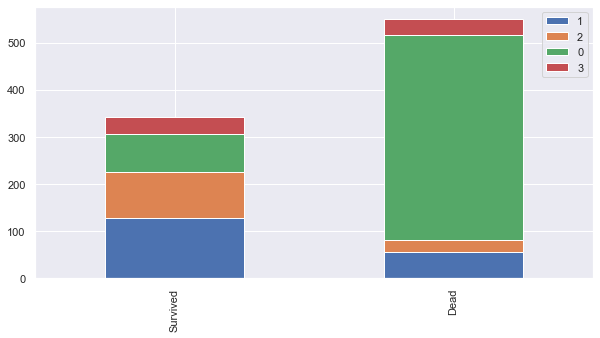

In [86]:
bar_chart('Title')

In [87]:
train.drop('Name',axis = 1, inplace = True)
test.drop('Name',axis = 1, inplace = True)

In [88]:
train.shape, test.shape

((891, 13), (418, 12))

In [89]:
train.head()

Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
PassengerId                                                                
1                   0       3    0  22.0      1      0         A/5 21171   
2                   1       1    1  38.0      1      0          PC 17599   
3                   1       3    1  26.0      0      0  STON/O2. 3101282   
4                   1       1    1  35.0      1      0            113803   
5                   0       3    0  35.0      0      0            373450   

                Fare  Cabin  Embarked Fare_Category  FamilySize  Title  
PassengerId                                                             
1             7.2500    2.0         0           Low         0.4      0  
2            71.2833    0.8         1          High         0.4      2  
3             7.9250    2.0         0           Mid         0.0      1  
4            53.1000    0.8         0          High         0.4      2  
5             8.0500    2.0         0           Mid         0.0      0

In [90]:
test.head()

Pclass  Sex   Age  SibSp  Parch   Ticket     Fare  Cabin  \
PassengerId                                                             
892               3    0  34.5      0      0   330911   7.8292    2.0   
893               3    1  47.0      1      0   363272   7.0000    2.0   
894               2    0  62.0      0      0   240276   9.6875    2.0   
895               3    0  27.0      0      0   315154   8.6625    2.0   
896               3    1  22.0      1      1  3101298  12.2875    2.0   

             Embarked Fare_Category  FamilySize  Title  
PassengerId                                             
892                 2           Low         0.0      0  
893                 0           Low         0.4      2  
894                 2           Mid         0.0      0  
895                 0           Mid         0.0      0  
896                 0           Mid         0.8      2

In [91]:
train.Age.isnull().sum(),test.Age.isnull().sum()

(177, 86)

In [92]:
train['AgeMedian'] = train.groupby('Title')['Age'].transform('median')
train.head()

Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
PassengerId                                                                
1                   0       3    0  22.0      1      0         A/5 21171   
2                   1       1    1  38.0      1      0          PC 17599   
3                   1       3    1  26.0      0      0  STON/O2. 3101282   
4                   1       1    1  35.0      1      0            113803   
5                   0       3    0  35.0      0      0            373450   

                Fare  Cabin  Embarked Fare_Category  FamilySize  Title  \
PassengerId                                                              
1             7.2500    2.0         0           Low         0.4      0   
2            71.2833    0.8         1          High         0.4      2   
3             7.9250    2.0         0           Mid         0.0      1   
4            53.1000    0.8         0          High         0.4      2   
5             8.0500    2.0         0           Mid         0.0      0   

             AgeMedian  
PassengerId             
1                 30.0  
2                 35.0  
3                 21.0  
4                 35.0  
5                 30.0

In [93]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace = True)

In [94]:
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'),inplace = True)
train.head(20)

Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
PassengerId                                                                
1                   0       3    0  22.0      1      0         A/5 21171   
2                   1       1    1  38.0      1      0          PC 17599   
3                   1       3    1  26.0      0      0  STON/O2. 3101282   
4                   1       1    1  35.0      1      0            113803   
5                   0       3    0  35.0      0      0            373450   
6                   0       3    0  30.0      0      0            330877   
7                   0       1    0  54.0      0      0             17463   
8                   0       3    0   2.0      3      1            349909   
9                   1       3    1  27.0      0      2            347742   
10                  1       2    1  14.0      1      0            237736   
11                  1       3    1   4.0      1      1           PP 9549   
12                  1       1    1  58.0      0      0            113783   
13                  0       3    0  20.0      0      0         A/5. 2151   
14                  0       3    0  39.0      1      5            347082   
15                  0       3    1  14.0      0      0            350406   
16                  1       2    1  55.0      0      0            248706   
17                  0       3    0   2.0      4      1            382652   
18                  1       2    0  30.0      0      0            244373   
19                  0       3    1  31.0      1      0            345763   
20                  1       3    1  35.0      0      0              2649   

                Fare  Cabin  Embarked Fare_Category  FamilySize  Title  \
PassengerId                                                              
1             7.2500    2.0         0           Low         0.4      0   
2            71.2833    0.8         1          High         0.4      2   
3             7.9250    2.0         0           Mid         0.0      1   
4            53.1000    0.8         0          High         0.4      2   
5             8.0500    2.0         0           Mid         0.0      0   
6             8.4583    2.0         2           Mid         0.0      0   
7            51.8625    1.6         0          High         0.0      0   
8            21.0750    2.0         0      High_Mid         1.6      3   
9            11.1333    2.0         0           Mid         0.8      2   
10           30.0708    1.8         1      High_Mid         0.4      2   
11           16.7000    2.4         0      High_Mid         0.8      1   
12           26.5500    0.8         0      High_Mid         0.0      1   
13            8.0500    2.0         0           Mid         0.0      0   
14           31.2750    2.0         0          High         2.4      0   
15            7.8542    2.0         0           Low         0.0      1   
16           16.0000    1.8         0      High_Mid         0.0      2   
17           29.1250    2.0         2      High_Mid         2.0      3   
18           13.0000    1.8         0           Mid         0.0      0   
19           18.0000    2.0         0      High_Mid         0.4      2   
20            7.2250    2.0         1           Low         0.0      2   

             AgeMedian  
PassengerId             
1                 30.0  
2                 35.0  
3                 21.0  
4                 35.0  
5                 30.0  
6                 30.0  
7                 30.0  
8                  9.0  
9                 35.0  
10                35.0  
11                21.0  
12                21.0  
13                30.0  
14                30.0  
15                21.0  
16                35.0  
17                 9.0  
18                30.0  
19                35.0  
20                35.0

In [95]:
train['Age_Category'] = pd.cut(train['Age'],bins = [0,16,26,36,62,100],
                         labels = [0,1,2,3,4])

In [96]:
train.head(10)

Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
PassengerId                                                                
1                   0       3    0  22.0      1      0         A/5 21171   
2                   1       1    1  38.0      1      0          PC 17599   
3                   1       3    1  26.0      0      0  STON/O2. 3101282   
4                   1       1    1  35.0      1      0            113803   
5                   0       3    0  35.0      0      0            373450   
6                   0       3    0  30.0      0      0            330877   
7                   0       1    0  54.0      0      0             17463   
8                   0       3    0   2.0      3      1            349909   
9                   1       3    1  27.0      0      2            347742   
10                  1       2    1  14.0      1      0            237736   

                Fare  Cabin  Embarked Fare_Category  FamilySize  Title  \
PassengerId                                                              
1             7.2500    2.0         0           Low         0.4      0   
2            71.2833    0.8         1          High         0.4      2   
3             7.9250    2.0         0           Mid         0.0      1   
4            53.1000    0.8         0          High         0.4      2   
5             8.0500    2.0         0           Mid         0.0      0   
6             8.4583    2.0         2           Mid         0.0      0   
7            51.8625    1.6         0          High         0.0      0   
8            21.0750    2.0         0      High_Mid         1.6      3   
9            11.1333    2.0         0           Mid         0.8      2   
10           30.0708    1.8         1      High_Mid         0.4      2   

             AgeMedian Age_Category  
PassengerId                          
1                 30.0            1  
2                 35.0            3  
3                 21.0            1  
4                 35.0            2  
5                 30.0            2  
6                 30.0            2  
7                 30.0            3  
8                  9.0            0  
9                 35.0            2  
10                35.0            0

In [97]:
test['Age_Category'] = pd.cut(test['Age'],bins = [0,16,26,36,62,100],
                              labels = [0,1,2,3,4])

In [98]:
test.head(10)

Pclass  Sex   Age  SibSp  Parch     Ticket     Fare  Cabin  \
PassengerId                                                               
892               3    0  34.5      0      0     330911   7.8292    2.0   
893               3    1  47.0      1      0     363272   7.0000    2.0   
894               2    0  62.0      0      0     240276   9.6875    2.0   
895               3    0  27.0      0      0     315154   8.6625    2.0   
896               3    1  22.0      1      1    3101298  12.2875    2.0   
897               3    0  14.0      0      0       7538   9.2250    2.0   
898               3    1  30.0      0      0     330972   7.6292    2.0   
899               2    0  26.0      1      1     248738  29.0000    2.0   
900               3    1  18.0      0      0       2657   7.2292    2.0   
901               3    0  21.0      2      0  A/4 48871  24.1500    2.0   

             Embarked Fare_Category  FamilySize  Title Age_Category  
PassengerId                                                          
892                 2           Low         0.0      0            2  
893                 0           Low         0.4      2            3  
894                 2           Mid         0.0      0            3  
895                 0           Mid         0.0      0            2  
896                 0           Mid         0.8      2            1  
897                 0           Mid         0.0      0            0  
898                 2           Low         0.0      1            2  
899                 0      High_Mid         0.8      0            1  
900                 1           Low         0.0      2            1  
901                 0      High_Mid         0.8      0            1

In [99]:
train.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Fare_Category    0
FamilySize       0
Title            0
AgeMedian        0
Age_Category     0
dtype: int64

In [100]:
train['Fare_Category'] = pd.cut(train['Fare'],
                               bins = [0,14,30,100,1000],
                               labels = [0,1,2,3])
test['Fare_Category'] = pd.cut(test['Fare'],
                               bins = [0,14,30,100,1000],
                               labels = [0,1,2,3])
train.head()

Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
PassengerId                                                                
1                   0       3    0  22.0      1      0         A/5 21171   
2                   1       1    1  38.0      1      0          PC 17599   
3                   1       3    1  26.0      0      0  STON/O2. 3101282   
4                   1       1    1  35.0      1      0            113803   
5                   0       3    0  35.0      0      0            373450   

                Fare  Cabin  Embarked Fare_Category  FamilySize  Title  \
PassengerId                                                              
1             7.2500    2.0         0             0         0.4      0   
2            71.2833    0.8         1             2         0.4      2   
3             7.9250    2.0         0             0         0.0      1   
4            53.1000    0.8         0             2         0.4      2   
5             8.0500    2.0         0             0         0.0      0   

             AgeMedian Age_Category  
PassengerId                          
1                 30.0            1  
2                 35.0            3  
3                 21.0            1  
4                 35.0            2  
5                 30.0            2

# 9. 모델 적용


### (1) 종속 변수와 독립 변수 확인

In [101]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Fare_Category', 'FamilySize', 'Title',
       'AgeMedian', 'Age_Category'],
      dtype='object')

In [102]:
X_features = ['Pclass', 'Sex', 'Age_Category','Fare_Category','Cabin', 'Embarked' , 'Title', 'FamilySize']
X_train = train[X_features]
X_test = test[X_features]
Y_train = train['Survived']

In [103]:
X_train.isnull().sum()

Pclass           0
Sex              0
Age_Category     0
Fare_Category    0
Cabin            0
Embarked         0
Title            0
FamilySize       0
dtype: int64

In [104]:
X_test.isnull().sum()

Pclass           0
Sex              0
Age_Category     0
Fare_Category    0
Cabin            0
Embarked         0
Title            0
FamilySize       0
dtype: int64

In [105]:
X_train.shape

(891, 8)

In [106]:
X_train.head()

Pclass  Sex Age_Category Fare_Category  Cabin  Embarked  Title  \
PassengerId                                                                   
1                 3    0            1             0    2.0         0      0   
2                 1    1            3             2    0.8         1      2   
3                 3    1            1             0    2.0         0      1   
4                 1    1            2             2    0.8         0      2   
5                 3    0            2             0    2.0         0      0   

             FamilySize  
PassengerId              
1                   0.4  
2                   0.4  
3                   0.0  
4                   0.4  
5                   0.0

In [107]:
X_test['Pclass'].isnull().sum()

0

In [108]:
# Import Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [109]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

def getScore(clf):
    score = cross_val_score(clf, X_train, Y_train, 
                           cv=k_fold, n_jobs=1, scoring='accuracy')
    return score

### (2)교차 검증

In [110]:
scores = pd.DataFrame([
    getScore(KNeighborsClassifier(n_neighbors = 13)),
    getScore(DecisionTreeClassifier(random_state=0)),
    getScore(RandomForestClassifier(n_estimators=13, random_state=0)),
    getScore(GaussianNB()),
    getScore(SVC(gamma = 'auto')),
    getScore(MLPClassifier(solver='sgd', activation='logistic',
                          hidden_layer_sizes=(48, 16),
                          random_state=1, max_iter=200000))],
    index = ['KNN','DT','RF','NB','SVM','MLP_s'])


In [111]:
scores

0         1         2         3         4         5         6  \
KNN    0.788889  0.786517  0.808989  0.831461  0.853933  0.808989  0.842697   
DT     0.777778  0.775281  0.786517  0.775281  0.876404  0.752809  0.808989   
RF     0.833333  0.786517  0.786517  0.808989  0.876404  0.808989  0.808989   
NB     0.855556  0.741573  0.752809  0.752809  0.707865  0.808989  0.764045   
SVM    0.833333  0.786517  0.820225  0.820225  0.842697  0.808989  0.831461   
MLP_s  0.566667  0.662921  0.651685  0.595506  0.696629  0.651685  0.595506   

              7         8         9  
KNN    0.797753  0.831461  0.853933  
DT     0.808989  0.741573  0.775281  
RF     0.786517  0.764045  0.775281  
NB     0.808989  0.853933  0.820225  
SVM    0.853933  0.842697  0.853933  
MLP_s  0.651685  0.561798  0.528090

In [112]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [113]:
X = X_train.to_numpy()
Y = Y_train.to_numpy().reshape(-1,1)

In [115]:
# ANN 모델 cross_validation 성능 : sonar모델 참고
from sklearn.model_selection import StratifiedKFold

n_fold = 10
skf= StratifiedKFold( n_splits = n_fold, shuffle = True, random_state = 0)
accuracy_list = []
for train_index, test_index in skf.split(X, Y):
   
    model = Sequential()
    model.add(Dense(units = 48, input_dim = 8, activation = 'relu'))
    model.add(Dense(units = 24, activation = 'relu'))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy',
                 optimizer = 'adam',
                 metrics = ['accuracy'])
    Xtrain, Xtest = X[train_index], X[test_index]
    Ytrain, Ytest = Y[train_index], Y[test_index]
    model.fit(Xtrain, Ytrain, epochs=100, batch_size=10, verbose=1)
    
    accuracy_list.append( model.evaluate(Xtest, Ytest)[1])

print(n_fold, "-fold accuracy:", accuracy_list)
print('\nAverage Accuracy:', np.array(accuracy_list).mean())

Epoch 1/100
81/81 [==============================] - 0s 649us/step - loss: 0.6864 - accuracy: 0.6192
Epoch 2/100
81/81 [==============================] - 0s 655us/step - loss: 0.5353 - accuracy: 0.7690
Epoch 3/100
81/81 [==============================] - 0s 642us/step - loss: 0.4815 - accuracy: 0.8002
Epoch 4/100
81/81 [==============================] - 0s 667us/step - loss: 0.4535 - accuracy: 0.8140
Epoch 5/100
81/81 [==============================] - 0s 605us/step - loss: 0.4403 - accuracy: 0.8190
Epoch 6/100
81/81 [==============================] - 0s 679us/step - loss: 0.4370 - accuracy: 0.8115
Epoch 7/100
81/81 [==============================] - 0s 667us/step - loss: 0.4277 - accuracy: 0.8190
Epoch 8/100
81/81 [==============================] - 0s 654us/step - loss: 0.4286 - accuracy: 0.8102
Epoch 9/100
81/81 [==============================] - 0s 667us/step - loss: 0.4247 - accuracy: 0.8215
Epoch 10/100
81/81 [==============================] - 0s 704us/step - loss: 0.4231 - accura

Epoch 81/100
81/81 [==============================] - 0s 667us/step - loss: 0.3621 - accuracy: 0.8539
Epoch 82/100
81/81 [==============================] - 0s 643us/step - loss: 0.3626 - accuracy: 0.8539
Epoch 83/100
81/81 [==============================] - 0s 654us/step - loss: 0.3598 - accuracy: 0.8552
Epoch 84/100
81/81 [==============================] - 0s 642us/step - loss: 0.3620 - accuracy: 0.8489
Epoch 85/100
81/81 [==============================] - 0s 593us/step - loss: 0.3597 - accuracy: 0.8489
Epoch 86/100
81/81 [==============================] - 0s 593us/step - loss: 0.3606 - accuracy: 0.8552
Epoch 87/100
81/81 [==============================] - 0s 568us/step - loss: 0.3624 - accuracy: 0.8564
Epoch 88/100
81/81 [==============================] - 0s 667us/step - loss: 0.3592 - accuracy: 0.8527
Epoch 89/100
81/81 [==============================] - 0s 592us/step - loss: 0.3637 - accuracy: 0.8477
Epoch 90/100
81/81 [==============================] - 0s 569us/step - loss: 0.3593

81/81 [==============================] - 0s 580us/step - loss: 0.3669 - accuracy: 0.8491
Epoch 61/100
81/81 [==============================] - 0s 568us/step - loss: 0.3626 - accuracy: 0.8541
Epoch 62/100
81/81 [==============================] - 0s 583us/step - loss: 0.3655 - accuracy: 0.8392
Epoch 63/100
81/81 [==============================] - 0s 617us/step - loss: 0.3605 - accuracy: 0.8516
Epoch 64/100
81/81 [==============================] - 0s 630us/step - loss: 0.3619 - accuracy: 0.8541
Epoch 65/100
81/81 [==============================] - 0s 592us/step - loss: 0.3620 - accuracy: 0.8416
Epoch 66/100
81/81 [==============================] - 0s 559us/step - loss: 0.3556 - accuracy: 0.8653
Epoch 67/100
81/81 [==============================] - 0s 565us/step - loss: 0.3603 - accuracy: 0.8354
Epoch 68/100
81/81 [==============================] - 0s 580us/step - loss: 0.3556 - accuracy: 0.8466
Epoch 69/100
81/81 [==============================] - 0s 595us/step - loss: 0.3574 - accuracy: 

81/81 [==============================] - 0s 638us/step - loss: 0.3840 - accuracy: 0.8454
Epoch 40/100
81/81 [==============================] - 0s 753us/step - loss: 0.3796 - accuracy: 0.8441
Epoch 41/100
81/81 [==============================] - 0s 690us/step - loss: 0.3772 - accuracy: 0.8404
Epoch 42/100
81/81 [==============================] - 0s 661us/step - loss: 0.3800 - accuracy: 0.8454
Epoch 43/100
81/81 [==============================] - 0s 593us/step - loss: 0.3771 - accuracy: 0.8416
Epoch 44/100
81/81 [==============================] - 0s 643us/step - loss: 0.3767 - accuracy: 0.8466
Epoch 45/100
81/81 [==============================] - 0s 574us/step - loss: 0.3846 - accuracy: 0.8379
Epoch 46/100
81/81 [==============================] - 0s 557us/step - loss: 0.3759 - accuracy: 0.8367
Epoch 47/100
81/81 [==============================] - 0s 594us/step - loss: 0.3802 - accuracy: 0.8379
Epoch 48/100
81/81 [==============================] - 0s 569us/step - loss: 0.3722 - accuracy: 

81/81 [==============================] - 0s 603us/step - loss: 0.4001 - accuracy: 0.8441
Epoch 19/100
81/81 [==============================] - 0s 568us/step - loss: 0.4003 - accuracy: 0.8429
Epoch 20/100
81/81 [==============================] - 0s 580us/step - loss: 0.3998 - accuracy: 0.8367
Epoch 21/100
81/81 [==============================] - 0s 642us/step - loss: 0.3966 - accuracy: 0.8329
Epoch 22/100
81/81 [==============================] - 0s 593us/step - loss: 0.3984 - accuracy: 0.8416
Epoch 23/100
81/81 [==============================] - 0s 592us/step - loss: 0.3935 - accuracy: 0.8367
Epoch 24/100
81/81 [==============================] - 0s 617us/step - loss: 0.3915 - accuracy: 0.8392
Epoch 25/100
81/81 [==============================] - 0s 578us/step - loss: 0.3943 - accuracy: 0.8354
Epoch 26/100
81/81 [==============================] - 0s 580us/step - loss: 0.3903 - accuracy: 0.8416
Epoch 27/100
81/81 [==============================] - 0s 602us/step - loss: 0.3936 - accuracy: 

81/81 [==============================] - 0s 629us/step - loss: 0.3519 - accuracy: 0.8466
Epoch 99/100
81/81 [==============================] - 0s 580us/step - loss: 0.3549 - accuracy: 0.8504
Epoch 100/100
3/3 [==============================] - 0s 1ms/step - loss: 0.4231 - accuracy: 0.8427
Epoch 1/100
81/81 [==============================] - 0s 709us/step - loss: 0.5476 - accuracy: 0.7145
Epoch 2/100
81/81 [==============================] - 0s 655us/step - loss: 0.4739 - accuracy: 0.7918
Epoch 3/100
81/81 [==============================] - 0s 642us/step - loss: 0.4462 - accuracy: 0.8105
Epoch 4/100
81/81 [==============================] - 0s 617us/step - loss: 0.4277 - accuracy: 0.8367
Epoch 5/100
81/81 [==============================] - 0s 605us/step - loss: 0.4282 - accuracy: 0.8267
Epoch 6/100
81/81 [==============================] - 0s 543us/step - loss: 0.4236 - accuracy: 0.8254
Epoch 7/100
81/81 [==============================] - 0s 593us/step - loss: 0.4181 - accuracy: 0.8304
Epo

81/81 [==============================] - 0s 644us/step - loss: 0.3565 - accuracy: 0.8529
Epoch 78/100
81/81 [==============================] - 0s 630us/step - loss: 0.3532 - accuracy: 0.8504
Epoch 79/100
81/81 [==============================] - 0s 616us/step - loss: 0.3536 - accuracy: 0.8591
Epoch 80/100
81/81 [==============================] - 0s 601us/step - loss: 0.3521 - accuracy: 0.8516
Epoch 81/100
81/81 [==============================] - 0s 568us/step - loss: 0.3556 - accuracy: 0.8491
Epoch 82/100
81/81 [==============================] - 0s 572us/step - loss: 0.3530 - accuracy: 0.8516
Epoch 83/100
81/81 [==============================] - 0s 617us/step - loss: 0.3508 - accuracy: 0.8504
Epoch 84/100
81/81 [==============================] - 0s 543us/step - loss: 0.3518 - accuracy: 0.8566
Epoch 85/100
81/81 [==============================] - 0s 555us/step - loss: 0.3525 - accuracy: 0.8579
Epoch 86/100
81/81 [==============================] - 0s 677us/step - loss: 0.3480 - accuracy: 

81/81 [==============================] - 0s 593us/step - loss: 0.3783 - accuracy: 0.8466
Epoch 50/100
81/81 [==============================] - 0s 617us/step - loss: 0.3760 - accuracy: 0.8416
Epoch 51/100
81/81 [==============================] - 0s 568us/step - loss: 0.3795 - accuracy: 0.8342
Epoch 52/100
81/81 [==============================] - 0s 654us/step - loss: 0.3746 - accuracy: 0.8466
Epoch 53/100
81/81 [==============================] - 0s 580us/step - loss: 0.3786 - accuracy: 0.8429
Epoch 54/100
81/81 [==============================] - 0s 593us/step - loss: 0.3763 - accuracy: 0.8392
Epoch 55/100
81/81 [==============================] - 0s 617us/step - loss: 0.3710 - accuracy: 0.8541
Epoch 56/100
81/81 [==============================] - 0s 605us/step - loss: 0.3717 - accuracy: 0.8529
Epoch 57/100
81/81 [==============================] - 0s 593us/step - loss: 0.3708 - accuracy: 0.8466
Epoch 58/100
81/81 [==============================] - 0s 642us/step - loss: 0.3701 - accuracy: 

81/81 [==============================] - 0s 679us/step - loss: 0.3873 - accuracy: 0.8466
Epoch 22/100
81/81 [==============================] - 0s 629us/step - loss: 0.3849 - accuracy: 0.8516
Epoch 23/100
81/81 [==============================] - 0s 580us/step - loss: 0.3874 - accuracy: 0.8404
Epoch 24/100
81/81 [==============================] - 0s 568us/step - loss: 0.3807 - accuracy: 0.8416
Epoch 25/100
81/81 [==============================] - 0s 543us/step - loss: 0.3827 - accuracy: 0.8454
Epoch 26/100
81/81 [==============================] - 0s 575us/step - loss: 0.3849 - accuracy: 0.8516
Epoch 27/100
81/81 [==============================] - 0s 584us/step - loss: 0.3823 - accuracy: 0.8504
Epoch 28/100
81/81 [==============================] - 0s 575us/step - loss: 0.3856 - accuracy: 0.8466
Epoch 29/100
81/81 [==============================] - 0s 556us/step - loss: 0.3835 - accuracy: 0.8429
Epoch 30/100
81/81 [==============================] - 0s 580us/step - loss: 0.3780 - accuracy: 

3/3 [==============================] - 0s 999us/step - loss: 0.5454 - accuracy: 0.7528
Epoch 1/100
81/81 [==============================] - 0s 642us/step - loss: 0.5837 - accuracy: 0.6958
Epoch 2/100
81/81 [==============================] - 0s 568us/step - loss: 0.4803 - accuracy: 0.7868
Epoch 3/100
81/81 [==============================] - 0s 568us/step - loss: 0.4537 - accuracy: 0.8167
Epoch 4/100
81/81 [==============================] - 0s 580us/step - loss: 0.4427 - accuracy: 0.8279
Epoch 5/100
81/81 [==============================] - 0s 567us/step - loss: 0.4382 - accuracy: 0.8204
Epoch 6/100
81/81 [==============================] - 0s 546us/step - loss: 0.4358 - accuracy: 0.8254
Epoch 7/100
81/81 [==============================] - 0s 646us/step - loss: 0.4288 - accuracy: 0.8267
Epoch 8/100
81/81 [==============================] - 0s 581us/step - loss: 0.4251 - accuracy: 0.8279
Epoch 9/100
81/81 [==============================] - 0s 652us/step - loss: 0.4227 - accuracy: 0.8242
Epoc

81/81 [==============================] - 0s 642us/step - loss: 0.3535 - accuracy: 0.8628
Epoch 81/100
81/81 [==============================] - 0s 654us/step - loss: 0.3582 - accuracy: 0.8591
Epoch 82/100
81/81 [==============================] - 0s 617us/step - loss: 0.3546 - accuracy: 0.8616
Epoch 83/100
81/81 [==============================] - 0s 667us/step - loss: 0.3559 - accuracy: 0.8591
Epoch 84/100
81/81 [==============================] - 0s 630us/step - loss: 0.3551 - accuracy: 0.8554
Epoch 85/100
81/81 [==============================] - 0s 593us/step - loss: 0.3552 - accuracy: 0.8579
Epoch 86/100
81/81 [==============================] - 0s 580us/step - loss: 0.3504 - accuracy: 0.8541
Epoch 87/100
81/81 [==============================] - 0s 580us/step - loss: 0.3557 - accuracy: 0.8591
Epoch 88/100
81/81 [==============================] - 0s 630us/step - loss: 0.3462 - accuracy: 0.8579
Epoch 89/100
81/81 [==============================] - 0s 679us/step - loss: 0.3657 - accuracy: 

81/81 [==============================] - 0s 654us/step - loss: 0.3610 - accuracy: 0.8529
Epoch 53/100
81/81 [==============================] - 0s 679us/step - loss: 0.3596 - accuracy: 0.8516
Epoch 54/100
81/81 [==============================] - 0s 619us/step - loss: 0.3567 - accuracy: 0.8591
Epoch 55/100
81/81 [==============================] - 0s 612us/step - loss: 0.3600 - accuracy: 0.8591
Epoch 56/100
81/81 [==============================] - 0s 661us/step - loss: 0.3563 - accuracy: 0.8566
Epoch 57/100
81/81 [==============================] - 0s 600us/step - loss: 0.3567 - accuracy: 0.8591
Epoch 58/100
81/81 [==============================] - 0s 633us/step - loss: 0.3540 - accuracy: 0.8579
Epoch 59/100
81/81 [==============================] - 0s 716us/step - loss: 0.3569 - accuracy: 0.8529
Epoch 60/100
81/81 [==============================] - 0s 727us/step - loss: 0.3523 - accuracy: 0.8554
Epoch 61/100
81/81 [==============================] - 0s 593us/step - loss: 0.3560 - accuracy: 

81/81 [==============================] - 0s 677us/step - loss: 0.3918 - accuracy: 0.8404
Epoch 25/100
81/81 [==============================] - 0s 580us/step - loss: 0.3940 - accuracy: 0.8342
Epoch 26/100
81/81 [==============================] - 0s 556us/step - loss: 0.4002 - accuracy: 0.8354
Epoch 27/100
81/81 [==============================] - 0s 580us/step - loss: 0.3939 - accuracy: 0.8292
Epoch 28/100
81/81 [==============================] - 0s 601us/step - loss: 0.3904 - accuracy: 0.8429
Epoch 29/100
81/81 [==============================] - 0s 612us/step - loss: 0.3936 - accuracy: 0.8429
Epoch 30/100
81/81 [==============================] - 0s 571us/step - loss: 0.3895 - accuracy: 0.8404
Epoch 31/100
81/81 [==============================] - 0s 597us/step - loss: 0.3878 - accuracy: 0.8404
Epoch 32/100
81/81 [==============================] - 0s 592us/step - loss: 0.3846 - accuracy: 0.8404
Epoch 33/100
81/81 [==============================] - 0s 573us/step - loss: 0.3850 - accuracy: 

3/3 [==============================] - 0s 528us/step - loss: 0.4486 - accuracy: 0.8090
10 -fold accuracy: [0.8333333134651184, 0.8426966071128845, 0.7303370833396912, 0.8426966071128845, 0.8089887499809265, 0.8426966071128845, 0.7528089880943298, 0.7752808928489685, 0.7752808928489685, 0.8089887499809265]

Average Accuracy: 0.8013108491897583


In [116]:
scores.loc['MLP_tf'] = np.array(accuracy_list)
scores

0         1         2         3         4         5         6  \
KNN     0.788889  0.786517  0.808989  0.831461  0.853933  0.808989  0.842697   
DT      0.777778  0.775281  0.786517  0.775281  0.876404  0.752809  0.808989   
RF      0.833333  0.786517  0.786517  0.808989  0.876404  0.808989  0.808989   
NB      0.855556  0.741573  0.752809  0.752809  0.707865  0.808989  0.764045   
SVM     0.833333  0.786517  0.820225  0.820225  0.842697  0.808989  0.831461   
MLP_s   0.566667  0.662921  0.651685  0.595506  0.696629  0.651685  0.595506   
MLP_tf  0.833333  0.842697  0.730337  0.842697  0.808989  0.842697  0.752809   

               7         8         9  
KNN     0.797753  0.831461  0.853933  
DT      0.808989  0.741573  0.775281  
RF      0.786517  0.764045  0.775281  
NB      0.808989  0.853933  0.820225  
SVM     0.853933  0.842697  0.853933  
MLP_s   0.651685  0.561798  0.528090  
MLP_tf  0.775281  0.775281  0.808989

In [117]:
scores['Mean'] = np.around(scores.mean(axis = 1)*100, 2)
scores

#axis=1 가로  axis=0 세로

0         1         2         3         4         5         6  \
KNN     0.788889  0.786517  0.808989  0.831461  0.853933  0.808989  0.842697   
DT      0.777778  0.775281  0.786517  0.775281  0.876404  0.752809  0.808989   
RF      0.833333  0.786517  0.786517  0.808989  0.876404  0.808989  0.808989   
NB      0.855556  0.741573  0.752809  0.752809  0.707865  0.808989  0.764045   
SVM     0.833333  0.786517  0.820225  0.820225  0.842697  0.808989  0.831461   
MLP_s   0.566667  0.662921  0.651685  0.595506  0.696629  0.651685  0.595506   
MLP_tf  0.833333  0.842697  0.730337  0.842697  0.808989  0.842697  0.752809   

               7         8         9   Mean  
KNN     0.797753  0.831461  0.853933  82.05  
DT      0.808989  0.741573  0.775281  78.79  
RF      0.786517  0.764045  0.775281  80.36  
NB      0.808989  0.853933  0.820225  78.67  
SVM     0.853933  0.842697  0.853933  82.94  
MLP_s   0.651685  0.561798  0.528090  61.62  
MLP_tf  0.775281  0.775281  0.808989  80.13

### (4)예측

In [118]:
def getPredict(clf):
    global X_train, Y_train, X_test
    
    clf.fit(X_train, Y_train)
    return clf.predict(X_test)

In [119]:
prediction = pd.DataFrame({
    'KNN':getPredict(KNeighborsClassifier(n_neighbors = 13)),
    'DT':getPredict(DecisionTreeClassifier()),
    'RF':getPredict(RandomForestClassifier(n_estimators=13)),
    'NB':getPredict(GaussianNB()),
    'SVM':getPredict(SVC(gamma = 'auto'))
    })
    
prediction.head(20)

KNN  DT  RF  NB  SVM
0     0   0   0   0    0
1     0   0   0   1    1
2     0   0   0   0    0
3     0   0   0   0    0
4     0   1   1   1    1
5     0   0   0   0    0
6     1   0   0   1    1
7     0   0   0   0    0
8     1   1   1   1    1
9     0   0   0   0    0
10    0   0   0   0    0
11    1   0   0   0    0
12    1   1   1   1    1
13    0   0   0   0    0
14    1   1   1   1    1
15    1   1   1   1    1
16    0   0   0   0    0
17    0   0   0   0    0
18    0   0   0   1    1
19    0   0   1   1    1

In [120]:
prediction['Survived_ML'] = (prediction.sum(axis = 1) > 2) * 1
prediction.head()

KNN  DT  RF  NB  SVM  Survived_ML
0    0   0   0   0    0            0
1    0   0   0   1    1            0
2    0   0   0   0    0            0
3    0   0   0   0    0            0
4    0   1   1   1    1            1

In [121]:
#ANN 모델 제대로 학습
model = Sequential()
model.add(Dense(units = 48, input_dim = 8, activation = 'relu'))
model.add(Dense(units = 24, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',metrics = ['accuracy'])

model.fit(X,Y, epochs=5000, batch_size=10, verbose=0)
print("Train accuracy:",model.evaluate(X, Y)[1])

28/28 [==============================] - 0s 1ms/step - loss: 0.2267 - accuracy: 0.9024
Train accuracy: 0.9023569226264954


In [122]:
prediction['MLP_TF'] = model.predict(X_test).reshape(-1,)
prediction['Survived_TF'] = (prediction['MLP_TF'] > 0.5).astype(int)
prediction.head()

KNN  DT  RF  NB  SVM  Survived_ML    MLP_TF  Survived_TF
0    0   0   0   0    0            0  0.082615            0
1    0   0   0   1    1            0  0.000289            0
2    0   0   0   0    0            0  0.000025            0
3    0   0   0   0    0            0  0.093839            0
4    0   1   1   1    1            1  0.998290            1

In [123]:
(prediction.Survived_ML != prediction.Survived_TF).sum()

37

In [124]:
mis_idx = list(np.where(prediction.Survived_ML != prediction.Survived_TF)[0])
print(mis_idx)

[6, 19, 23, 24, 36, 37, 39, 72, 73, 86, 87, 98, 138, 142, 149, 157, 169, 181, 197, 199, 206, 208, 264, 268, 280, 283, 284, 291, 345, 347, 354, 367, 369, 376, 382, 383, 412]


In [125]:
prediction.iloc[mis_idx,:]

KNN  DT  RF  NB  SVM  Survived_ML    MLP_TF  Survived_TF
6      1   0   0   1    1            1  0.000848            0
19     0   0   1   1    1            1  0.032225            0
23     0   0   1   1    0            0  0.999710            1
24     1   1   1   1    1            1  0.013447            0
36     1   0   0   1    1            1  0.384040            0
37     1   0   0   1    1            1  0.384040            0
39     0   1   1   0    0            0  0.618135            1
72     1   0   0   1    1            1  0.295723            0
73     1   0   1   0    0            0  0.985732            1
86     1   0   0   1    1            1  0.000848            0
87     1   0   0   1    1            1  0.384040            0
98     1   0   0   1    1            1  0.384040            0
138    1   0   0   1    1            1  0.384040            0
142    0   0   0   1    0            0  0.999999            1
149    1   0   1   1    0            1  0.005896            0
157    1   0   0   1    1            1  0.384040            0
169    1   0   0   1    1            1  0.384040            0
181    0   0   0   0    0            0  0.990478            1
197    1   0   0   1    1            1  0.384040            0
199    0   0   1   1    1            1  0.011181            0
206    1   0   0   1    1            1  0.000848            0
208    1   1   1   1    1            1  0.167018            0
264    0   0   0   0    0            0  0.627984            1
268    1   0   0   1    1            1  0.384040            0
280    1   0   0   1    1            1  0.384040            0
283    1   0   0   1    1            1  0.394977            0
284    1   0   0   1    1            1  0.433221            0
291    1   0   0   1    1            1  0.000848            0
345    0   0   1   1    1            1  0.395808            0
347    0   0   1   1    1            1  0.032225            0
354    1   0   1   1    0            1  0.002591            0
367    0   0   0   1    1            0  1.000000            1
369    0   0   0   0    0            0  0.627984            1
376    0   0   1   1    1            1  0.145951            0
382    1   0   0   1    1            1  0.011847            0
383    1   0   0   1    1            1  0.304641            0
412    1   0   0   1    1            1  0.295723            0

### 10.Submission

In [126]:
submission = pd.DataFrame({
    "PassengerId": test.index,
    "Survived": prediction['Survived_ML']
    
})
submission.tail()

PassengerId  Survived
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

In [127]:
submission.to_csv('D:/Ai/Titanic/submission.csv', index=False)